# ANALYSIS ON WOMEN'S FOOTBALL LEAGUE

In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from math import pi
import matplotlib.patches as mpatches
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

#Selenium Imports
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Display Maximum Columns
pd.set_option('display.max_columns', None)

## READING IN COLLECTED DATA

The dataset which is gotten from “Footystats”, includes matches played in the 2022/2023 season in England’s Women’s Super League, the Football Association (FA) runs the league, which was founded in 2010 and has twelve professional teams. Other dataset used includes Players (Goalkeepers and Outfield Players) for the season, formed the basis of this analysis

In [3]:
#read in dataset
df = pd.read_csv('/Users/waleibitoye/Downloads/Project/England WSL/2022-2023/england-fa-wsl-matches-2021-to-2023.csv')
df.head()

timestamp               date_GMT    status  attendance  \
0  1630694700   Sep 03 2021 - 6:45pm  complete         NaN   
1  1630755000  Sep 04 2021 - 11:30am  complete         NaN   
2  1630758600  Sep 04 2021 - 12:30pm  complete         NaN   
3  1630764000   Sep 04 2021 - 2:00pm  complete         NaN   
4  1630841400  Sep 05 2021 - 11:30am  complete         NaN   

            home_team_name         away_team_name        referee  Game Week  \
0  Manchester United Women          Reading Women  Abigail Bryne          1   
1       Aston Villa Ladies     Leicester City WFC   Helen Conley          1   
2            Everton Women  Manchester City Women   Kirsty Dowle          1   
3  Tottenham Hotspur Women  Birmingham City Women      Lisa Benn          1   
4            Arsenal Women          Chelsea Women  Rebecca Welch          1   

   Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_ppg  away_ppg  \
0                   0.0                   0.0      2.27      0.82   
1                   0.0                   0.0      0.45      0.27   
2                   0.0                   0.0      0.82      2.27   
3                   0.0                   0.0      1.64      0.64   
4                   0.0                   0.0      2.82      2.27   

   home_team_goal_count  away_team_goal_count  total_goal_count  \
0                     2                     0                 2   
1                     2                     1                 3   
2                     0                     4                 4   
3                     1                     0                 1   
4                     3                     2                 5   

   total_goals_at_half_time  home_team_goal_count_half_time  \
0                         1                               1   
1                         1                               0   
2                         3                               0   
3                         1                               1   
4                         2                               1   

   away_team_goal_count_half_time home_team_goal_timings  \
0                               0                  39,54   
1                               1                  63,64   
2                               3                    NaN   
3                               0                     40   
4                               1               14,49,60   

  away_team_goal_timings  home_team_corner_count  away_team_corner_count  \
0                    NaN                       5                       3   
1                     39                       1                       8   
2            26,36,38,67                       5                       6   
3                    NaN                       9                       2   
4                  44,64                       0                       4   

   home_team_yellow_cards  home_team_red_cards  away_team_yellow_cards  \
0                       1                    0                       0   
1                       2                    0                       3   
2                       1                    0                       0   
3                       0                    0                       2   
4                       2                    0                       1   

   away_team_red_cards  home_team_first_half_cards  \
0                    0                           1   
1                    0                           1   
2                    0                           0   
3                    0                           0   
4                    0                           1   

   home_team_second_half_cards  away_team_first_half_cards  \
0                            0                           0   
1                            1                           0   
2                            1                           0   
3                            0                           0   
4                            1                           0   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            264 non-null    int64  
 1   date_GMT                             264 non-null    object 
 2   status                               264 non-null    object 
 3   attendance                           0 non-null      float64
 4   home_team_name                       264 non-null    object 
 5   away_team_name                       264 non-null    object 
 6   referee                              186 non-null    object 
 7   Game Week                            264 non-null    int64  
 8   Pre-Match PPG (Home)                 264 non-null    float64
 9   Pre-Match PPG (Away)                 264 non-null    float64
 10  home_ppg                             264 non-null    float64
 11  away_ppg                        

## DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

### Dropping Irrelevant Columns

In [5]:
df.drop(columns=['timestamp', 'status', 'attendance', 'referee', 'home_team_goal_timings',
                'away_team_goal_timings', 'btts_percentage_pre_match', 'average_goals_per_match_pre_match',
                'over_15_percentage_pre_match', 'over_25_percentage_pre_match', 'over_25_percentage_pre_match',
                'over_35_percentage_pre_match', 'over_45_percentage_pre_match', 'over_15_HT_FHG_percentage_pre_match',
                'over_05_HT_FHG_percentage_pre_match', 'over_15_2HG_percentage_pre_match', 'over_05_2HG_percentage_pre_match',
                'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_home_team_win',
                'odds_ft_draw', 'odds_ft_away_team_win', 'odds_ft_over15', 'odds_ft_over25', 'odds_ft_over35',
                'odds_ft_over45', 'odds_btts_yes', 'odds_btts_no', 'stadium_name' ], inplace=True)
df

date_GMT                home_team_name  \
0     Sep 03 2021 - 6:45pm       Manchester United Women   
1    Sep 04 2021 - 11:30am            Aston Villa Ladies   
2    Sep 04 2021 - 12:30pm                 Everton Women   
3     Sep 04 2021 - 2:00pm       Tottenham Hotspur Women   
4    Sep 05 2021 - 11:30am                 Arsenal Women   
..                     ...                           ...   
259   May 27 2023 - 1:30pm  Brighton & Hove Albion Women   
260   May 27 2023 - 1:30pm               Liverpool Women   
261   May 27 2023 - 1:30pm         Manchester City Women   
262   May 27 2023 - 1:30pm                 Reading Women   
263   May 27 2023 - 1:30pm         West Ham United Women   

              away_team_name  Game Week  Pre-Match PPG (Home)  \
0              Reading Women          1                   0.0   
1         Leicester City WFC          1                   0.0   
2      Manchester City Women          1                   0.0   
3      Birmingham City Women          1                   0.0   
4              Chelsea Women          1                   0.0   
..                       ...        ...                   ...   
259       Leicester City WFC         22                   1.0   
260  Manchester United Women         22                   1.8   
261            Everton Women         22                   2.6   
262            Chelsea Women         22                   1.1   
263  Tottenham Hotspur Women         22                   1.1   

     Pre-Match PPG (Away)  home_ppg  away_ppg  home_team_goal_count  \
0                     0.0      2.27      0.82                     2   
1                     0.0      0.45      0.27                     2   
2                     0.0      0.82      2.27                     0   
3                     0.0      1.64      0.64                     1   
4                     0.0      2.82      2.27                     3   
..                    ...       ...       ...                   ...   
259                   0.3      0.91      0.55                     0   
260                   2.5      1.64      2.55                     0   
261                   1.4      2.64      1.27                     3   
262                   2.2      1.00      2.27                     0   
263                   0.6      1.09      0.64                     2   

     away_team_goal_count  total_goal_count  total_goals_at_half_time  \
0                       0                 2                         1   
1                       1                 3                         1   
2                       4                 4                         3   
3                       0                 1                         1   
4                       2                 5                         2   
..                    ...               ...                       ...   
259                     1                 1                         0   
260                     1                 1                         0   
261                     2                 5                         0   
262                     3                 3                         2   
263                     2                 4                         3   

     home_team_goal_count_half_time  away_team_goal_count_half_time  \
0                                 1                               0   
1                                 0                               1   
2                                 0                               3   
3                                 1                               0   
4                                 1                               1   
..                              ...                             ...   
259                               0                               0   
260                               0                               0   
261                               0                               0   
262                               0                               2   
263  

#### To check if a team is Underperforming, We'd subtract the home_team_goal_count from the team_a_xg and away_team_goal_count from team_b_xg. If the result is negative then the team is underperforming

#### home_team_goal_count - the total number of goals the home team scored in a match
#### team_a_xg - the expected goals from the home team
#### away_team_goal_count - the total number of goals the away team scored in a match
#### team_b_xg - the expected goals from the away team

In [6]:
#Calculate Actual Goal minus Expected Goal for the Home Team(HT)
def ht_AgXg(row):
    return row['home_team_goal_count'] - row['team_a_xg']

df['HT_Ag-Xg'] = df.apply(ht_AgXg, axis=1)
df

date_GMT                home_team_name  \
0     Sep 03 2021 - 6:45pm       Manchester United Women   
1    Sep 04 2021 - 11:30am            Aston Villa Ladies   
2    Sep 04 2021 - 12:30pm                 Everton Women   
3     Sep 04 2021 - 2:00pm       Tottenham Hotspur Women   
4    Sep 05 2021 - 11:30am                 Arsenal Women   
..                     ...                           ...   
259   May 27 2023 - 1:30pm  Brighton & Hove Albion Women   
260   May 27 2023 - 1:30pm               Liverpool Women   
261   May 27 2023 - 1:30pm         Manchester City Women   
262   May 27 2023 - 1:30pm                 Reading Women   
263   May 27 2023 - 1:30pm         West Ham United Women   

              away_team_name  Game Week  Pre-Match PPG (Home)  \
0              Reading Women          1                   0.0   
1         Leicester City WFC          1                   0.0   
2      Manchester City Women          1                   0.0   
3      Birmingham City Women          1                   0.0   
4              Chelsea Women          1                   0.0   
..                       ...        ...                   ...   
259       Leicester City WFC         22                   1.0   
260  Manchester United Women         22                   1.8   
261            Everton Women         22                   2.6   
262            Chelsea Women         22                   1.1   
263  Tottenham Hotspur Women         22                   1.1   

     Pre-Match PPG (Away)  home_ppg  away_ppg  home_team_goal_count  \
0                     0.0      2.27      0.82                     2   
1                     0.0      0.45      0.27                     2   
2                     0.0      0.82      2.27                     0   
3                     0.0      1.64      0.64                     1   
4                     0.0      2.82      2.27                     3   
..                    ...       ...       ...                   ...   
259                   0.3      0.91      0.55                     0   
260                   2.5      1.64      2.55                     0   
261                   1.4      2.64      1.27                     3   
262                   2.2      1.00      2.27                     0   
263                   0.6      1.09      0.64                     2   

     away_team_goal_count  total_goal_count  total_goals_at_half_time  \
0                       0                 2                         1   
1                       1                 3                         1   
2                       4                 4                         3   
3                       0                 1                         1   
4                       2                 5                         2   
..                    ...               ...                       ...   
259                     1                 1                         0   
260                     1                 1                         0   
261                     2                 5                         0   
262                     3                 3                         2   
263                     2                 4                         3   

     home_team_goal_count_half_time  away_team_goal_count_half_time  \
0                                 1                               0   
1                                 0                               1   
2                                 0                               3   
3                                 1                               0   
4                                 1                               1   
..                              ...                             ...   
259                               0                               0   
260                               0                               0   
261                               0                               0   
262                               0                               2   
263  

In [7]:
#Calculate Actual Goal minus Expected Goal for the Away Team(AT)
def at_AgXg(row):
    return row['away_team_goal_count'] - row['team_b_xg']

df['AT_Ag-Xg'] = df.apply(at_AgXg, axis=1)
df

date_GMT                home_team_name  \
0     Sep 03 2021 - 6:45pm       Manchester United Women   
1    Sep 04 2021 - 11:30am            Aston Villa Ladies   
2    Sep 04 2021 - 12:30pm                 Everton Women   
3     Sep 04 2021 - 2:00pm       Tottenham Hotspur Women   
4    Sep 05 2021 - 11:30am                 Arsenal Women   
..                     ...                           ...   
259   May 27 2023 - 1:30pm  Brighton & Hove Albion Women   
260   May 27 2023 - 1:30pm               Liverpool Women   
261   May 27 2023 - 1:30pm         Manchester City Women   
262   May 27 2023 - 1:30pm                 Reading Women   
263   May 27 2023 - 1:30pm         West Ham United Women   

              away_team_name  Game Week  Pre-Match PPG (Home)  \
0              Reading Women          1                   0.0   
1         Leicester City WFC          1                   0.0   
2      Manchester City Women          1                   0.0   
3      Birmingham City Women          1                   0.0   
4              Chelsea Women          1                   0.0   
..                       ...        ...                   ...   
259       Leicester City WFC         22                   1.0   
260  Manchester United Women         22                   1.8   
261            Everton Women         22                   2.6   
262            Chelsea Women         22                   1.1   
263  Tottenham Hotspur Women         22                   1.1   

     Pre-Match PPG (Away)  home_ppg  away_ppg  home_team_goal_count  \
0                     0.0      2.27      0.82                     2   
1                     0.0      0.45      0.27                     2   
2                     0.0      0.82      2.27                     0   
3                     0.0      1.64      0.64                     1   
4                     0.0      2.82      2.27                     3   
..                    ...       ...       ...                   ...   
259                   0.3      0.91      0.55                     0   
260                   2.5      1.64      2.55                     0   
261                   1.4      2.64      1.27                     3   
262                   2.2      1.00      2.27                     0   
263                   0.6      1.09      0.64                     2   

     away_team_goal_count  total_goal_count  total_goals_at_half_time  \
0                       0                 2                         1   
1                       1                 3                         1   
2                       4                 4                         3   
3                       0                 1                         1   
4                       2                 5                         2   
..                    ...               ...                       ...   
259                     1                 1                         0   
260                     1                 1                         0   
261                     2                 5                         0   
262                     3                 3                         2   
263                     2                 4                         3   

     home_team_goal_count_half_time  away_team_goal_count_half_time  \
0                                 1                               0   
1                                 0                               1   
2                                 0                               3   
3                                 1                               0   
4                                 1                               1   
..                              ...                             ...   
259                               0                               0   
260                               0                               0   
261                               0                               0   
262                               0                               2   
263  

### Using Chelsea Women as a Case Study

In [8]:
Chelsea_home = df[(df['home_team_name'] == 'Chelsea Women')]
Chelsea_home

date_GMT home_team_name                away_team_name  \
7    Sep 12 2021 - 11:30am  Chelsea Women                 Everton Women   
18   Oct 02 2021 - 10:30am  Chelsea Women  Brighton & Hove Albion Women   
25   Oct 10 2021 - 11:30am  Chelsea Women            Leicester City WFC   
44    Nov 21 2021 - 2:00pm  Chelsea Women         Birmingham City Women   
70    Jan 26 2022 - 7:00pm  Chelsea Women         West Ham United Women   
73   Feb 06 2022 - 12:30pm  Chelsea Women         Manchester City Women   
78    Feb 11 2022 - 7:45pm  Chelsea Women                 Arsenal Women   
94    Mar 13 2022 - 1:00pm  Chelsea Women            Aston Villa Ladies   
110   Apr 03 2022 - 5:45pm  Chelsea Women                 Reading Women   
117   Apr 28 2022 - 6:45pm  Chelsea Women       Tottenham Hotspur Women   
128  May 08 2022 - 11:00am  Chelsea Women       Manchester United Women   
142   Sep 25 2022 - 3:00pm  Chelsea Women         Manchester City Women   
144   Sep 28 2022 - 6:05pm  Chelsea Women         West Ham United Women   
159   Oct 30 2022 - 2:00pm  Chelsea Women            Aston Villa Ladies   
171   Nov 20 2022 - 1:00pm  Chelsea Women       Tottenham Hotspur Women   
185   Dec 11 2022 - 6:45pm  Chelsea Women                 Reading Women   
211   Mar 08 2023 - 7:30pm  Chelsea Women  Brighton & Hove Albion Women   
212  Mar 12 2023 - 12:30pm  Chelsea Women       Manchester United Women   
241   May 03 2023 - 6:15pm  Chelsea Women               Liverpool Women   
247   May 07 2023 - 5:45pm  Chelsea Women                 Everton Women   
248   May 10 2023 - 6:00pm  Chelsea Women            Leicester City WFC   
253  May 21 2023 - 11:30am  Chelsea Women                 Arsenal Women   

     Game Week  Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_ppg  \
7            2                  0.00                  0.00      2.82   
18           4                  3.00                  3.00      2.82   
25           5                  3.00                  0.00      2.82   
44           8                  3.00                  0.33      2.82   
70          10                  3.00                  1.00      2.82   
73          14                  3.00                  2.29      2.82   
78          15                  3.00                  1.83      2.82   
94          17                  2.71                  1.63      2.82   
110         19                  2.75                  0.89      2.82   
117         11                  2.78                  1.63      2.82   
128         22                  2.80                  1.70      2.82   
142          3                  0.00                  0.00      3.00   
144          1                  3.00                  0.00      3.00   
159          6                  3.00                  3.00      3.00   
171          8                  3.00                  2.00      3.00   
185         10                  3.00                  0.00      3.00   
211         14                  3.00                  0.67      3.00   
212         15                  3.00                  2.71      3.00   
241         12                  3.00                  0.44      3.00   
247         20                  3.00                  1.56      3.00   
248         18                  3.00                  0.33      3.00   
253         21                  3.00                  2.20      3.00   

     away_ppg  home_team_goal_count  away_team_goal_count  total_goal_count  \
7        1.00                     4                     0                 4   
18       1.09                     3                     1                 4   
25       0.27                     2                     0                 2   
44       0.64                     5                     0                 5   
70       1.27                     2                     0                 2   
73       2.27                     1                     0                 1   
78       2.18                     0                     0                 0   
94 

In [9]:
Chelsea_away = df[(df['away_team_name'] == 'Chelsea Women')]
Chelsea_away

date_GMT                home_team_name away_team_name  \
4    Sep 05 2021 - 11:30am                 Arsenal Women  Chelsea Women   
13   Sep 26 2021 - 11:30am       Manchester United Women  Chelsea Women   
30   Nov 06 2021 - 12:30pm            Aston Villa Ladies  Chelsea Women   
40    Nov 14 2021 - 3:00pm         Manchester City Women  Chelsea Women   
48   Dec 11 2021 - 11:30am                 Reading Women  Chelsea Women   
65   Jan 23 2022 - 12:30pm  Brighton & Hove Albion Women  Chelsea Women   
90    Mar 10 2022 - 7:45pm         West Ham United Women  Chelsea Women   
98    Mar 16 2022 - 7:00pm                 Everton Women  Chelsea Women   
103   Mar 27 2022 - 2:00pm            Leicester City WFC  Chelsea Women   
114   Apr 24 2022 - 1:30pm       Tottenham Hotspur Women  Chelsea Women   
122   May 01 2022 - 5:45pm         Birmingham City Women  Chelsea Women   
137   Sep 18 2022 - 4:00pm               Liverpool Women  Chelsea Women   
148  Oct 16 2022 - 12:00pm                 Everton Women  Chelsea Women   
157   Oct 23 2022 - 5:45pm  Brighton & Hove Albion Women  Chelsea Women   
168   Nov 06 2022 - 6:45pm       Manchester United Women  Chelsea Women   
178   Dec 03 2022 - 3:00pm            Leicester City WFC  Chelsea Women   
188  Jan 15 2023 - 12:00pm                 Arsenal Women  Chelsea Women   
199  Feb 05 2023 - 12:30pm       Tottenham Hotspur Women  Chelsea Women   
222  Mar 26 2023 - 11:40am         Manchester City Women  Chelsea Women   
230   Apr 02 2023 - 5:45pm            Aston Villa Ladies  Chelsea Women   
251   May 17 2023 - 7:15pm         West Ham United Women  Chelsea Women   
262   May 27 2023 - 1:30pm                 Reading Women  Chelsea Women   

     Game Week  Pre-Match PPG (Home)  Pre-Match PPG (Away)  home_ppg  \
4            1                  0.00                  0.00      2.82   
13           3                  3.00                  0.00      2.27   
30           6                  1.50                  1.50      0.45   
40           7                  0.00                  2.00      2.00   
48           9                  1.50                  2.25      1.45   
65          13                  1.50                  1.80      1.27   
90          16                  2.00                  1.67      1.18   
98          12                  1.00                  1.86      0.82   
103         18                  1.13                  2.00      0.91   
114         20                  1.67                  2.11      1.64   
122         21                  0.40                  2.20      0.36   
137          2                  0.00                  0.00      1.64   
148          4                  3.00                  0.00      1.45   
157          5                  3.00                  1.50      0.91   
168          7                  3.00                  2.00      2.55   
178          9                  0.00                  2.25      0.91   
188         11                  2.40                  2.40      2.27   
199         13                  0.75                  2.17      1.00   
222         16                  2.43                  2.29      2.64   
230         17                  1.63                  2.00      1.27   
251         19                  1.22                  2.11      1.09   
262         22                  1.10                  2.20      1.00   

     away_ppg  home_team_goal_count  away_team_goal_count  total_goal_count  \
4        2.27                     3                     2                 5   
13       2.27                     1                     6                 7   
30       2.27                     0                     1                 1   
40       2.27                     0                     4                 4   
48       2.27                     1                     0                 1   
65       2.27                     0                     0                 0   
90       2.27                     1                     4                 5   
98 

In [10]:
df.corr()

Game Week  Pre-Match PPG (Home)  \
Game Week                        1.000000              0.178172   
Pre-Match PPG (Home)             0.178172              1.000000   
Pre-Match PPG (Away)             0.180780              0.187559   
home_ppg                         0.007996              0.644054   
away_ppg                        -0.018731              0.018010   
home_team_goal_count             0.050553              0.249036   
away_team_goal_count            -0.039339             -0.148850   
total_goal_count                 0.011693              0.096175   
total_goals_at_half_time         0.011669              0.014611   
home_team_goal_count_half_time   0.015660              0.180512   
away_team_goal_count_half_time  -0.001168             -0.163422   
home_team_corner_count           0.024874              0.249140   
away_team_corner_count           0.016451             -0.187546   
home_team_yellow_cards          -0.013419             -0.135583   
home_team_red_cards              0.103495             -0.047366   
away_team_yellow_cards          -0.027702              0.093956   
away_team_red_cards             -0.085371             -0.010441   
home_team_first_half_cards       0.057504             -0.228669   
home_team_second_half_cards     -0.035332             -0.013008   
away_team_first_half_cards       0.064035              0.124456   
away_team_second_half_cards     -0.093080              0.028297   
home_team_shots                  0.056903              0.209303   
away_team_shots                  0.032522             -0.210315   
home_team_shots_on_target        0.040710              0.219136   
away_team_shots_on_target        0.040771             -0.199699   
home_team_shots_off_target       0.053607              0.147483   
away_team_shots_off_target       0.016395             -0.172470   
home_team_fouls                 -0.007787             -0.254151   
away_team_fouls                  0.011325             -0.012219   
home_team_possession             0.014575              0.288546   
away_team_possession            -0.014575             -0.288546   
Home Team Pre-Match xG           0.265685              0.712951   
Away Team Pre-Match xG           0.320403              0.277593   
team_a_xg                        0.043688              0.213997   
team_b_xg                        0.030449             -0.194658   
HT_Ag-Xg                         0.035346              0.174760   
AT_Ag-Xg                        -0.061804             -0.068879   

                                Pre-Match PPG (Away)  home_ppg  away_ppg  \
Game Week                                   0.180780  0.007996 -0.018731   
Pre-Match PPG (Home)                        0.187559  0.644054  0.018010   
Pre-Match PPG (Away)                        1.000000  0.011971  0.683444   
home_ppg                                    0.011971  1.000000 -0.075885   
away_ppg                                    0.683444 -0.075885  1.000000   
home_team_goal_count                       -0.247354  0.525396 -0.433463   
away_team_goal_count                        0.151687 -0.361043  0.391315   
total_goal_count                           -0.092228  0.162554 -0.053909   
total_goals_at_half_time                   -0.081043  0.103097 -0.082338   
home_team_goal_count_half_time             -0.186214  0.398992 -0.375856   
away_team_goal_count_half_time              0.086073 -0.272665  0.275340   
home_team_corner_count                     -0.239433  0.405097 -0.381995   
away_team_corner_count                      0.280249 -0.408642  0.375098   
home_team_yellow_cards                      0.113724 -0.111615  0.137518   
home_team_red_cards                         0.044436 -0.066027 -0.052817   
away_team_yellow_cards                     -0.124157  0.051403 -0.186584   
away_team_red_cards                         0.003277  0.030038 -0.024208   
home_team_first_half_cards                  0.059555 -0.194378  0.126406   
home_team_second_half_cards              

### A plot for Actual Goals - Expected Goals against Game Week

In [11]:
def Ag_Xg(y_data, labels, x_limit=5, title='', figsize=(8, 4)):
    """
    A function to plot Actual Goals - Expected Goals
    against Game Week
    """
    sorted_data = [y for _, y in sorted(zip(labels, y_data))]
    sorted_gw = sorted(labels)
    
    fig, ax = plt.subplots(figsize=figsize)
    y_pos = np.arange(len(sorted_gw))

    colors = ['red' if val >= 0 else 'blue' for val in sorted_data]

    ax.barh(y_pos, sorted_data, color=colors, align='center')
    ax.set_xlim(-x_limit, x_limit)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sorted_gw)
    ax.set_xlabel('Ag-Xg')
    ax.set_ylabel('Match Week')
    ax.set_title(title)

    plt.show()

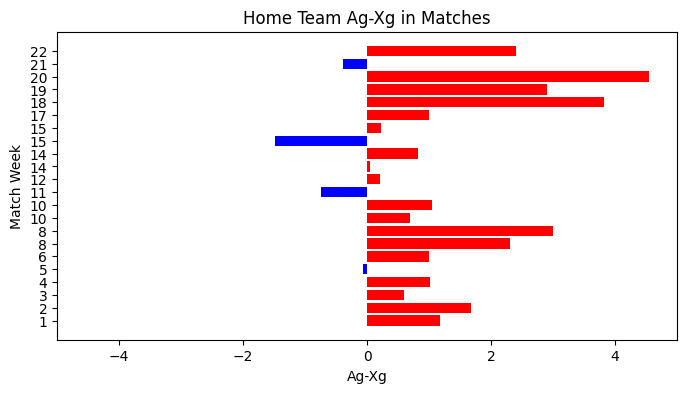

In [12]:
Ag_Xg(
    Chelsea_home['HT_Ag-Xg'],
    Chelsea_home['Game Week'],
    title='Home Team Ag-Xg in Matches'
)


#### From the plot above, we can see that there are negative values for Chelsea Ag-Xg when they played at home which indicates that they performed below expectations in those games.

### Away Team Underperformance Plot

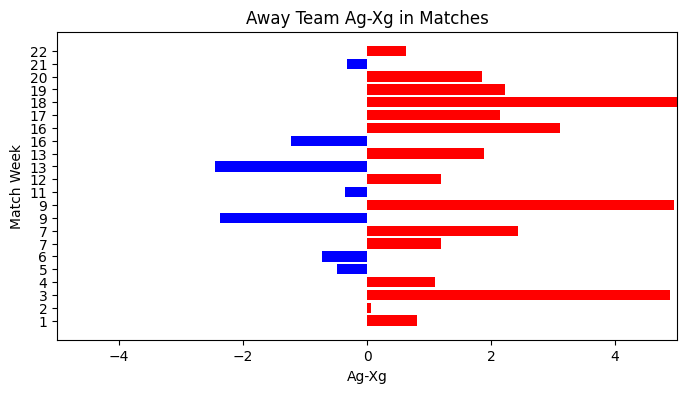

In [13]:
Ag_Xg(
    Chelsea_away['AT_Ag-Xg'],
    Chelsea_away['Game Week'],
    title='Away Team Ag-Xg in Matches'
)


#### From the plot above, we can see that there are negative values for Chelsea Ag-Xg when they played away which indicates that they performed below expectations in those games.

### Plot of Total Goal Count against Game Week

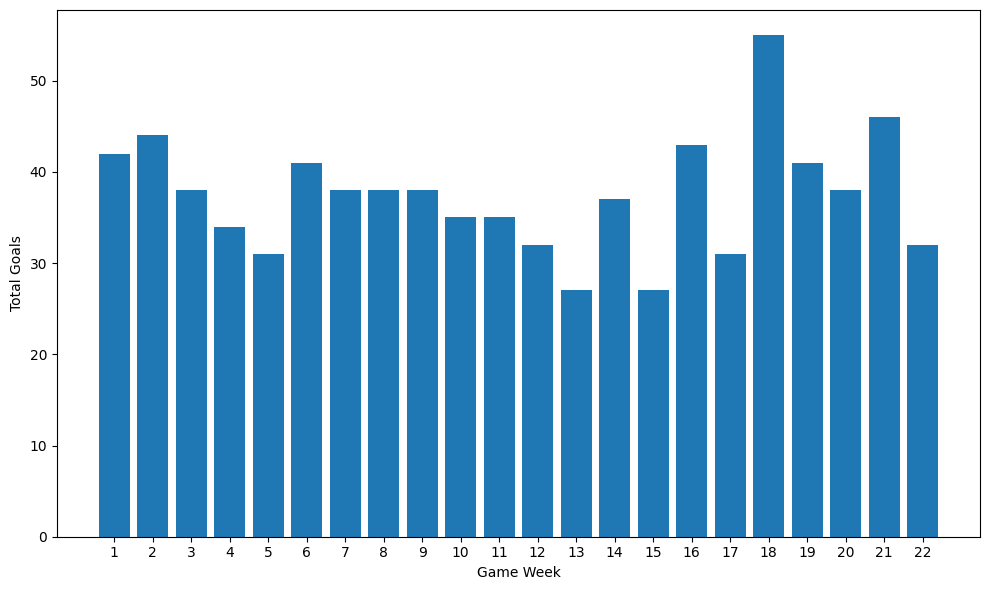

In [14]:
grouped_df = df.groupby('Game Week')['total_goal_count'].sum().reset_index()

plt.figure(figsize=(10, 6)) 

plt.bar(grouped_df["Game Week"], grouped_df["total_goal_count"])

plt.xlabel("Game Week")
plt.ylabel("Total Goals")
plt.xticks(range(1, max(grouped_df["Game Week"]) + 1))

plt.tight_layout()
plt.savefig("Total Goals by GW.png")
plt.show()

#### From the above plot, Game Week 18 had the highest goals recorded in a match week, followed by Game Week 21.

### Player Data

In [15]:
#read in player dataset
df_player = pd.read_csv("/Users/waleibitoye/Downloads/Project/england-fa-wsl-players-2021-2023-stats.csv")
df_player

full_name  age     season    position  \
0    Abbey-Leigh Stringer   28  2022/2023  Midfielder   
1           Abbie McManus   30  2022/2023    Defender   
2            Adriana Leon   31  2022/2023     Forward   
3      Agnes Beever-Jones   20  2022/2023     Forward   
4           Aileen Whelan   32  2022/2023     Forward   
..                    ...  ...        ...         ...   
547        Vilde Bøe Risa   28  2021/2022  Midfielder   
548      Vivianne Miedema   27  2021/2022     Forward   
549          Yui Hasegawa   26  2021/2022  Midfielder   
550           Zaneta Wyne   33  2021/2022  Midfielder   
551        Zecira Musovic   27  2021/2022  Goalkeeper   

                Current Club  minutes_played_overall  minutes_played_home  \
0      West Ham United Women                     802                  398   
1         Leicester City WFC                     152                   62   
2    Manchester United Women                      76                   66   
3              Everton Women                     757                  359   
4         Leicester City WFC                    1929                  990   
..                       ...                     ...                  ...   
547  Manchester United Women                     699                  366   
548            Arsenal Women                    1743                  834   
549    West Ham United Women                    1461                  810   
550    West Ham United Women                    1150                  423   
551            Chelsea Women                     786                  360   

     minutes_played_away  nationality  appearances_overall  appearances_home  \
0                    404      England                   11                 6   
1                     90      England                    2                 1   
2                     10       Canada                    5                 4   
3                    398      England                   16                 8   
4                    939      England                   22                11   
..                   ...          ...                  ...               ...   
547                  333       Norway                   17                 9   
548                  909  Netherlands                   22                11   
549                  651        Japan                   17                 9   
550                  727          USA                   18                 8   
551                  426       Sweden                   10                 4   

     appearances_away  goals_overall  goals_home  goals_away  assists_overall  \
0                   5              0           0           0                0   
1                   1              0           0           0                0   
2                   1              1           1           0                0   
3                   8              2           2           0                0   
4                  11              1           1           0                1   
..                ...            ...         ...         ...              ...   
547                 8              2           1           1                1   
548                11             14           8           6                8   
549                 8              2           0           2                2   
550                10              1           0           1                0   
551                 6              0           0           0                1   

     assists_home  assists_away  penalty_goals  penalty_misses  \
0               0             0              0               0   
1               0             0              0               0   
2               0             0              0               0   
3               0             0              0               0   
4               1             0              0               0   
..            ...           ...            ...             ...   
547       

In [16]:
#Print the list of columns in the dataframe
df_player.columns

Index(['full_name', 'age', 'season', 'position', 'Current Club',
       'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
       'nationality', 'appearances_overall', 'appearances_home',
       'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
       'assists_overall', 'assists_home', 'assists_away', 'penalty_goals',
       'penalty_misses', 'clean_sheets_overall', 'clean_sheets_home',
       'clean_sheets_away', 'conceded_overall', 'conceded_home',
       'conceded_away', 'yellow_cards_overall', 'red_cards_overall',
       'hattricks_total_overall', 'two_goals_in_a_game_total_overall',
       'saves_total_overall', 'PSxG', 'PSxG/SoT', 'xSaves_total_overall',
       'SoTA'],
      dtype='object')

In [17]:
df_player.shape

(552, 35)

In [18]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_name                          552 non-null    object 
 1   age                                552 non-null    int64  
 2   season                             552 non-null    object 
 3   position                           552 non-null    object 
 4   Current Club                       552 non-null    object 
 5   minutes_played_overall             552 non-null    int64  
 6   minutes_played_home                552 non-null    int64  
 7   minutes_played_away                552 non-null    int64  
 8   nationality                        552 non-null    object 
 9   appearances_overall                552 non-null    int64  
 10  appearances_home                   552 non-null    int64  
 11  appearances_away                   552 non-null    int64  

## Goalkeepers

### Filtering the dataset by Position of Goalkeeper

In [19]:
df_goalkeeper = df_player[df_player['position'] == 'Goalkeeper']
df_goalkeeper

full_name  age     season    position  \
10   Alexandra Elena MacIver   25  2022/2023  Goalkeeper   
19         Ann-Katrin Berger   33  2022/2023  Goalkeeper   
20         Anna Jessica Leat   22  2022/2023  Goalkeeper   
48          Courtney Brosnan   27  2022/2023  Goalkeeper   
56            Demi Lambourne   27  2022/2023  Goalkeeper   
..                       ...  ...        ...         ...   
521              Sian Rogers   25  2021/2022  Goalkeeper   
528          Sophie Baggaley   26  2021/2022  Goalkeeper   
530            Sophie Harris   29  2021/2022  Goalkeeper   
540     Tinja-Riikka Korpela   37  2021/2022  Goalkeeper   
551           Zecira Musovic   27  2021/2022  Goalkeeper   

                Current Club  minutes_played_overall  minutes_played_home  \
10     Manchester City Women                     270                    0   
19             Chelsea Women                    1350                  810   
20        Aston Villa Ladies                     630                  360   
48             Everton Women                    1260                  450   
56        Leicester City WFC                     180                   90   
..                       ...                     ...                  ...   
521       Aston Villa Ladies                     206                   90   
528  Manchester United Women                       0                    0   
530       Leicester City WFC                      90                    0   
540  Tottenham Hotspur Women                     990                  450   
551            Chelsea Women                     786                  360   

     minutes_played_away          nationality  appearances_overall  \
10                   270              England                    3   
19                   540              Germany                   15   
20                   270          New Zealand                    7   
48                   810  Republic of Ireland                   14   
56                    90              England                    2   
..                   ...                  ...                  ...   
521                  116              England                    3   
528                    0              England                    0   
530                   90              England                    1   
540                  540              Finland                   11   
551                  426               Sweden                   10   

     appearances_home  appearances_away  goals_overall  goals_home  \
10                  0                 3              0           0   
19                  9                 6              0           0   
20                  4                 3              0           0   
48                  5                 9              0           0   
56                  1                 1              0           0   
..                ...               ...            ...         ...   
521                 1                 2              0           0   
528                 0                 0              0           0   
530                 0                 1              0           0   
540                 5                 6              0           0   
551                 4                 6              0           0   

     goals_away  assists_overall  assists_home  assists_away  penalty_goals  \
10            0                0             0             0              0   
19            0                0             0             0              0   
20            0                0             0             0              0   
48            0                0             0             0              0   
56            0                0             0             0              0   
..          ...              ...           ...           ...            ...   
521           0                0             0             0              0   
528           0                0             0             

#### For Further analysis, We'd calculate the saves_overall by subtracting saves_total_overall from xSaves_total_overall

In [20]:
#Calculate saves_overall for each goalkeeper
def saves_overall(row):
    return row['saves_total_overall'] - row['xSaves_total_overall']

df_goalkeeper['saves_overall'] = df_goalkeeper.apply(saves_overall, axis=1)
df_goalkeeper

full_name  age     season    position  \
10   Alexandra Elena MacIver   25  2022/2023  Goalkeeper   
19         Ann-Katrin Berger   33  2022/2023  Goalkeeper   
20         Anna Jessica Leat   22  2022/2023  Goalkeeper   
48          Courtney Brosnan   27  2022/2023  Goalkeeper   
56            Demi Lambourne   27  2022/2023  Goalkeeper   
..                       ...  ...        ...         ...   
521              Sian Rogers   25  2021/2022  Goalkeeper   
528          Sophie Baggaley   26  2021/2022  Goalkeeper   
530            Sophie Harris   29  2021/2022  Goalkeeper   
540     Tinja-Riikka Korpela   37  2021/2022  Goalkeeper   
551           Zecira Musovic   27  2021/2022  Goalkeeper   

                Current Club  minutes_played_overall  minutes_played_home  \
10     Manchester City Women                     270                    0   
19             Chelsea Women                    1350                  810   
20        Aston Villa Ladies                     630                  360   
48             Everton Women                    1260                  450   
56        Leicester City WFC                     180                   90   
..                       ...                     ...                  ...   
521       Aston Villa Ladies                     206                   90   
528  Manchester United Women                       0                    0   
530       Leicester City WFC                      90                    0   
540  Tottenham Hotspur Women                     990                  450   
551            Chelsea Women                     786                  360   

     minutes_played_away          nationality  appearances_overall  \
10                   270              England                    3   
19                   540              Germany                   15   
20                   270          New Zealand                    7   
48                   810  Republic of Ireland                   14   
56                    90              England                    2   
..                   ...                  ...                  ...   
521                  116              England                    3   
528                    0              England                    0   
530                   90              England                    1   
540                  540              Finland                   11   
551                  426               Sweden                   10   

     appearances_home  appearances_away  goals_overall  goals_home  \
10                  0                 3              0           0   
19                  9                 6              0           0   
20                  4                 3              0           0   
48                  5                 9              0           0   
56                  1                 1              0           0   
..                ...               ...            ...         ...   
521                 1                 2              0           0   
528                 0                 0              0           0   
530                 0                 1              0           0   
540                 5                 6              0           0   
551                 4                 6              0           0   

     goals_away  assists_overall  assists_home  assists_away  penalty_goals  \
10            0                0             0             0              0   
19            0                0             0             0              0   
20            0                0             0             0              0   
48            0                0             0             0              0   
56            0                0             0             0              0   
..          ...              ...           ...           ...            ...   
521           0                0             0             0              0   
528           0                0             0             

In [21]:
df_goalkeeper.sort_values(by = ['SoTA'])


full_name  age     season    position  \
213         Naomi Williams   18  2022/2023  Goalkeeper   
143          Katie Startup   24  2022/2023  Goalkeeper   
528        Sophie Baggaley   26  2021/2022  Goalkeeper   
513  Safia Middleton-Patel   19  2021/2022  Goalkeeper   
498            Poppy Soper   21  2021/2022  Goalkeeper   
..                     ...  ...        ...         ...   
460       Mackenzie Arnold   29  2021/2022  Goalkeeper   
204            Megan Walsh   28  2022/2023  Goalkeeper   
100          Grace Moloney   30  2022/2023  Goalkeeper   
186       Mackenzie Arnold   29  2022/2023  Goalkeeper   
478            Megan Walsh   28  2021/2022  Goalkeeper   

                     Current Club  minutes_played_overall  \
213                 Arsenal Women                       0   
143  Brighton & Hove Albion Women                       0   
528       Manchester United Women                       0   
513            Leicester City WFC                       0   
498                 Chelsea Women                       0   
..                            ...                     ...   
460         West Ham United Women                    1620   
204  Brighton & Hove Albion Women                    1350   
100                 Reading Women                    1100   
186         West Ham United Women                    1790   
478  Brighton & Hove Albion Women                    1800   

     minutes_played_home  minutes_played_away          nationality  \
213                    0                    0              England   
143                    0                    0              England   
528                    0                    0              England   
513                    0                    0                Wales   
498                    0                    0                Wales   
..                   ...                  ...                  ...   
460                  900                  720            Australia   
204                  720                  630              England   
100                  540                  560  Republic of Ireland   
186                  890                  900            Australia   
478                  990                  810              England   

     appearances_overall  appearances_home  appearances_away  goals_overall  \
213                    0                 0                 0              0   
143                    0                 0                 0              0   
528                    0                 0                 0              0   
513                    0                 0                 0              0   
498                    0                 0                 0              0   
..                   ...               ...               ...            ...   
460                   18                10                 8              0   
204                   15                 8                 7              0   
100                   13                 6                 7              0   
186                   20                10                10              0   
478                   20                11                 9              0   

     goals_home  goals_away  assists_overall  assists_home  assists_away  \
213           0           0                0             0             0   
143           0           0                0             0             0   
528           0           0                0             0             0   
513           0           0                0             0             0   
498           0           0                0             0             0   
..          ...         ...              ...           ...           ...   
460           0           0                0             0             0   
204           0           0                0             0             0   
100           0           0                0             0             0   
186           0           0          

In [22]:
max_saves = df_goalkeeper['saves_total_overall'].max()
max_saves_rows = df_goalkeeper[df_goalkeeper['saves_total_overall'] == max_saves]
max_saves_rows

full_name  age     season    position        Current Club  \
117  Janina Leitzig   24  2022/2023  Goalkeeper  Leicester City WFC   

     minutes_played_overall  minutes_played_home  minutes_played_away  \
117                    1170                  540                  630   

    nationality  appearances_overall  appearances_home  appearances_away  \
117     Germany                   13                 6                 7   

     goals_overall  goals_home  goals_away  assists_overall  assists_home  \
117              0           0           0                0             0   

     assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
117             0              0               0                     5   

     clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
117                  3                  2                22              5   

     conceded_away  yellow_cards_overall  red_cards_overall  \
117             17                     0                  0   

     hattricks_total_overall  two_goals_in_a_game_total_overall  \
117                        0                                  0   

     saves_total_overall  PSxG  PSxG/SoT  xSaves_total_overall  SoTA  \
117                   88  22.0      0.25                  0.75    88   

     saves_overall  
117          87.25

### Plot Showing Overall Saves by Football Club 

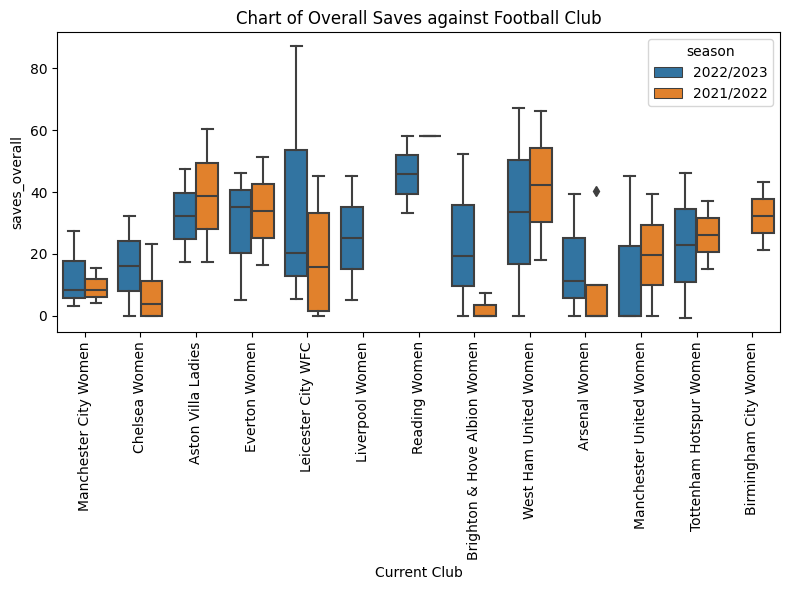

In [23]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_goalkeeper, x="Current Club", y="saves_overall", hue="season")
plt.title('Chart of Overall Saves against Football Club')
plt.xticks(rotation=90)
plt.tight_layout()


### Filtering the dataset by Position of Goalkeeper and Season of 2022/2023

In [24]:
df_gk_22_23 = df_player[(df_player['position'] == 'Goalkeeper') & (df_player['season'] == '2022/2023')]
df_gk_22_23

full_name  age     season    position  \
10   Alexandra Elena MacIver   25  2022/2023  Goalkeeper   
19         Ann-Katrin Berger   33  2022/2023  Goalkeeper   
20         Anna Jessica Leat   22  2022/2023  Goalkeeper   
48          Courtney Brosnan   27  2022/2023  Goalkeeper   
56            Demi Lambourne   27  2022/2023  Goalkeeper   
62            Eartha Cumings   24  2022/2023  Goalkeeper   
69             Ellie Roebuck   24  2022/2023  Goalkeeper   
71               Emily Orman   20  2022/2023  Goalkeeper   
72              Emily Ramsey   22  2022/2023  Goalkeeper   
85           Faye Mary Kirby   23  2022/2023  Goalkeeper   
100            Grace Moloney   30  2022/2023  Goalkeeper   
106           Hannah Hampton   22  2022/2023  Goalkeeper   
115         Jacqueline Burns   26  2022/2023  Goalkeeper   
117           Janina Leitzig   24  2022/2023  Goalkeeper   
143            Katie Startup   24  2022/2023  Goalkeeper   
155           Khiara Keating   19  2022/2023  Goalkeeper   
157           Kirstie Levell   26  2022/2023  Goalkeeper   
185           Lydia Williams   35  2022/2023  Goalkeeper   
186         Mackenzie Arnold   29  2022/2023  Goalkeeper   
191       Manuela Zinsberger   27  2022/2023  Goalkeeper   
196               Mary Earps   30  2022/2023  Goalkeeper   
204              Megan Walsh   28  2022/2023  Goalkeeper   
213           Naomi Williams   18  2022/2023  Goalkeeper   
228             Rachael Laws   32  2022/2023  Goalkeeper   
237    Rebecca Leigh Spencer   32  2022/2023  Goalkeeper   
250         Sabrina D’Angelo   30  2022/2023  Goalkeeper   
251    Safia Middleton-Patel   19  2022/2023  Goalkeeper   
263          Sophie Baggaley   26  2022/2023  Goalkeeper   
264          Sophie Hillyerd   20  2022/2023  Goalkeeper   
274     Tinja-Riikka Korpela   37  2022/2023  Goalkeeper   
284           Zecira Musovic   27  2022/2023  Goalkeeper   

                     Current Club  minutes_played_overall  \
10          Manchester City Women                     270   
19                  Chelsea Women                    1350   
20             Aston Villa Ladies                     630   
48                  Everton Women                    1260   
56             Leicester City WFC                     180   
62                  Everton Women                     180   
69          Manchester City Women                    1482   
71                  Chelsea Women                       0   
72                  Everton Women                     720   
85                Liverpool Women                     270   
100                 Reading Women                    1100   
106            Aston Villa Ladies                    1350   
115                 Reading Women                     875   
117            Leicester City WFC                    1170   
143  Brighton & Hove Albion Women                       0   
155         Manchester City Women                     226   
157            Leicester City WFC                     630   
185  Brighton & Hove Albion Women                     630   
186         West Ham United Women                    1790   
191                 Arsenal Women                    1620   
196       Manchester United Women                    1980   
204  Brighton & Hove Albion Women                    1350   
213                 Arsenal Women                       0   
228               Liverpool Women                    1530   
237       Tottenham Hotspur Women                     990   
250                 Arsenal Women                     360   
251       Manchester United Women                       0   
263       Manchester United Women                       0   
264         West Ham United Women                     190   
274       Tottenham Hotspur Women                     990   
284                 Chelsea Women                     630   

     minutes_played_home  minutes_played_away          nationality  \
10                     0                  270              England   
19   

Post-Shot Expected Goals (PSxG) is a more accurate way of assessing a goalkeeper's ability to stop shots. It combines shot quality with what actually happened to the shot, allowing us to assess a goalkeeper's shot-stopping ability more effectively than other statistics such as clean sheets or saves per 90 minutes which could be a direct result of a solid defense in front of them.
(https://www.footballcritic.com/features/post-shot-expected-goals-what-is-it-and-why-is-it-different-from-expected-goalsc/773)

In [25]:
#Calculate Post Shot Expected Goals - Goal Against for each goalkeeper per 90 minutes
def PSxG_GA(row):
    return row['PSxG'] - row['conceded_overall']

df_gk_22_23['PSxG - GA'] = df_gk_22_23.apply(PSxG_GA, axis=1)
df_gk_22_23

full_name  age     season    position  \
10   Alexandra Elena MacIver   25  2022/2023  Goalkeeper   
19         Ann-Katrin Berger   33  2022/2023  Goalkeeper   
20         Anna Jessica Leat   22  2022/2023  Goalkeeper   
48          Courtney Brosnan   27  2022/2023  Goalkeeper   
56            Demi Lambourne   27  2022/2023  Goalkeeper   
62            Eartha Cumings   24  2022/2023  Goalkeeper   
69             Ellie Roebuck   24  2022/2023  Goalkeeper   
71               Emily Orman   20  2022/2023  Goalkeeper   
72              Emily Ramsey   22  2022/2023  Goalkeeper   
85           Faye Mary Kirby   23  2022/2023  Goalkeeper   
100            Grace Moloney   30  2022/2023  Goalkeeper   
106           Hannah Hampton   22  2022/2023  Goalkeeper   
115         Jacqueline Burns   26  2022/2023  Goalkeeper   
117           Janina Leitzig   24  2022/2023  Goalkeeper   
143            Katie Startup   24  2022/2023  Goalkeeper   
155           Khiara Keating   19  2022/2023  Goalkeeper   
157           Kirstie Levell   26  2022/2023  Goalkeeper   
185           Lydia Williams   35  2022/2023  Goalkeeper   
186         Mackenzie Arnold   29  2022/2023  Goalkeeper   
191       Manuela Zinsberger   27  2022/2023  Goalkeeper   
196               Mary Earps   30  2022/2023  Goalkeeper   
204              Megan Walsh   28  2022/2023  Goalkeeper   
213           Naomi Williams   18  2022/2023  Goalkeeper   
228             Rachael Laws   32  2022/2023  Goalkeeper   
237    Rebecca Leigh Spencer   32  2022/2023  Goalkeeper   
250         Sabrina D’Angelo   30  2022/2023  Goalkeeper   
251    Safia Middleton-Patel   19  2022/2023  Goalkeeper   
263          Sophie Baggaley   26  2022/2023  Goalkeeper   
264          Sophie Hillyerd   20  2022/2023  Goalkeeper   
274     Tinja-Riikka Korpela   37  2022/2023  Goalkeeper   
284           Zecira Musovic   27  2022/2023  Goalkeeper   

                     Current Club  minutes_played_overall  \
10          Manchester City Women                     270   
19                  Chelsea Women                    1350   
20             Aston Villa Ladies                     630   
48                  Everton Women                    1260   
56             Leicester City WFC                     180   
62                  Everton Women                     180   
69          Manchester City Women                    1482   
71                  Chelsea Women                       0   
72                  Everton Women                     720   
85                Liverpool Women                     270   
100                 Reading Women                    1100   
106            Aston Villa Ladies                    1350   
115                 Reading Women                     875   
117            Leicester City WFC                    1170   
143  Brighton & Hove Albion Women                       0   
155         Manchester City Women                     226   
157            Leicester City WFC                     630   
185  Brighton & Hove Albion Women                     630   
186         West Ham United Women                    1790   
191                 Arsenal Women                    1620   
196       Manchester United Women                    1980   
204  Brighton & Hove Albion Women                    1350   
213                 Arsenal Women                       0   
228               Liverpool Women                    1530   
237       Tottenham Hotspur Women                     990   
250                 Arsenal Women                     360   
251       Manchester United Women                       0   
263       Manchester United Women                       0   
264         West Ham United Women                     190   
274       Tottenham Hotspur Women                     990   
284                 Chelsea Women                     630   

     minutes_played_home  minutes_played_away          nationality  \
10                     0                  270              England   
19   

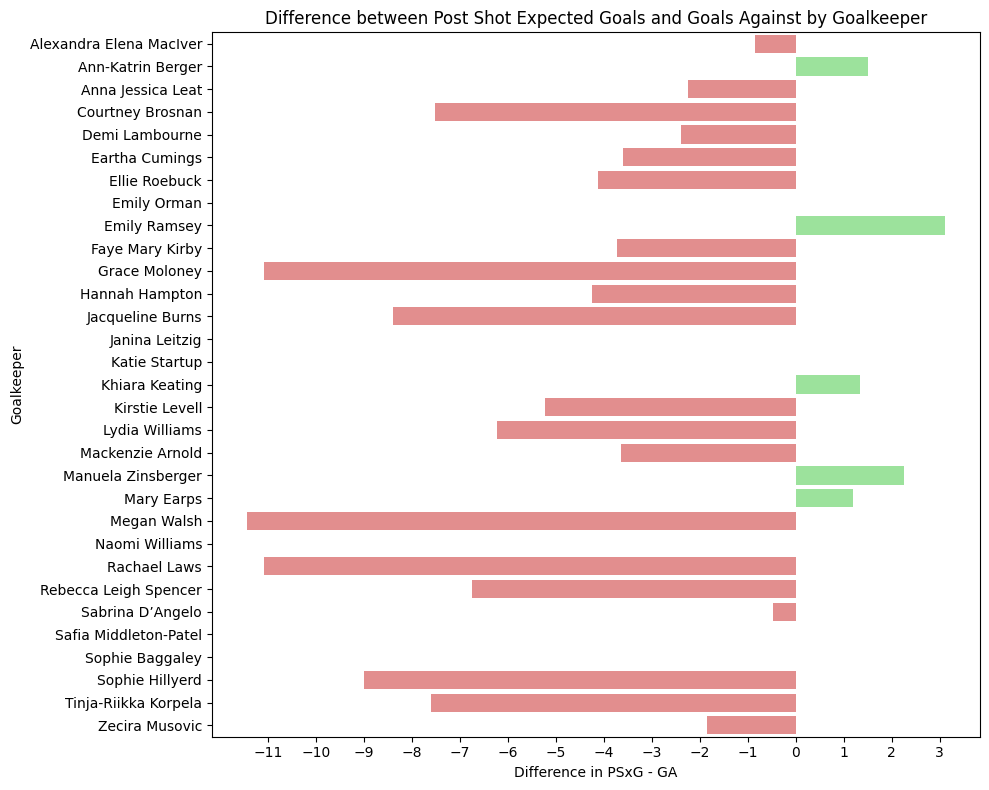

In [26]:
plt.figure(figsize=(10, 8))

# Define colors based on positive or negative difference
colors = ['lightcoral' if x < 0 else 'lightgreen' for x in df_gk_22_23['PSxG - GA']]

# Create the bar plot
ax = sns.barplot(data=df_gk_22_23, x="PSxG - GA", y="full_name", palette=colors)

# Set labels and title
ax.set_xlabel('Difference in PSxG - GA')
ax.set_ylabel('Goalkeeper')
ax.set_title('Difference between Post Shot Expected Goals and Goals Against by Goalkeeper')

# Customize x-axis ticks
tick_min = int(df_gk_22_23['PSxG - GA'].min())
tick_max = int(df_gk_22_23['PSxG - GA'].max())
ax.set_xticks(np.arange(tick_min, tick_max+1, 1))

plt.tight_layout()

plt.show()

PSxG puts the goalkeeper on the spot; it gives proper insights into a goalkeeper's ability in goal than clean sheets, or saves P90, or save percentages, because those could be as a result of a solid defence in front of them. with PSxG, however, it's on the keepers to save the shots. 

In the plot, a positive value for a goalkeeper represents a positive difference between PSxG (Post-Shot Expected Goals) and GA (Goals Against). This indicates that the goalkeeper has conceded fewer goals (GA) than what was expected based on the quality of the shots faced (PSxG). In other words, the goalkeeper has performed better than the expected in preventing goals.

In direct contrast, a negative value for a goalkeeper indicates a negative difference between PSxG and GA. This means that the goalkeeper has conceded more goals (GA) than what was expected based on the quality of the shots faced (PSxG). In this case, the goalkeeper has underperformed or struggled to prevent goals compared to what would typically be expected.

Emily Ramsey of Everton Women had the best PSxG-GA value with +3.1, followed by Manuela Zinsberger of Arsenal Women with +2.3 and Ann-Katrin Berger of Chelsea Women with +1.5.

### Scrape Match data for Emily Ramsey

In [27]:
def scrape_gk_data(url):
    
    #Path for ChromeDriver
    driver_path = '/Users/waleibitoye/Downloads/chromedriver-mac-x64/chromedriver'  

    #Create ChromeOptions object to use Chrome Browser
    chrome_options = webdriver.ChromeOptions()
    #To run the command in headless mode i.e. without an interface
    chrome_options.add_argument("--headless")

    chrome_options.add_argument(f'--chromedriver={driver_path}')
    
    #Initialize ChromeDriver Instance
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    #Wait time set to 5secs to allow elements on the webpage to fully load
    driver.implicitly_wait(5)
    
    #get page source of the webpage
    page_source = driver.page_source

    #use pandas to read tables on the webpage
    df_gk = pd.read_html(page_source, header=1)[0]

    #close the browser session
    driver.quit()

    return df_gk

#webpage to scrape data from
url = 'https://fbref.com/en/players/41f1df2f/matchlogs/2022-2023/Emily-Ramsey-Match-Logs'

#store data in a dataframe 
gk_data = scrape_gk_data(url)
gk_data


Date  Day Comp         Round Venue Result    Squad         Opponent  \
0   2022-09-18  Sun  WSL   Matchweek 2  Away  L 0–1  Everton         West Ham   
1   2022-09-25  Sun  WSL   Matchweek 3  Away  W 3–0  Everton        Liverpool   
2   2022-09-29  Thu  WSL   Matchweek 1  Home  W 1–0  Everton   Leicester City   
3   2022-10-16  Sun  WSL   Matchweek 4  Home  L 1–3  Everton          Chelsea   
4   2022-10-22  Sat  WSL   Matchweek 5  Away  W 1–0  Everton      Aston Villa   
5          NaN  NaN  NaN           NaN   NaN    NaN      NaN              NaN   
6   2022-11-19  Sat  WSL   Matchweek 8  Home  L 1–2  Everton  Manchester City   
7   2022-12-03  Sat  WSL   Matchweek 9  Away  L 0–1  Everton          Arsenal   
8   2022-12-14  Wed  WSL   Matchweek 7  Away  W 3–0  Everton        Tottenham   
9   2023-01-15  Sun  WSL  Matchweek 11  Home  W 3–2  Everton          Reading   
10  2023-01-22  Sun  WSL  Matchweek 12  Home  W 3–0  Everton         West Ham   
11         NaN  NaN  NaN           NaN   NaN    NaN      NaN              NaN   
12  2023-04-19  Wed  WSL  Matchweek 10  Away  L 2–3  Everton         Brighton   
13  2023-04-23  Sun  WSL  Matchweek 18  Away  W 3–2  Everton          Reading   
14  2023-05-07  Sun  WSL  Matchweek 20  Away  L 0–7  Everton          Chelsea   
15  2023-05-17  Wed  WSL  Matchweek 19  Home  L 1–4  Everton          Arsenal   
16  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Everton         Brighton   
17  2023-05-27  Sat  WSL  Matchweek 22  Away  L 2–3  Everton  Manchester City   
18         NaN  NaN  NaN           NaN   NaN  5-0-3      NaN              NaN   

   Start                                  Pos  \
0      N  On matchday squad, but did not play   
1      N  On matchday squad, but did not play   
2      Y                                   GK   
3      N  On matchday squad, but did not play   
4      N  On matchday squad, but did not play   
5    NaN                                  NaN   
6      Y                                   GK   
7      Y                                   GK   
8      Y                                   GK   
9      Y                                   GK   
10     Y                                   GK   
11   NaN                                  NaN   
12     N  On matchday squad, but did not play   
13     N  On matchday squad, but did not play   
14     N  On matchday squad, but did not play   
15     Y                                   GK   
16     Y                                   GK   
17     N  On matchday squad, but did not play   
18   8/8                                  NaN   

                                    Min                                 SoTA  \
0   On matchday squad, but did not play  On matchday squad, but did not play   
1   On matchday squad, but did not play  On matchday squad, but did not play   
2                                    90                                    3   
3   On matchday squad, but did not play  On matchday squad, but did not play   
4   On matchday squad, but did not play  On matchday squad, but did not play   
5                                   NaN                                  NaN   
6                                    90                                    7   
7                                    90                                   13   
8                                    90                                    4   
9                                    90                                    5   
10                                   90                                    4   
11                                  NaN                                  NaN   
12  On matchday squad, but did not play  On matchday squad, but did not play   
13  On matchday squad, but did not play  On matchday squad, but did not play   
14  On matchday squad, but did not play  On matchday squad, but did not play   
15                                   90                                   12   
16                                   90         

### Dropping Irrelevant Columns

In [28]:
cols = ['PKatt','PKA', 'PKsv', 'PKm', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%', 'AvgLen', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist', 'Match Report']

drop_cols = gk_data.drop(columns=cols)
drop_cols

Date  Day Comp         Round Venue Result    Squad         Opponent  \
0   2022-09-18  Sun  WSL   Matchweek 2  Away  L 0–1  Everton         West Ham   
1   2022-09-25  Sun  WSL   Matchweek 3  Away  W 3–0  Everton        Liverpool   
2   2022-09-29  Thu  WSL   Matchweek 1  Home  W 1–0  Everton   Leicester City   
3   2022-10-16  Sun  WSL   Matchweek 4  Home  L 1–3  Everton          Chelsea   
4   2022-10-22  Sat  WSL   Matchweek 5  Away  W 1–0  Everton      Aston Villa   
5          NaN  NaN  NaN           NaN   NaN    NaN      NaN              NaN   
6   2022-11-19  Sat  WSL   Matchweek 8  Home  L 1–2  Everton  Manchester City   
7   2022-12-03  Sat  WSL   Matchweek 9  Away  L 0–1  Everton          Arsenal   
8   2022-12-14  Wed  WSL   Matchweek 7  Away  W 3–0  Everton        Tottenham   
9   2023-01-15  Sun  WSL  Matchweek 11  Home  W 3–2  Everton          Reading   
10  2023-01-22  Sun  WSL  Matchweek 12  Home  W 3–0  Everton         West Ham   
11         NaN  NaN  NaN           NaN   NaN    NaN      NaN              NaN   
12  2023-04-19  Wed  WSL  Matchweek 10  Away  L 2–3  Everton         Brighton   
13  2023-04-23  Sun  WSL  Matchweek 18  Away  W 3–2  Everton          Reading   
14  2023-05-07  Sun  WSL  Matchweek 20  Away  L 0–7  Everton          Chelsea   
15  2023-05-17  Wed  WSL  Matchweek 19  Home  L 1–4  Everton          Arsenal   
16  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Everton         Brighton   
17  2023-05-27  Sat  WSL  Matchweek 22  Away  L 2–3  Everton  Manchester City   
18         NaN  NaN  NaN           NaN   NaN  5-0-3      NaN              NaN   

   Start                                  Pos  \
0      N  On matchday squad, but did not play   
1      N  On matchday squad, but did not play   
2      Y                                   GK   
3      N  On matchday squad, but did not play   
4      N  On matchday squad, but did not play   
5    NaN                                  NaN   
6      Y                                   GK   
7      Y                                   GK   
8      Y                                   GK   
9      Y                                   GK   
10     Y                                   GK   
11   NaN                                  NaN   
12     N  On matchday squad, but did not play   
13     N  On matchday squad, but did not play   
14     N  On matchday squad, but did not play   
15     Y                                   GK   
16     Y                                   GK   
17     N  On matchday squad, but did not play   
18   8/8                                  NaN   

                                    Min                                 SoTA  \
0   On matchday squad, but did not play  On matchday squad, but did not play   
1   On matchday squad, but did not play  On matchday squad, but did not play   
2                                    90                                    3   
3   On matchday squad, but did not play  On matchday squad, but did not play   
4   On matchday squad, but did not play  On matchday squad, but did not play   
5                                   NaN                                  NaN   
6                                    90                                    7   
7                                    90                                   13   
8                                    90                                    4   
9                                    90                                    5   
10                                   90                                    4   
11                                  NaN                                  NaN   
12  On matchday squad, but did not play  On matchday squad, but did not play   
13  On matchday squad, but did not play  On matchday squad, but did not play   
14  On matchday squad, but did not play  On matchday squad, but did not play   
15                                   90                                   12   
16                                   90         

In [29]:
#Dropping Irrelevant rows
rows_to_drop = [0, 1, 3, 4, 5, 11, 12, 13, 14, 17, 18]
drop_cols.drop(index=rows_to_drop, inplace=True)

In [30]:
drop_cols

Date  Day Comp         Round Venue Result    Squad         Opponent  \
2   2022-09-29  Thu  WSL   Matchweek 1  Home  W 1–0  Everton   Leicester City   
6   2022-11-19  Sat  WSL   Matchweek 8  Home  L 1–2  Everton  Manchester City   
7   2022-12-03  Sat  WSL   Matchweek 9  Away  L 0–1  Everton          Arsenal   
8   2022-12-14  Wed  WSL   Matchweek 7  Away  W 3–0  Everton        Tottenham   
9   2023-01-15  Sun  WSL  Matchweek 11  Home  W 3–2  Everton          Reading   
10  2023-01-22  Sun  WSL  Matchweek 12  Home  W 3–0  Everton         West Ham   
15  2023-05-17  Wed  WSL  Matchweek 19  Home  L 1–4  Everton          Arsenal   
16  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Everton         Brighton   

   Start Pos Min SoTA GA Saves  Save% CS PSxG Att (GK)  
2      Y  GK  90    3  0     3  100.0  1  0.3       30  
6      Y  GK  90    7  2     5   71.4  0  2.8       37  
7      Y  GK  90   13  1    12   92.3  0  3.0       32  
8      Y  GK  90    4  0     4  100.0  1  0.3       24  
9      Y  GK  90    5  2     3   60.0  0  1.2       28  
10     Y  GK  90    4  0     4  100.0  1  0.6       24  
15     Y  GK  90   12  4     8   66.7  0  3.9       39  
16     Y  GK  90    9  1     8   88.9  0  1.0       37

In [31]:
#Fill NaN values in the Save% Columns with corresponding Percentage of Save Value
#drop_cols['Save%'].fillna(0.0, inplace=True)

In [32]:
drop_cols['Saves'] = pd.to_numeric(drop_cols['Saves'])
drop_cols['PSxG'] = pd.to_numeric(drop_cols['PSxG'])

In [33]:
#Calculate Expected Saves
drop_cols['xSaves'] = 1 - drop_cols['PSxG']
drop_cols

Date  Day Comp         Round Venue Result    Squad         Opponent  \
2   2022-09-29  Thu  WSL   Matchweek 1  Home  W 1–0  Everton   Leicester City   
6   2022-11-19  Sat  WSL   Matchweek 8  Home  L 1–2  Everton  Manchester City   
7   2022-12-03  Sat  WSL   Matchweek 9  Away  L 0–1  Everton          Arsenal   
8   2022-12-14  Wed  WSL   Matchweek 7  Away  W 3–0  Everton        Tottenham   
9   2023-01-15  Sun  WSL  Matchweek 11  Home  W 3–2  Everton          Reading   
10  2023-01-22  Sun  WSL  Matchweek 12  Home  W 3–0  Everton         West Ham   
15  2023-05-17  Wed  WSL  Matchweek 19  Home  L 1–4  Everton          Arsenal   
16  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Everton         Brighton   

   Start Pos Min SoTA GA  Saves  Save% CS  PSxG Att (GK)  xSaves  
2      Y  GK  90    3  0      3  100.0  1   0.3       30     0.7  
6      Y  GK  90    7  2      5   71.4  0   2.8       37    -1.8  
7      Y  GK  90   13  1     12   92.3  0   3.0       32    -2.0  
8      Y  GK  90    4  0      4  100.0  1   0.3       24     0.7  
9      Y  GK  90    5  2      3   60.0  0   1.2       28    -0.2  
10     Y  GK  90    4  0      4  100.0  1   0.6       24     0.4  
15     Y  GK  90   12  4      8   66.7  0   3.9       39    -2.9  
16     Y  GK  90    9  1      8   88.9  0   1.0       37     0.0

In [34]:
#Calculate Saves Difference
drop_cols['Saves - xSaves'] = drop_cols['Saves'] - drop_cols['xSaves']
drop_cols

Date  Day Comp         Round Venue Result    Squad         Opponent  \
2   2022-09-29  Thu  WSL   Matchweek 1  Home  W 1–0  Everton   Leicester City   
6   2022-11-19  Sat  WSL   Matchweek 8  Home  L 1–2  Everton  Manchester City   
7   2022-12-03  Sat  WSL   Matchweek 9  Away  L 0–1  Everton          Arsenal   
8   2022-12-14  Wed  WSL   Matchweek 7  Away  W 3–0  Everton        Tottenham   
9   2023-01-15  Sun  WSL  Matchweek 11  Home  W 3–2  Everton          Reading   
10  2023-01-22  Sun  WSL  Matchweek 12  Home  W 3–0  Everton         West Ham   
15  2023-05-17  Wed  WSL  Matchweek 19  Home  L 1–4  Everton          Arsenal   
16  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Everton         Brighton   

   Start Pos Min SoTA GA  Saves  Save% CS  PSxG Att (GK)  xSaves  \
2      Y  GK  90    3  0      3  100.0  1   0.3       30     0.7   
6      Y  GK  90    7  2      5   71.4  0   2.8       37    -1.8   
7      Y  GK  90   13  1     12   92.3  0   3.0       32    -2.0   
8      Y  GK  90    4  0      4  100.0  1   0.3       24     0.7   
9      Y  GK  90    5  2      3   60.0  0   1.2       28    -0.2   
10     Y  GK  90    4  0      4  100.0  1   0.6       24     0.4   
15     Y  GK  90   12  4      8   66.7  0   3.9       39    -2.9   
16     Y  GK  90    9  1      8   88.9  0   1.0       37     0.0   

    Saves - xSaves  
2              2.3  
6              6.8  
7             14.0  
8              3.3  
9              3.2  
10             3.6  
15            10.9  
16             8.0

In [35]:
#Remove text from Round Column
drop_cols['Round'] = drop_cols['Round'].str.extract('(\d+)')
drop_cols

Date  Day Comp Round Venue Result    Squad         Opponent Start  \
2   2022-09-29  Thu  WSL     1  Home  W 1–0  Everton   Leicester City     Y   
6   2022-11-19  Sat  WSL     8  Home  L 1–2  Everton  Manchester City     Y   
7   2022-12-03  Sat  WSL     9  Away  L 0–1  Everton          Arsenal     Y   
8   2022-12-14  Wed  WSL     7  Away  W 3–0  Everton        Tottenham     Y   
9   2023-01-15  Sun  WSL    11  Home  W 3–2  Everton          Reading     Y   
10  2023-01-22  Sun  WSL    12  Home  W 3–0  Everton         West Ham     Y   
15  2023-05-17  Wed  WSL    19  Home  L 1–4  Everton          Arsenal     Y   
16  2023-05-21  Sun  WSL    21  Home  W 2–1  Everton         Brighton     Y   

   Pos Min SoTA GA  Saves  Save% CS  PSxG Att (GK)  xSaves  Saves - xSaves  
2   GK  90    3  0      3  100.0  1   0.3       30     0.7             2.3  
6   GK  90    7  2      5   71.4  0   2.8       37    -1.8             6.8  
7   GK  90   13  1     12   92.3  0   3.0       32    -2.0            14.0  
8   GK  90    4  0      4  100.0  1   0.3       24     0.7             3.3  
9   GK  90    5  2      3   60.0  0   1.2       28    -0.2             3.2  
10  GK  90    4  0      4  100.0  1   0.6       24     0.4             3.6  
15  GK  90   12  4      8   66.7  0   3.9       39    -2.9            10.9  
16  GK  90    9  1      8   88.9  0   1.0       37     0.0             8.0

In [36]:
print(drop_cols.dtypes)

Date               object
Day                object
Comp               object
Round              object
Venue              object
Result             object
Squad              object
Opponent           object
Start              object
Pos                object
Min                object
SoTA               object
GA                 object
Saves               int64
Save%              object
CS                 object
PSxG              float64
Att (GK)           object
xSaves            float64
Saves - xSaves    float64
dtype: object


In [37]:
#Convert Round column to an Integer
drop_cols['Round'] = pd.to_numeric(drop_cols['Round'])

In [38]:
# Sort the rows by 'Round' column 
drop_cols = drop_cols.sort_values(by = ['Round'])
drop_cols

Date  Day Comp  Round Venue Result    Squad         Opponent Start  \
2   2022-09-29  Thu  WSL      1  Home  W 1–0  Everton   Leicester City     Y   
8   2022-12-14  Wed  WSL      7  Away  W 3–0  Everton        Tottenham     Y   
6   2022-11-19  Sat  WSL      8  Home  L 1–2  Everton  Manchester City     Y   
7   2022-12-03  Sat  WSL      9  Away  L 0–1  Everton          Arsenal     Y   
9   2023-01-15  Sun  WSL     11  Home  W 3–2  Everton          Reading     Y   
10  2023-01-22  Sun  WSL     12  Home  W 3–0  Everton         West Ham     Y   
15  2023-05-17  Wed  WSL     19  Home  L 1–4  Everton          Arsenal     Y   
16  2023-05-21  Sun  WSL     21  Home  W 2–1  Everton         Brighton     Y   

   Pos Min SoTA GA  Saves  Save% CS  PSxG Att (GK)  xSaves  Saves - xSaves  
2   GK  90    3  0      3  100.0  1   0.3       30     0.7             2.3  
8   GK  90    4  0      4  100.0  1   0.3       24     0.7             3.3  
6   GK  90    7  2      5   71.4  0   2.8       37    -1.8             6.8  
7   GK  90   13  1     12   92.3  0   3.0       32    -2.0            14.0  
9   GK  90    5  2      3   60.0  0   1.2       28    -0.2             3.2  
10  GK  90    4  0      4  100.0  1   0.6       24     0.4             3.6  
15  GK  90   12  4      8   66.7  0   3.9       39    -2.9            10.9  
16  GK  90    9  1      8   88.9  0   1.0       37     0.0             8.0

In [39]:
print(drop_cols.dtypes)

Date               object
Day                object
Comp               object
Round               int64
Venue              object
Result             object
Squad              object
Opponent           object
Start              object
Pos                object
Min                object
SoTA               object
GA                 object
Saves               int64
Save%              object
CS                 object
PSxG              float64
Att (GK)           object
xSaves            float64
Saves - xSaves    float64
dtype: object


### Plot Showing Saves Difference against Game Week for Emily Ramsey

Gradient of the linear fit line: 0.29
Uncertainty of the gradient: 0.24


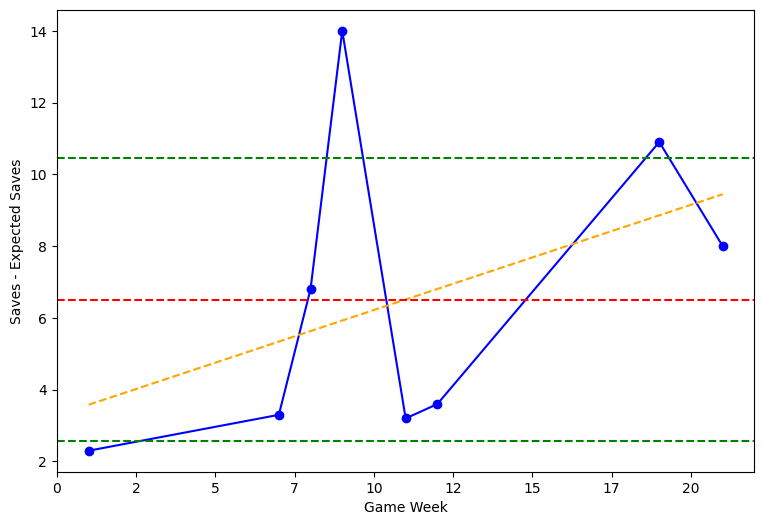

In [40]:
x = drop_cols['Round']
y = drop_cols['Saves - xSaves']

#Calculating the Mean and Standard Deviation of y values
mean_value = np.mean(y)
std_value = np.std(y)

plt.figure(figsize=(9, 6))

slope, intercept, r_value, p_value, std_err = linregress(x, y)

#Calculate the line of best fit using linear regression
line = slope * x + intercept

#plot data points
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Game Week')
plt.plot(x, line, color='orange', linestyle='--', label=f'Linear Fit (Gradient: {slope:.2f} ± {std_err:.2f})')

#Add lines for mean, mean+std, mean-std
plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.axhline(mean_value + std_value, color='green', linestyle='--', label='Mean + STD')
plt.axhline(mean_value - std_value, color='green', linestyle='--', label='Mean - STD')

# Set x-axis formatter to display integers without decimals
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.xlabel('Game Week')
plt.ylabel('Saves - Expected Saves')
print("Gradient of the linear fit line:", f"{slope:.2f}")
print("Uncertainty of the gradient:", f"{std_err:.2f}")
plt.savefig('Saves Difference.png')
plt.show()



The plot shows the green dashes (-) for Mean + STD and Mean - STD which is the Highest and lowest Value for save difference. Only once in game week 1 did Emily Ramsey underperform beyond the lowest value for Mean - STD for the season. With an average save difference of 6.5, Emily Ramsey would be a suitable candidate for the Number 1 (goalkeeper) spot in the Team of the Season. 

## Outfield Players

In [41]:
#Filtering Players that are not Goalkeepers
df_op = df_player[df_player['position'] != 'Goalkeeper']
df_op

full_name  age     season    position  \
0     Abbey-Leigh Stringer   28  2022/2023  Midfielder   
1            Abbie McManus   30  2022/2023    Defender   
2             Adriana Leon   31  2022/2023     Forward   
3       Agnes Beever-Jones   20  2022/2023     Forward   
4            Aileen Whelan   32  2022/2023     Forward   
..                     ...  ...        ...         ...   
546  Viktoria Schnaderbeck   32  2021/2022    Defender   
547         Vilde Bøe Risa   28  2021/2022  Midfielder   
548       Vivianne Miedema   27  2021/2022     Forward   
549           Yui Hasegawa   26  2021/2022  Midfielder   
550            Zaneta Wyne   33  2021/2022  Midfielder   

                Current Club  minutes_played_overall  minutes_played_home  \
0      West Ham United Women                     802                  398   
1         Leicester City WFC                     152                   62   
2    Manchester United Women                      76                   66   
3              Everton Women                     757                  359   
4         Leicester City WFC                    1929                  990   
..                       ...                     ...                  ...   
546  Tottenham Hotspur Women                     271                  135   
547  Manchester United Women                     699                  366   
548            Arsenal Women                    1743                  834   
549    West Ham United Women                    1461                  810   
550    West Ham United Women                    1150                  423   

     minutes_played_away  nationality  appearances_overall  appearances_home  \
0                    404      England                   11                 6   
1                     90      England                    2                 1   
2                     10       Canada                    5                 4   
3                    398      England                   16                 8   
4                    939      England                   22                11   
..                   ...          ...                  ...               ...   
546                  136      Austria                    6                 4   
547                  333       Norway                   17                 9   
548                  909  Netherlands                   22                11   
549                  651        Japan                   17                 9   
550                  727          USA                   18                 8   

     appearances_away  goals_overall  goals_home  goals_away  assists_overall  \
0                   5              0           0           0                0   
1                   1              0           0           0                0   
2                   1              1           1           0                0   
3                   8              2           2           0                0   
4                  11              1           1           0                1   
..                ...            ...         ...         ...              ...   
546                 2              0           0           0                0   
547                 8              2           1           1                1   
548                11             14           8           6                8   
549                 8              2           0           2                2   
550                10              1           0           1                0   

     assists_home  assists_away  penalty_goals  penalty_misses  \
0               0             0              0               0   
1               0             0              0               0   
2               0             0              0               0   
3               0             0              0               0   
4               1             0              0               0   
..            ...           ...            ...             ...   

### Plot of Overall Goals by Club

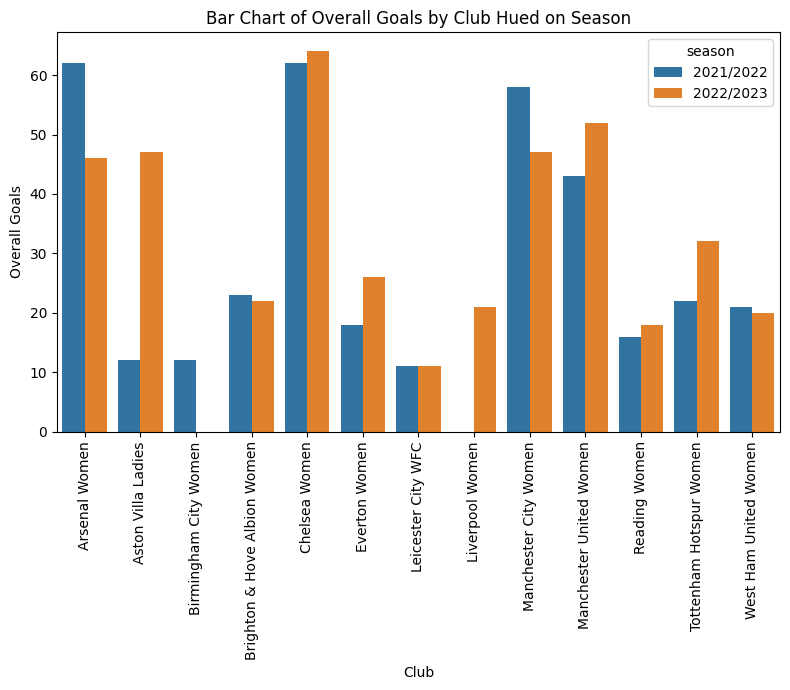

In [42]:
grouped_df_op = df_op.groupby(['Current Club', 'season'])['goals_overall'].sum().reset_index()

plt.figure(figsize=(8, 7))

ax = sns.barplot(data=grouped_df_op, x="Current Club", y="goals_overall", hue="season")

ax.set_xlabel('Club')
ax.set_ylabel('Overall Goals')
ax.set_title('Bar Chart of Overall Goals by Club Hued on Season')

plt.legend(title='season')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

From the above plot, we can see that for 2021/2022 Arsenal Women had the most goals (GF) - 65 followed by Chelsea Women - 62. Chelsea Women Went on to Win the WSL that season by a single point over Arsenal Women. For 2022/2023 season Chelsea Women had the most goals- 66 and retained their title, closely in 2nd place was Manchester United Women with 56 goals.

## Defenders

In [43]:
#Filtering player data by position of Defender for the 2022/2023 season
df_defender = df_player[(df_player['position'] == 'Defender') & (df_player['season'] == '2022/2023')]
df_defender

full_name  age     season  position  \
1         Abbie McManus   30  2022/2023  Defender   
7        Alanna Kennedy   28  2022/2023  Defender   
9        Alex Greenwood   30  2022/2023  Defender   
16           Amy Turner   32  2022/2023  Defender   
18         Aniek Nouwen   24  2022/2023  Defender   
..                  ...  ...        ...       ...   
267        Steph Catley   29  2022/2023  Defender   
268  Stephanie Houghton   35  2022/2023  Defender   
272        Teyah Goldie   19  2022/2023  Defender   
277   Victoria Williams   33  2022/2023  Defender   
285           Zoe Morse   25  2022/2023  Defender   

                     Current Club  minutes_played_overall  \
1              Leicester City WFC                     152   
7           Manchester City Women                     180   
9           Manchester City Women                    1794   
16        Tottenham Hotspur Women                    1856   
18                  Chelsea Women                     118   
..                            ...                     ...   
267                 Arsenal Women                    1189   
268         Manchester City Women                    1173   
272                 Arsenal Women                       5   
277  Brighton & Hove Albion Women                     827   
285  Brighton & Hove Albion Women                    1260   

     minutes_played_home  minutes_played_away  nationality  \
1                     62                   90      England   
7                     90                   90    Australia   
9                    968                  826      England   
16                   970                  886      England   
18                    12                  106  Netherlands   
..                   ...                  ...          ...   
267                  582                  607    Australia   
268                  543                  630      England   
272                    0                    5      England   
277                  377                  450      England   
285                  630                  630          USA   

     appearances_overall  appearances_home  appearances_away  goals_overall  \
1                      2                 1                 1              0   
7                      2                 1                 1              0   
9                     21                11                10              0   
16                    22                11                11              0   
18                     3                 1                 2              0   
..                   ...               ...               ...            ...   
267                   17                 8                 9              1   
268                   14                 7                 7              2   
272                    1                 0                 1              0   
277                   10                 5                 5              0   
285                   14                 7                 7              0   

     goals_home  goals_away  assists_overall  assists_home  assists_away  \
1             0           0                0             0             0   
7             0           0                0             0             0   
9             0           0                3             2             1   
16            0           0                0             0             0   
18            0           0                0             0             0   
..          ...         ...              ...           ...           ...   
267           0           1                2             2             0   
268           2           0                1             0             1   
272           0           0                0             0             0   
277           0           0                0             0             0   
285           0           0                0             0             0   

     penalty_goals  penalty_misses  c

### Scrape Player Data for Additional Statistics

In [44]:
def defensive_data(url):
    
    #Path for ChromeDriver
    driver_path = '/Users/waleibitoye/Downloads/chromedriver-mac-x64/chromedriver'  

    #Create ChromeOptions object to use Chrome Browser
    chrome_options = webdriver.ChromeOptions()
    #To run the command in headless mode i.e. without an interface
    chrome_options.add_argument("--headless")

    chrome_options.add_argument(f'--chromedriver={driver_path}')
    
    #Initialize ChromeDriver Instance
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    #Wait time set to 5secs to allow elements on the webpage to fully load
    driver.implicitly_wait(5)
    
    #get page source of the webpage
    page_source = driver.page_source

    #use pandas to read tables on the webpage
    df_def_stats = pd.read_html(page_source, header=1)[2]
    
    #close browser session
    driver.quit()

    return df_def_stats

url = 'https://fbref.com/en/comps/189/2022-2023/defense/2022-2023-Womens-Super-League-Stats'

def_data = defensive_data(url)
def_data


Rk               Player   Nation    Pos            Squad Age  Born  \
0      1       Alsu Abdullina   ru RUS  DF,FW          Chelsea  21  2001   
1      2   Princess Ademiluyi  eng ENG  MF,FW         West Ham  16  2006   
2      3    Michelle Agyemang  eng ENG     FW          Arsenal  16  2006   
3      4           Asmita Ale  eng ENG  DF,MF        Tottenham  20  2001   
4      5      Laia Aleixandri   es ESP  DF,MF  Manchester City  21  2000   
..   ...                  ...      ...    ...              ...  ..   ...   
313  302     Shelina Zadorsky   ca CAN     DF        Tottenham  29  1992   
314  303          Katie Zelem  eng ENG     MF   Manchester Utd  26  1996   
315  304  Julia Zigiotti Olme   se SWE     MF         Brighton  24  1997   
316  305   Manuela Zinsberger   at AUT     GK          Arsenal  26  1995   
317  306          Jessica Ziu   ie IRL  MF,DF         West Ham  20  2002   

      90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl.1 Att   Tkl% Lost Blocks  Sh  \
0     1.3   4    4       2       1       1     1   2   50.0    1      2   0   
1     0.1   0    0       0       0       0     0   0    NaN    0      0   0   
2     0.2   0    0       0       0       0     0   0    NaN    0      0   0   
3     9.1  26   23      12      13       1     7  17   41.2   10     11   1   
4    14.5  21   14      10       7       4     7  11   63.6    4     10   2   
..    ...  ..  ...     ...     ...     ...   ...  ..    ...  ...    ...  ..   
313  13.0   5    4       2       3       0     1   4   25.0    3     16  12   
314  21.0  55   39      15      29      11    19  41   46.3   22     24   6   
315  18.6  47   31      12      29       6    19  36   52.8   17     19   3   
316  18.0   1    1       1       0       0     1   1  100.0    0      1   0   
317   1.9   3    1       0       3       0     1   5   20.0    4      3   0   

    Pass Int Tkl+Int Clr Err  Matches  
0      2   2       6   4   0  Matches  
1      0   0       0   0   0  Matches  
2      0   0       0   0   0  Matches  
3     10  21      47  23   0  Matches  
4      8  23      44  19   0  Matches  
..   ...  ..     ...  ..  ..      ...  
313    4  26      31  48   0  Matches  
314   18  28      83  16   0  Matches  
315   16  30      77  18   0  Matches  
316    1   0       1   7   0  Matches  
317    3   1       4   4   0  Matches  

[318 rows x 25 columns]

In [45]:
#Dropping blank rows
rows_drop1 = [311,285,259,233,207,181,155,129,103,77,51,25]

def_data = def_data.drop(rows_drop1)
def_data

Rk               Player   Nation    Pos            Squad Age  Born  \
0      1       Alsu Abdullina   ru RUS  DF,FW          Chelsea  21  2001   
1      2   Princess Ademiluyi  eng ENG  MF,FW         West Ham  16  2006   
2      3    Michelle Agyemang  eng ENG     FW          Arsenal  16  2006   
3      4           Asmita Ale  eng ENG  DF,MF        Tottenham  20  2001   
4      5      Laia Aleixandri   es ESP  DF,MF  Manchester City  21  2000   
..   ...                  ...      ...    ...              ...  ..   ...   
313  302     Shelina Zadorsky   ca CAN     DF        Tottenham  29  1992   
314  303          Katie Zelem  eng ENG     MF   Manchester Utd  26  1996   
315  304  Julia Zigiotti Olme   se SWE     MF         Brighton  24  1997   
316  305   Manuela Zinsberger   at AUT     GK          Arsenal  26  1995   
317  306          Jessica Ziu   ie IRL  MF,DF         West Ham  20  2002   

      90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl.1 Att   Tkl% Lost Blocks  Sh  \
0     1.3   4    4       2       1       1     1   2   50.0    1      2   0   
1     0.1   0    0       0       0       0     0   0    NaN    0      0   0   
2     0.2   0    0       0       0       0     0   0    NaN    0      0   0   
3     9.1  26   23      12      13       1     7  17   41.2   10     11   1   
4    14.5  21   14      10       7       4     7  11   63.6    4     10   2   
..    ...  ..  ...     ...     ...     ...   ...  ..    ...  ...    ...  ..   
313  13.0   5    4       2       3       0     1   4   25.0    3     16  12   
314  21.0  55   39      15      29      11    19  41   46.3   22     24   6   
315  18.6  47   31      12      29       6    19  36   52.8   17     19   3   
316  18.0   1    1       1       0       0     1   1  100.0    0      1   0   
317   1.9   3    1       0       3       0     1   5   20.0    4      3   0   

    Pass Int Tkl+Int Clr Err  Matches  
0      2   2       6   4   0  Matches  
1      0   0       0   0   0  Matches  
2      0   0       0   0   0  Matches  
3     10  21      47  23   0  Matches  
4      8  23      44  19   0  Matches  
..   ...  ..     ...  ..  ..      ...  
313    4  26      31  48   0  Matches  
314   18  28      83  16   0  Matches  
315   16  30      77  18   0  Matches  
316    1   0       1   7   0  Matches  
317    3   1       4   4   0  Matches  

[306 rows x 25 columns]

In [46]:
#Fill NaN values with 0
def_data.fillna(0)

Rk               Player   Nation    Pos            Squad Age  Born  \
0      1       Alsu Abdullina   ru RUS  DF,FW          Chelsea  21  2001   
1      2   Princess Ademiluyi  eng ENG  MF,FW         West Ham  16  2006   
2      3    Michelle Agyemang  eng ENG     FW          Arsenal  16  2006   
3      4           Asmita Ale  eng ENG  DF,MF        Tottenham  20  2001   
4      5      Laia Aleixandri   es ESP  DF,MF  Manchester City  21  2000   
..   ...                  ...      ...    ...              ...  ..   ...   
313  302     Shelina Zadorsky   ca CAN     DF        Tottenham  29  1992   
314  303          Katie Zelem  eng ENG     MF   Manchester Utd  26  1996   
315  304  Julia Zigiotti Olme   se SWE     MF         Brighton  24  1997   
316  305   Manuela Zinsberger   at AUT     GK          Arsenal  26  1995   
317  306          Jessica Ziu   ie IRL  MF,DF         West Ham  20  2002   

      90s Tkl TklW Def 3rd Mid 3rd Att 3rd Tkl.1 Att   Tkl% Lost Blocks  Sh  \
0     1.3   4    4       2       1       1     1   2   50.0    1      2   0   
1     0.1   0    0       0       0       0     0   0      0    0      0   0   
2     0.2   0    0       0       0       0     0   0      0    0      0   0   
3     9.1  26   23      12      13       1     7  17   41.2   10     11   1   
4    14.5  21   14      10       7       4     7  11   63.6    4     10   2   
..    ...  ..  ...     ...     ...     ...   ...  ..    ...  ...    ...  ..   
313  13.0   5    4       2       3       0     1   4   25.0    3     16  12   
314  21.0  55   39      15      29      11    19  41   46.3   22     24   6   
315  18.6  47   31      12      29       6    19  36   52.8   17     19   3   
316  18.0   1    1       1       0       0     1   1  100.0    0      1   0   
317   1.9   3    1       0       3       0     1   5   20.0    4      3   0   

    Pass Int Tkl+Int Clr Err  Matches  
0      2   2       6   4   0  Matches  
1      0   0       0   0   0  Matches  
2      0   0       0   0   0  Matches  
3     10  21      47  23   0  Matches  
4      8  23      44  19   0  Matches  
..   ...  ..     ...  ..  ..      ...  
313    4  26      31  48   0  Matches  
314   18  28      83  16   0  Matches  
315   16  30      77  18   0  Matches  
316    1   0       1   7   0  Matches  
317    3   1       4   4   0  Matches  

[306 rows x 25 columns]

In [47]:
#Replace Player Name to Match

replace_def = {'Carlotte Wubben-Moy' : 'Lotte Wubben-Moy', 'Catherine Joan Bott':'CJ Bott', 
 'Easther Kellsy Philomene Mayi Kith': 'Easther Mayi Kith', 'Esme Beth Morgan':'Esme Morgan',
'Gilly Louise Scarlett Flaherty':'Gilly Flaherty', 'Hannah Jayne Blundell':'Hannah Blundell',
'Laia Aleixandri López':'Laia Aleixandri', 'Leila Ouahabi El Ouahabi':'Leila Ouahabi',
'Ona Batlle Pascual':'Ona Batlle', 'Rafaelle Leone Carvalho Souza':'Rafaelle',
'Rikke Læntver Sevecke':'Rikke Sevecke', 'Stephanie Houghton':'Steph Houghton', 
'Magdalena Ericsson':'Magdalena Eriksson', 'Kadiesha Buchanan':'Kadeisha Buchanan'}

df_defender['full_name'] = df_defender['full_name'].replace(replace_def)
df_defender

full_name  age     season  position  \
1        Abbie McManus   30  2022/2023  Defender   
7       Alanna Kennedy   28  2022/2023  Defender   
9       Alex Greenwood   30  2022/2023  Defender   
16          Amy Turner   32  2022/2023  Defender   
18        Aniek Nouwen   24  2022/2023  Defender   
..                 ...  ...        ...       ...   
267       Steph Catley   29  2022/2023  Defender   
268     Steph Houghton   35  2022/2023  Defender   
272       Teyah Goldie   19  2022/2023  Defender   
277  Victoria Williams   33  2022/2023  Defender   
285          Zoe Morse   25  2022/2023  Defender   

                     Current Club  minutes_played_overall  \
1              Leicester City WFC                     152   
7           Manchester City Women                     180   
9           Manchester City Women                    1794   
16        Tottenham Hotspur Women                    1856   
18                  Chelsea Women                     118   
..                            ...                     ...   
267                 Arsenal Women                    1189   
268         Manchester City Women                    1173   
272                 Arsenal Women                       5   
277  Brighton & Hove Albion Women                     827   
285  Brighton & Hove Albion Women                    1260   

     minutes_played_home  minutes_played_away  nationality  \
1                     62                   90      England   
7                     90                   90    Australia   
9                    968                  826      England   
16                   970                  886      England   
18                    12                  106  Netherlands   
..                   ...                  ...          ...   
267                  582                  607    Australia   
268                  543                  630      England   
272                    0                    5      England   
277                  377                  450      England   
285                  630                  630          USA   

     appearances_overall  appearances_home  appearances_away  goals_overall  \
1                      2                 1                 1              0   
7                      2                 1                 1              0   
9                     21                11                10              0   
16                    22                11                11              0   
18                     3                 1                 2              0   
..                   ...               ...               ...            ...   
267                   17                 8                 9              1   
268                   14                 7                 7              2   
272                    1                 0                 1              0   
277                   10                 5                 5              0   
285                   14                 7                 7              0   

     goals_home  goals_away  assists_overall  assists_home  assists_away  \
1             0           0                0             0             0   
7             0           0                0             0             0   
9             0           0                3             2             1   
16            0           0                0             0             0   
18            0           0                0             0             0   
..          ...         ...              ...           ...           ...   
267           0           1                2             2             0   
268           2           0                1             0             1   
272           0           0                0             0             0   
277           0           0                0             0             0   
285           0           0                0             0             0   

     penalty_goals  penalty_misses  clean_sheets

In [48]:
#Merging two dataframes
df_merged1 = df_defender.merge(def_data[['Player', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Blocks', 'Int', 'Clr']]
                               ,left_on='full_name', right_on='Player', how='left')
df_merged1

full_name  age     season  position                  Current Club  \
0       Abbie McManus   30  2022/2023  Defender            Leicester City WFC   
1      Alanna Kennedy   28  2022/2023  Defender         Manchester City Women   
2      Alex Greenwood   30  2022/2023  Defender         Manchester City Women   
3          Amy Turner   32  2022/2023  Defender       Tottenham Hotspur Women   
4        Aniek Nouwen   24  2022/2023  Defender                 Chelsea Women   
..                ...  ...        ...       ...                           ...   
71       Steph Catley   29  2022/2023  Defender                 Arsenal Women   
72     Steph Houghton   35  2022/2023  Defender         Manchester City Women   
73       Teyah Goldie   19  2022/2023  Defender                 Arsenal Women   
74  Victoria Williams   33  2022/2023  Defender  Brighton & Hove Albion Women   
75          Zoe Morse   25  2022/2023  Defender  Brighton & Hove Albion Women   

    minutes_played_overall  minutes_played_home  minutes_played_away  \
0                      152                   62                   90   
1                      180                   90                   90   
2                     1794                  968                  826   
3                     1856                  970                  886   
4                      118                   12                  106   
..                     ...                  ...                  ...   
71                    1189                  582                  607   
72                    1173                  543                  630   
73                       5                    0                    5   
74                     827                  377                  450   
75                    1260                  630                  630   

    nationality  appearances_overall  appearances_home  appearances_away  \
0       England                    2                 1                 1   
1     Australia                    2                 1                 1   
2       England                   21                11                10   
3       England                   22                11                11   
4   Netherlands                    3                 1                 2   
..          ...                  ...               ...               ...   
71    Australia                   17                 8                 9   
72      England                   14                 7                 7   
73      England                    1                 0                 1   
74      England                   10                 5                 5   
75          USA                   14                 7                 7   

    goals_overall  goals_home  goals_away  assists_overall  assists_home  \
0               0           0           0                0             0   
1               0           0           0                0             0   
2               0           0           0                3             2   
3               0           0           0                0             0   
4               0           0           0                0             0   
..            ...         ...         ...              ...           ...   
71              1           0           1                2             2   
72              2           2           0                1             0   
73              0           0           0                0             0   
74              0           0           0                0             0   
75              0           0           0                0             0   

    assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
0              0              0               0                     0   
1              0              0               0                     1   
2              1              0               1                     6   
3              0              0               0         

In [49]:
#Sorting Defenders by Overall Cleansheet
sorted_def = df_merged1.sort_values(by='clean_sheets_overall', ascending=False)
top_five_def = sorted_def.head(6)
top_five_def

full_name  age     season  position             Current Club  \
30     Hannah Blundell   29  2022/2023  Defender  Manchester United Women   
55          Ona Batlle   24  2022/2023  Defender  Manchester United Women   
46  Magdalena Eriksson   30  2022/2023  Defender            Chelsea Women   
11    Lotte Wubben-Moy   24  2022/2023  Defender            Arsenal Women   
41   Laura Wienroither   24  2022/2023  Defender            Arsenal Women   
54       Noelle Maritz   27  2022/2023  Defender            Arsenal Women   

    minutes_played_overall  minutes_played_home  minutes_played_away  \
30                    1848                  896                  952   
55                    1710                  900                  810   
46                    1579                  772                  807   
11                    1615                  669                  946   
41                     972                  631                  341   
54                    1137                  452                  685   

    nationality  appearances_overall  appearances_home  appearances_away  \
30      England                   22                11                11   
55        Spain                   19                10                 9   
46       Sweden                   20                10                10   
11      England                   21                10                11   
41      Austria                   17                 9                 8   
54  Switzerland                   17                 7                10   

    goals_overall  goals_home  goals_away  assists_overall  assists_home  \
30              1           0           1                2             0   
55              1           1           0                9             7   
46              1           1           0                0             0   
11              1           0           1                1             0   
41              1           1           0                0             0   
54              0           0           0                2             0   

    assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
30             2              0               0                    14   
55             2              0               0                    12   
46             0              0               0                    11   
11             1              0               0                    11   
41             0              0               0                     9   
54             2              0               0                     8   

    clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
30                  8                  6                10              3   
55                  8                  4                 9              2   
46                  6                  5                12              5   
11                  6                  5                14              6   
41                  5                  4                 4              3   
54                  4                  4                12              4   

    conceded_away  yellow_cards_overall  red_cards_overall  \
30              7                     3                  0   
55              7                     1                  0   
46              7                     0                  0   
11              8                     1                  0   
41              1                     0                  0   
54              8                     1                  0   

    hattricks_total_overall  two_goals_in_a_game_total_overall  \
30                        0                                  0   
55                        0                                  0   
46                        0                                  0   
11                        0                                  0   
41                        0                                  0   
54                 

In [50]:
#Dropping Player Column as full_name column exists
top_five_def = top_five_def.drop('Player', axis=1)
top_five_def

full_name  age     season  position             Current Club  \
30     Hannah Blundell   29  2022/2023  Defender  Manchester United Women   
55          Ona Batlle   24  2022/2023  Defender  Manchester United Women   
46  Magdalena Eriksson   30  2022/2023  Defender            Chelsea Women   
11    Lotte Wubben-Moy   24  2022/2023  Defender            Arsenal Women   
41   Laura Wienroither   24  2022/2023  Defender            Arsenal Women   
54       Noelle Maritz   27  2022/2023  Defender            Arsenal Women   

    minutes_played_overall  minutes_played_home  minutes_played_away  \
30                    1848                  896                  952   
55                    1710                  900                  810   
46                    1579                  772                  807   
11                    1615                  669                  946   
41                     972                  631                  341   
54                    1137                  452                  685   

    nationality  appearances_overall  appearances_home  appearances_away  \
30      England                   22                11                11   
55        Spain                   19                10                 9   
46       Sweden                   20                10                10   
11      England                   21                10                11   
41      Austria                   17                 9                 8   
54  Switzerland                   17                 7                10   

    goals_overall  goals_home  goals_away  assists_overall  assists_home  \
30              1           0           1                2             0   
55              1           1           0                9             7   
46              1           1           0                0             0   
11              1           0           1                1             0   
41              1           1           0                0             0   
54              0           0           0                2             0   

    assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
30             2              0               0                    14   
55             2              0               0                    12   
46             0              0               0                    11   
11             1              0               0                    11   
41             0              0               0                     9   
54             2              0               0                     8   

    clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
30                  8                  6                10              3   
55                  8                  4                 9              2   
46                  6                  5                12              5   
11                  6                  5                14              6   
41                  5                  4                 4              3   
54                  4                  4                12              4   

    conceded_away  yellow_cards_overall  red_cards_overall  \
30              7                     3                  0   
55              7                     1                  0   
46              7                     0                  0   
11              8                     1                  0   
41              1                     0                  0   
54              8                     1                  0   

    hattricks_total_overall  two_goals_in_a_game_total_overall  \
30                        0                                  0   
55                        0                                  0   
46                        0                                  0   
11                        0                                  0   
41                        0                                  0   
54                 

### Plot of Overall Clean Sheets for Defenders

<Axes: xlabel='clean_sheets_overall', ylabel='full_name'>

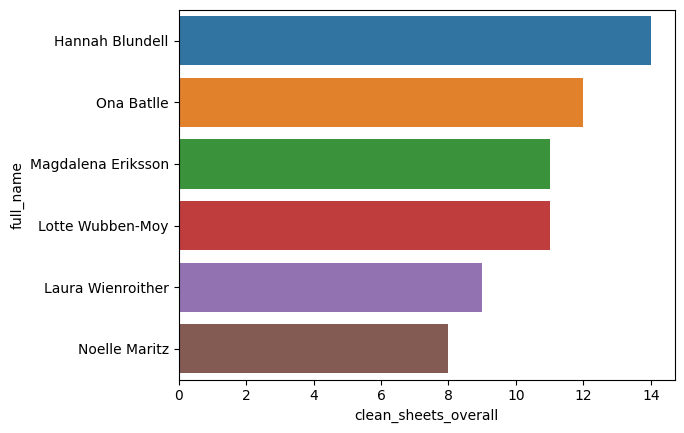

In [51]:
sns.barplot(data=top_five_def, x="clean_sheets_overall", y="full_name")

In [52]:
#Convert Columns to Integers
cols_numeric = ['goals_overall', 'penalty_goals', 'penalty_misses', 'red_cards_overall', 
               'hattricks_total_overall', 'two_goals_in_a_game_total_overall', 'saves_total_overall',
               'PSxG/SoT', 'xSaves_total_overall', 'SoTA', ]

top_five_def[cols_numeric] = top_five_def[cols_numeric].apply(pd.to_numeric, errors='coerce')

top_five_def

full_name  age     season  position             Current Club  \
30     Hannah Blundell   29  2022/2023  Defender  Manchester United Women   
55          Ona Batlle   24  2022/2023  Defender  Manchester United Women   
46  Magdalena Eriksson   30  2022/2023  Defender            Chelsea Women   
11    Lotte Wubben-Moy   24  2022/2023  Defender            Arsenal Women   
41   Laura Wienroither   24  2022/2023  Defender            Arsenal Women   
54       Noelle Maritz   27  2022/2023  Defender            Arsenal Women   

    minutes_played_overall  minutes_played_home  minutes_played_away  \
30                    1848                  896                  952   
55                    1710                  900                  810   
46                    1579                  772                  807   
11                    1615                  669                  946   
41                     972                  631                  341   
54                    1137                  452                  685   

    nationality  appearances_overall  appearances_home  appearances_away  \
30      England                   22                11                11   
55        Spain                   19                10                 9   
46       Sweden                   20                10                10   
11      England                   21                10                11   
41      Austria                   17                 9                 8   
54  Switzerland                   17                 7                10   

    goals_overall  goals_home  goals_away  assists_overall  assists_home  \
30              1           0           1                2             0   
55              1           1           0                9             7   
46              1           1           0                0             0   
11              1           0           1                1             0   
41              1           1           0                0             0   
54              0           0           0                2             0   

    assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
30             2              0               0                    14   
55             2              0               0                    12   
46             0              0               0                    11   
11             1              0               0                    11   
41             0              0               0                     9   
54             2              0               0                     8   

    clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
30                  8                  6                10              3   
55                  8                  4                 9              2   
46                  6                  5                12              5   
11                  6                  5                14              6   
41                  5                  4                 4              3   
54                  4                  4                12              4   

    conceded_away  yellow_cards_overall  red_cards_overall  \
30              7                     3                  0   
55              7                     1                  0   
46              7                     0                  0   
11              8                     1                  0   
41              1                     0                  0   
54              8                     1                  0   

    hattricks_total_overall  two_goals_in_a_game_total_overall  \
30                        0                                  0   
55                        0                                  0   
46                        0                                  0   
11                        0                                  0   
41                        0                                  0   
54                 

### Scrape Match Data For Each Players and Store in a Dataframe

In [54]:
def def_data(url):
    #Path for ChromeDriver
    driver_path = '/Users/waleibitoye/Downloads/chromedriver-mac-x64/chromedriver'  

    #Create ChromeOptions object to use Chrome Browser
    chrome_options = webdriver.ChromeOptions()
    #To run the command in headless mode i.e. without an interface
    chrome_options.add_argument("--headless")

    chrome_options.add_argument(f'--chromedriver={driver_path}')
    
    #Initialize ChromeDriver Instance
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    #Wait time set to 5secs to allow elements on the webpage to fully load
    driver.implicitly_wait(5)
    
    #get page source of the webpage
    page_source = driver.page_source

    #use pandas to read tables on the webpage
    df_def_stats = pd.read_html(page_source, header=1)[0]


    return df_def_stats

urls = [
    'https://fbref.com/en/players/fe9eaddc/matchlogs/2022-2023/Hannah-Blundell-Match-Logs',
    'https://fbref.com/en/players/2a2d32f9/matchlogs/2022-2023/c189/Ona-Batlle-Match-Logs',
    'https://fbref.com/en/players/bb454bb1/matchlogs/2022-2023/c189/Magdalena-Eriksson-Match-Logs',
    'https://fbref.com/en/players/f254ebd6/matchlogs/2022-2023/c189/Lotte-Wubben-Moy-Match-Logs',
    'https://fbref.com/en/players/f8146853/matchlogs/2022-2023/c189/Laura-Wienroither-Match-Logs'
    
]

dataframes = {}

for url in urls:
    player_name = url.split('/')[-1].replace('-Match-Logs', '') 
    dataframes[player_name] = def_data(url)

hannah_b = dataframes['Hannah-Blundell']
ona_batlle = dataframes['Ona-Batlle']
mag_eriksson = dataframes['Magdalena-Eriksson']
lotte_Moy = dataframes['Lotte-Wubben-Moy']
laura_w = dataframes['Laura-Wienroither']

In [55]:
hannah_b

Date  Day Comp         Round Venue  Result           Squad  \
0   2022-09-17  Sat  WSL   Matchweek 2  Home   W 4–0  Manchester Utd   
1   2022-09-25  Sun  WSL   Matchweek 3  Away   W 2–0  Manchester Utd   
2   2022-10-16  Sun  WSL   Matchweek 4  Home   W 4–0  Manchester Utd   
3   2022-10-23  Sun  WSL   Matchweek 5  Away   W 1–0  Manchester Utd   
4   2022-10-30  Sun  WSL   Matchweek 6  Away   W 3–0  Manchester Utd   
5   2022-11-06  Sun  WSL   Matchweek 7  Home   L 1–3  Manchester Utd   
6   2022-11-19  Sat  WSL   Matchweek 8  Away   W 3–2  Manchester Utd   
7   2022-12-03  Sat  WSL   Matchweek 9  Home   W 5–0  Manchester Utd   
8   2022-12-11  Sun  WSL  Matchweek 10  Away   D 1–1  Manchester Utd   
9   2023-01-15  Sun  WSL  Matchweek 11  Home   W 6–0  Manchester Utd   
10  2023-01-22  Sun  WSL  Matchweek 12  Away   W 1–0  Manchester Utd   
11  2023-02-05  Sun  WSL  Matchweek 13  Home   D 0–0  Manchester Utd   
12  2023-02-12  Sun  WSL   Matchweek 1  Away   W 2–1  Manchester Utd   
13  2023-03-05  Sun  WSL  Matchweek 14  Home   W 5–1  Manchester Utd   
14  2023-03-12  Sun  WSL  Matchweek 15  Away   L 0–1  Manchester Utd   
15  2023-03-25  Sat  WSL  Matchweek 16  Home   W 4–0  Manchester Utd   
16  2023-04-01  Sat  WSL  Matchweek 17  Away   W 4–0  Manchester Utd   
17  2023-04-19  Wed  WSL  Matchweek 18  Home   W 1–0  Manchester Utd   
18  2023-04-28  Fri  WSL  Matchweek 19  Away   W 3–2  Manchester Utd   
19  2023-05-07  Sun  WSL  Matchweek 20  Home   W 3–0  Manchester Utd   
20  2023-05-21  Sun  WSL  Matchweek 21  Home   W 2–1  Manchester Utd   
21  2023-05-27  Sat  WSL  Matchweek 22  Away   W 1–0  Manchester Utd   
22         NaN  NaN  NaN           NaN   NaN  18-2-2             NaN   

           Opponent  Start    Pos   Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0           Reading      Y     LB    90    0    0   0      0   0    0     0   
1          West Ham      Y     LB    90    1    0   0      0   2    2     1   
2          Brighton      Y     LB    45    0    0   0      0   0    0     0   
3    Leicester City      Y     LB    60    0    0   0      0   1    1     0   
4           Everton      Y     RB    80    0    0   0      0   0    0     1   
5           Chelsea      Y     RB    63    0    0   0      0   0    0     0   
6           Arsenal      Y     LB    90    0    0   0      0   0    0     0   
7       Aston Villa      Y     LB    90    0    0   0      0   0    0     0   
8   Manchester City      Y     LB    90    0    0   0      0   0    0     0   
9         Liverpool      Y     LB    69    0    0   0      0   1    0     0   
10          Reading      Y     LB    90    0    0   0      0   1    0     0   
11          Everton      Y     LB    90    0    0   0      0   2    1     0   
12        Tottenham      Y     LB    90    0    0   0      0   0    0     0   
13   Leicester City      Y     LB    90    0    0   0      0   2    0     0   
14          Chelsea      Y  LB,LW    90    0    0   0      0   0    0     0   
15         West Ham      Y     LB    90    0    0   0      0   0    0     0   
16         Brighton      Y     LB    90    0    1   0      0   0    0     0   
17          Arsenal      Y     LB    90    0    0   0      0   0    0     1   
18      Aston Villa      Y     LB    90    0    1   0      0   0    0     0   
19        Tottenham      Y     LB    85    0    0   0      0   1    1     0   
20  Manchester City      Y     LB    90    0    0   0      0   1    0     0   
21        Liverpool      Y     LB    90    0    0   0      0   0    0     0   
22              NaN  22/22    NaN  1842    1    2   0      0  11    5     3   

    CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  \
0      0       97    1    2       1  0.0   0.0  0.0    2    0    79    88   
1      0       78    2    3       1  0.1   0.1  0.0    2    0    56    66   
2      0       49    0    0       2  0.0   0.0  0.1    2    0    39    46   
3      0       69    3    0       1  0.2   0.2  0.0    1    0    60    64   

In [56]:
#Dropping Irrelevant rows
hannah_b.drop(index=22, inplace=True)

In [57]:
hannah_b.head()

Date  Day Comp        Round Venue Result           Squad  \
0  2022-09-17  Sat  WSL  Matchweek 2  Home  W 4–0  Manchester Utd   
1  2022-09-25  Sun  WSL  Matchweek 3  Away  W 2–0  Manchester Utd   
2  2022-10-16  Sun  WSL  Matchweek 4  Home  W 4–0  Manchester Utd   
3  2022-10-23  Sun  WSL  Matchweek 5  Away  W 1–0  Manchester Utd   
4  2022-10-30  Sun  WSL  Matchweek 6  Away  W 3–0  Manchester Utd   

         Opponent Start Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  \
0         Reading     Y  LB   90    0    0   0      0   0    0     0     0   
1        West Ham     Y  LB   90    1    0   0      0   2    2     1     0   
2        Brighton     Y  LB   45    0    0   0      0   0    0     0     0   
3  Leicester City     Y  LB   60    0    0   0      0   1    1     0     0   
4         Everton     Y  RB   80    0    0   0      0   0    0     1     0   

   Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  \
0       97    1    2       1  0.0   0.0  0.0    2    0   79   88  89.8    10   
1       78    2    3       1  0.1   0.1  0.0    2    0   56   66  84.8     5   
2       49    0    0       2  0.0   0.0  0.1    2    0   39   46  84.8     2   
3       69    3    0       1  0.2   0.2  0.0    1    0   60   64  93.8     8   
4       55    1    1       1  0.0   0.0  0.0    0    0   41   50  82.0     3   

   Carries  PrgC  Att.1  Succ  Match Report  
0       29     1      3     2  Match Report  
1       31     1      1     0  Match Report  
2       15     2      1     1  Match Report  
3       49     1      1     1  Match Report  
4       36     2      0     0  Match Report

In [58]:
#Extract Text from the Round Column
hannah_b['Round'] = hannah_b['Round'].str.extract('(\d+)')
hannah_b.head()

Date  Day Comp Round Venue Result           Squad        Opponent  \
0  2022-09-17  Sat  WSL     2  Home  W 4–0  Manchester Utd         Reading   
1  2022-09-25  Sun  WSL     3  Away  W 2–0  Manchester Utd        West Ham   
2  2022-10-16  Sun  WSL     4  Home  W 4–0  Manchester Utd        Brighton   
3  2022-10-23  Sun  WSL     5  Away  W 1–0  Manchester Utd  Leicester City   
4  2022-10-30  Sun  WSL     6  Away  W 3–0  Manchester Utd         Everton   

  Start Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0     Y  LB   90    0    0   0      0   0    0     0     0       97    1    2   
1     Y  LB   90    1    0   0      0   2    2     1     0       78    2    3   
2     Y  LB   45    0    0   0      0   0    0     0     0       49    0    0   
3     Y  LB   60    0    0   0      0   1    1     0     0       69    3    0   
4     Y  RB   80    0    0   0      0   0    0     1     0       55    1    1   

   Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
0       1  0.0   0.0  0.0    2    0   79   88  89.8    10       29     1   
1       1  0.1   0.1  0.0    2    0   56   66  84.8     5       31     1   
2       2  0.0   0.0  0.1    2    0   39   46  84.8     2       15     2   
3       1  0.2   0.2  0.0    1    0   60   64  93.8     8       49     1   
4       1  0.0   0.0  0.0    0    0   41   50  82.0     3       36     2   

   Att.1  Succ  Match Report  
0      3     2  Match Report  
1      1     0  Match Report  
2      1     1  Match Report  
3      1     1  Match Report  
4      0     0  Match Report

In [59]:
#Convert Round Column to Integer
hannah_b['Round'] = pd.to_numeric(hannah_b['Round'])

In [60]:
#Sort Round Column in ascending format
gw_sort = hannah_b.sort_values(by = ['Round'])
gw_sort

Date  Day Comp  Round Venue Result           Squad         Opponent  \
12  2023-02-12  Sun  WSL      1  Away  W 2–1  Manchester Utd        Tottenham   
0   2022-09-17  Sat  WSL      2  Home  W 4–0  Manchester Utd          Reading   
1   2022-09-25  Sun  WSL      3  Away  W 2–0  Manchester Utd         West Ham   
2   2022-10-16  Sun  WSL      4  Home  W 4–0  Manchester Utd         Brighton   
3   2022-10-23  Sun  WSL      5  Away  W 1–0  Manchester Utd   Leicester City   
4   2022-10-30  Sun  WSL      6  Away  W 3–0  Manchester Utd          Everton   
5   2022-11-06  Sun  WSL      7  Home  L 1–3  Manchester Utd          Chelsea   
6   2022-11-19  Sat  WSL      8  Away  W 3–2  Manchester Utd          Arsenal   
7   2022-12-03  Sat  WSL      9  Home  W 5–0  Manchester Utd      Aston Villa   
8   2022-12-11  Sun  WSL     10  Away  D 1–1  Manchester Utd  Manchester City   
9   2023-01-15  Sun  WSL     11  Home  W 6–0  Manchester Utd        Liverpool   
10  2023-01-22  Sun  WSL     12  Away  W 1–0  Manchester Utd          Reading   
11  2023-02-05  Sun  WSL     13  Home  D 0–0  Manchester Utd          Everton   
13  2023-03-05  Sun  WSL     14  Home  W 5–1  Manchester Utd   Leicester City   
14  2023-03-12  Sun  WSL     15  Away  L 0–1  Manchester Utd          Chelsea   
15  2023-03-25  Sat  WSL     16  Home  W 4–0  Manchester Utd         West Ham   
16  2023-04-01  Sat  WSL     17  Away  W 4–0  Manchester Utd         Brighton   
17  2023-04-19  Wed  WSL     18  Home  W 1–0  Manchester Utd          Arsenal   
18  2023-04-28  Fri  WSL     19  Away  W 3–2  Manchester Utd      Aston Villa   
19  2023-05-07  Sun  WSL     20  Home  W 3–0  Manchester Utd        Tottenham   
20  2023-05-21  Sun  WSL     21  Home  W 2–1  Manchester Utd  Manchester City   
21  2023-05-27  Sat  WSL     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start    Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
12     Y     LB   90    0    0   0      0   0    0     0     0       97    6   
0      Y     LB   90    0    0   0      0   0    0     0     0       97    1   
1      Y     LB   90    1    0   0      0   2    2     1     0       78    2   
2      Y     LB   45    0    0   0      0   0    0     0     0       49    0   
3      Y     LB   60    0    0   0      0   1    1     0     0       69    3   
4      Y     RB   80    0    0   0      0   0    0     1     0       55    1   
5      Y     RB   63    0    0   0      0   0    0     0     0       41    0   
6      Y     LB   90    0    0   0      0   0    0     0     0       80    2   
7      Y     LB   90    0    0   0      0   0    0     0     0       71    2   
8      Y     LB   90    0    0   0      0   0    0     0     0       61    2   
9      Y     LB   69    0    0   0      0   1    0     0     0       60    4   
10     Y     LB   90    0    0   0      0   1    0     0     0       73    0   
11     Y     LB   90    0    0   0      0   2    1     0     0      107    4   
13     Y     LB   90    0    0   0      0   2    0     0     0       97    1   
14     Y  LB,LW   90    0    0   0      0   0    0     0     0       61    6   
15     Y     LB   90    0    0   0      0   0    0     0     0      110    5   
16     Y     LB   90    0    1   0      0   0    0     0     0       72    4   
17     Y     LB   90    0    0   0      0   0    0     1     0       63    4   
18     Y     LB   90    0    1   0      0   0    0     0     0       66    1   
19     Y     LB   85    0    0   0      0   1    1     0     0       89    0   
20     Y     LB   90    0    0   0      0   1    0     0     0       71    2   
21     Y     LB   90    0    0   0      0   0    0     0     0      103    0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
12    4       2  0.0   0.0  0.0    2    0   73   84  86.9     6       35   
0     2       1  0.0   0.0  0.0    2    0   79   88  89.8    10       29   
1     3       1  0.1   0.1  0.0    2    0   56   66  84.8     5       31   
2

In [61]:
gw_sort.head()

Date  Day Comp  Round Venue Result           Squad        Opponent  \
12  2023-02-12  Sun  WSL      1  Away  W 2–1  Manchester Utd       Tottenham   
0   2022-09-17  Sat  WSL      2  Home  W 4–0  Manchester Utd         Reading   
1   2022-09-25  Sun  WSL      3  Away  W 2–0  Manchester Utd        West Ham   
2   2022-10-16  Sun  WSL      4  Home  W 4–0  Manchester Utd        Brighton   
3   2022-10-23  Sun  WSL      5  Away  W 1–0  Manchester Utd  Leicester City   

   Start Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
12     Y  LB   90    0    0   0      0   0    0     0     0       97    6   
0      Y  LB   90    0    0   0      0   0    0     0     0       97    1   
1      Y  LB   90    1    0   0      0   2    2     1     0       78    2   
2      Y  LB   45    0    0   0      0   0    0     0     0       49    0   
3      Y  LB   60    0    0   0      0   1    1     0     0       69    3   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
12    4       2  0.0   0.0  0.0    2    0   73   84  86.9     6       35   
0     2       1  0.0   0.0  0.0    2    0   79   88  89.8    10       29   
1     3       1  0.1   0.1  0.0    2    0   56   66  84.8     5       31   
2     0       2  0.0   0.0  0.1    2    0   39   46  84.8     2       15   
3     0       1  0.2   0.2  0.0    1    0   60   64  93.8     8       49   

    PrgC  Att.1  Succ  Match Report  
12     3      1     1  Match Report  
0      1      3     2  Match Report  
1      1      1     0  Match Report  
2      2      1     1  Match Report  
3      1      1     1  Match Report

In [62]:
#Rename Columns
rename_col = {
    'Tkl': 'Tackles',
    'Int': 'Interceptions'
}

gw_sort.rename(columns=rename_col, inplace=True)

### Plot to show Hannah Blundell's Defensive Stats

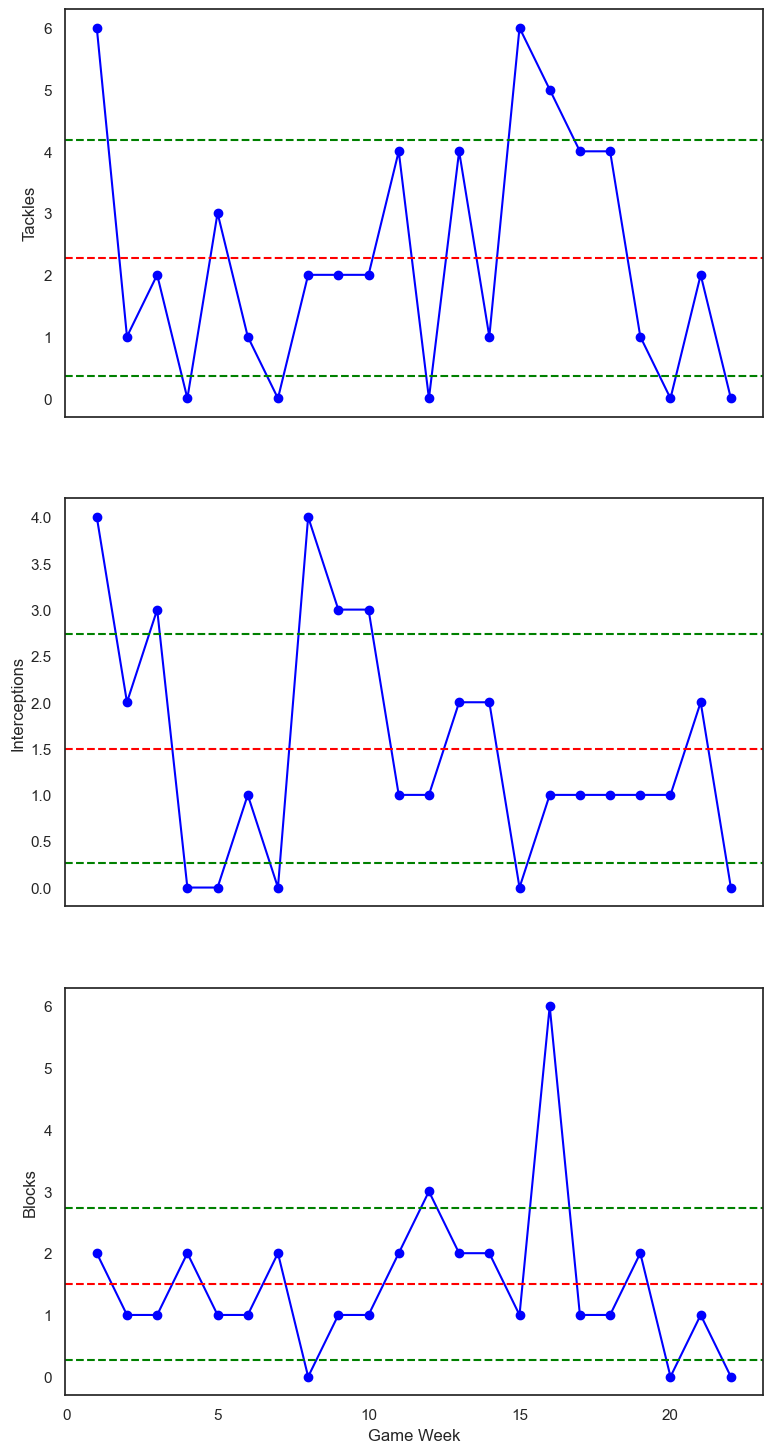

In [63]:
def lineplot_def(df, x_column, y_columns, x_label, savefig_title):
    #get number of subplots of y_columns
    num_subplots = len(y_columns)
    sns.set(style="white")

    fig, axs = plt.subplots(num_subplots, 1, figsize=(9, 6 * num_subplots), sharex=True)
    
    #iterate through each y_column to create subplots
    for i, y_column in enumerate(y_columns):
        x = df[x_column]
        y = df[y_column]
        
        #calculate mean and standard deviation for y values
        mean_value = np.mean(y)
        std_value = np.std(y)
        
        #Plot data points
        axs[i].plot(x, y, marker='o', linestyle='-', color='blue', label=y_column)
        
        #Add lines for mean, mean+std, mean-std
        axs[i].axhline(mean_value, color='red', linestyle='--', label='Mean')
        axs[i].axhline(mean_value + std_value, color='green', linestyle='--', label='Mean + STD')
        axs[i].axhline(mean_value - std_value, color='green', linestyle='--', label='Mean - STD')
        #set the y-axis label for the subplot
        axs[i].set_ylabel(y_column)
    
    plt.xlabel(x_label)
    plt.savefig(f'{savefig_title}.png')
    plt.show()
 


lineplot_def(gw_sort, 'Round', ['Tackles', 'Interceptions', 'Blocks'], 'Game Week', 'hannah_blundell')


From the above plot, hannah blundell made an average of 2-3 tackles  throughout the 2022/2023 season. For games where she made 0 tackles, they dominated those games with ball possession and won comfortably. https://fbref.com/en/matches/953b5a52/Manchester-United-Brighton-and-Hove-Albion-October-16-2022-Womens-Super-League

In [64]:
ona_batlle

Date  Day         Round Venue  Result           Squad  \
0   2022-09-17  Sat   Matchweek 2  Home   W 4–0  Manchester Utd   
1   2022-09-25  Sun   Matchweek 3  Away   W 2–0  Manchester Utd   
2   2022-10-16  Sun   Matchweek 4  Home   W 4–0  Manchester Utd   
3          NaN  NaN           NaN   NaN     NaN             NaN   
4   2022-11-19  Sat   Matchweek 8  Away   W 3–2  Manchester Utd   
5   2022-12-03  Sat   Matchweek 9  Home   W 5–0  Manchester Utd   
6   2022-12-11  Sun  Matchweek 10  Away   D 1–1  Manchester Utd   
7   2023-01-15  Sun  Matchweek 11  Home   W 6–0  Manchester Utd   
8   2023-01-22  Sun  Matchweek 12  Away   W 1–0  Manchester Utd   
9   2023-02-05  Sun  Matchweek 13  Home   D 0–0  Manchester Utd   
10  2023-02-12  Sun   Matchweek 1  Away   W 2–1  Manchester Utd   
11  2023-03-05  Sun  Matchweek 14  Home   W 5–1  Manchester Utd   
12  2023-03-12  Sun  Matchweek 15  Away   L 0–1  Manchester Utd   
13  2023-03-25  Sat  Matchweek 16  Home   W 4–0  Manchester Utd   
14  2023-04-01  Sat  Matchweek 17  Away   W 4–0  Manchester Utd   
15  2023-04-19  Wed  Matchweek 18  Home   W 1–0  Manchester Utd   
16  2023-04-28  Fri  Matchweek 19  Away   W 3–2  Manchester Utd   
17  2023-05-07  Sun  Matchweek 20  Home   W 3–0  Manchester Utd   
18  2023-05-21  Sun  Matchweek 21  Home   W 2–1  Manchester Utd   
19  2023-05-27  Sat  Matchweek 22  Away   W 1–0  Manchester Utd   
20         NaN  NaN           NaN   NaN  16-2-1             NaN   

           Opponent  Start  Pos     Min  Gls  Ast   PK  PKatt    Sh  SoT  \
0           Reading      Y   RB    90.0  0.0  1.0  0.0    0.0   2.0  0.0   
1          West Ham      Y   RB    90.0  0.0  1.0  0.0    0.0   0.0  0.0   
2          Brighton      Y   RB    89.0  0.0  1.0  0.0    0.0   2.0  0.0   
3               NaN    NaN  NaN     NaN  NaN  NaN  NaN    NaN   NaN  NaN   
4           Arsenal      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
5       Aston Villa      Y   RB    90.0  1.0  1.0  0.0    0.0   1.0  1.0   
6   Manchester City      Y   RB    90.0  0.0  0.0  0.0    0.0   1.0  0.0   
7         Liverpool      Y   RB    90.0  0.0  2.0  0.0    0.0   0.0  0.0   
8           Reading      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
9           Everton      Y   RB    90.0  0.0  0.0  0.0    0.0   1.0  0.0   
10        Tottenham      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
11   Leicester City      Y   RB    90.0  0.0  1.0  0.0    0.0   1.0  0.0   
12          Chelsea      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
13         West Ham      Y   RB    90.0  0.0  1.0  0.0    0.0   0.0  0.0   
14         Brighton      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
15          Arsenal      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
16      Aston Villa      Y   RB    90.0  0.0  1.0  0.0    0.0   0.0  0.0   
17        Tottenham      Y   RB    90.0  0.0  0.0  0.0    0.0   1.0  0.0   
18  Manchester City      Y   RB    90.0  0.0  0.0  0.0    0.0   1.0  0.0   
19        Liverpool      Y   RB    90.0  0.0  0.0  0.0    0.0   0.0  0.0   
20              NaN  19/19  NaN  1709.0  1.0  9.0  0.0    0.0  10.0  1.0   

    CrdY  CrdR  Touches   Tkl   Int  Blocks   xG  npxG  xAG   SCA   GCA  \
0    0.0   0.0     94.0   4.0   1.0     1.0  0.1   0.1  0.1   4.0   1.0   
1    0.0   0.0     86.0   2.0   4.0     2.0  0.0   0.0  0.1   4.0   1.0   
2    0.0   0.0     76.0   3.0   0.0     3.0  0.0   0.0  0.2   4.0   1.0   
3    NaN   NaN      NaN   NaN   NaN     NaN  NaN   NaN  NaN   NaN   NaN   
4    0.0   0.0     64.0   1.0   6.0     1.0  0.0   0.0  0.0   1.0   0.0   
5    0.0   0.0     84.0   1.0   1.0     4.0  0.1   0.1  1.1   4.0   0.0   
6    0.0   0.0     62.0   2.0   2.0     0.0  0.0   0.0  0.1   4.0   0.0   
7    0.0   0.0    103.0   2.0   0.0     4.0  0.0   0.0  0.8   8.0   2.0   
8    0.0   0.0     93.0   2.0   2.0     4.0  0.0   0.0  0.2   2.0   0.0   
9    0.0   0.0    106.0   2.0   2.0     2.0  0.0   0.0  0.2   6.0   0.0   
10   0.0   0.0     65.0   1.0   1.0  

In [65]:
#Dropping Irrelevant rows
ona_batlle.drop(index=[3,20], inplace=True)

In [66]:
ona_batlle

Date  Day         Round Venue Result           Squad  \
0   2022-09-17  Sat   Matchweek 2  Home  W 4–0  Manchester Utd   
1   2022-09-25  Sun   Matchweek 3  Away  W 2–0  Manchester Utd   
2   2022-10-16  Sun   Matchweek 4  Home  W 4–0  Manchester Utd   
4   2022-11-19  Sat   Matchweek 8  Away  W 3–2  Manchester Utd   
5   2022-12-03  Sat   Matchweek 9  Home  W 5–0  Manchester Utd   
6   2022-12-11  Sun  Matchweek 10  Away  D 1–1  Manchester Utd   
7   2023-01-15  Sun  Matchweek 11  Home  W 6–0  Manchester Utd   
8   2023-01-22  Sun  Matchweek 12  Away  W 1–0  Manchester Utd   
9   2023-02-05  Sun  Matchweek 13  Home  D 0–0  Manchester Utd   
10  2023-02-12  Sun   Matchweek 1  Away  W 2–1  Manchester Utd   
11  2023-03-05  Sun  Matchweek 14  Home  W 5–1  Manchester Utd   
12  2023-03-12  Sun  Matchweek 15  Away  L 0–1  Manchester Utd   
13  2023-03-25  Sat  Matchweek 16  Home  W 4–0  Manchester Utd   
14  2023-04-01  Sat  Matchweek 17  Away  W 4–0  Manchester Utd   
15  2023-04-19  Wed  Matchweek 18  Home  W 1–0  Manchester Utd   
16  2023-04-28  Fri  Matchweek 19  Away  W 3–2  Manchester Utd   
17  2023-05-07  Sun  Matchweek 20  Home  W 3–0  Manchester Utd   
18  2023-05-21  Sun  Matchweek 21  Home  W 2–1  Manchester Utd   
19  2023-05-27  Sat  Matchweek 22  Away  W 1–0  Manchester Utd   

           Opponent Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  \
0           Reading     Y  RB  90.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   
1          West Ham     Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
2          Brighton     Y  RB  89.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   
4           Arsenal     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   
5       Aston Villa     Y  RB  90.0  1.0  1.0  0.0    0.0  1.0  1.0   0.0   
6   Manchester City     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   
7         Liverpool     Y  RB  90.0  0.0  2.0  0.0    0.0  0.0  0.0   0.0   
8           Reading     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   
9           Everton     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   
10        Tottenham     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   
11   Leicester City     Y  RB  90.0  0.0  1.0  0.0    0.0  1.0  0.0   0.0   
12          Chelsea     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   
13         West Ham     Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
14         Brighton     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   
15          Arsenal     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   1.0   
16      Aston Villa     Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   
17        Tottenham     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   
18  Manchester City     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   
19        Liverpool     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   

    CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  \
0    0.0     94.0  4.0  1.0     1.0  0.1   0.1  0.1  4.0  1.0  64.0  84.0   
1    0.0     86.0  2.0  4.0     2.0  0.0   0.0  0.1  4.0  1.0  57.0  79.0   
2    0.0     76.0  3.0  0.0     3.0  0.0   0.0  0.2  4.0  1.0  52.0  66.0   
4    0.0     64.0  1.0  6.0     1.0  0.0   0.0  0.0  1.0  0.0  42.0  51.0   
5    0.0     84.0  1.0  1.0     4.0  0.1   0.1  1.1  4.0  0.0  59.0  72.0   
6    0.0     62.0  2.0  2.0     0.0  0.0   0.0  0.1  4.0  0.0  38.0  49.0   
7    0.0    103.0  2.0  0.0     4.0  0.0   0.0  0.8  8.0  2.0  74.0  92.0   
8    0.0     93.0  2.0  2.0     4.0  0.0   0.0  0.2  2.0  0.0  62.0  83.0   
9    0.0    106.0  2.0  2.0     2.0  0.0   0.0  0.2  6.0  0.0  71.0  96.0   
10   0.0     65.0  1.0  1.0     1.0  0.0   0.0  0.0  2.0  2.0  45.0  57.0   
11   0.0     81.0  2.0  5.0     1.0  0.0   0.0  0.4  6.0  1.0  63.0  73.0   
12   0.0     92.0  2.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0  63.0  87.0   
13   0.0     77.0  4.0  1.0     1.0  0.0   0.0  0.3  2.0  1.0  56.0  71.0   
14   0.0     70.0  2.0  2.0     2.0  0.0   0.0  0.0  3.0  0.0  36.0  5

In [67]:
#Extract Text from the Round Column
ona_batlle['Round'] = ona_batlle['Round'].str.extract('(\d+)')
ona_batlle.head()

Date  Day Round Venue Result           Squad     Opponent Start Pos  \
0  2022-09-17  Sat     2  Home  W 4–0  Manchester Utd      Reading     Y  RB   
1  2022-09-25  Sun     3  Away  W 2–0  Manchester Utd     West Ham     Y  RB   
2  2022-10-16  Sun     4  Home  W 4–0  Manchester Utd     Brighton     Y  RB   
4  2022-11-19  Sat     8  Away  W 3–2  Manchester Utd      Arsenal     Y  RB   
5  2022-12-03  Sat     9  Home  W 5–0  Manchester Utd  Aston Villa     Y  RB   

    Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0  90.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     94.0  4.0  1.0   
1  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     86.0  2.0  4.0   
2  89.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     76.0  3.0  0.0   
4  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     64.0  1.0  6.0   
5  90.0  1.0  1.0  0.0    0.0  1.0  1.0   0.0   0.0     84.0  1.0  1.0   

   Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  PrgC  \
0     1.0  0.1   0.1  0.1  4.0  1.0  64.0  84.0  76.2   8.0     37.0   8.0   
1     2.0  0.0   0.0  0.1  4.0  1.0  57.0  79.0  72.2   7.0     31.0   7.0   
2     3.0  0.0   0.0  0.2  4.0  1.0  52.0  66.0  78.8   5.0     30.0   1.0   
4     1.0  0.0   0.0  0.0  1.0  0.0  42.0  51.0  82.4   8.0     36.0   3.0   
5     4.0  0.1   0.1  1.1  4.0  0.0  59.0  72.0  81.9  10.0     53.0   2.0   

   Att.1  Succ  Match Report  
0    1.0   0.0  Match Report  
1    6.0   6.0  Match Report  
2    0.0   0.0  Match Report  
4    2.0   1.0  Match Report  
5    2.0   1.0  Match Report

In [68]:
#Convert Round Column to Integer
ona_batlle['Round'] = pd.to_numeric(ona_batlle['Round'])

In [69]:
#Sort Round Column in ascending format
ona_batlle = ona_batlle.sort_values(by = ['Round'])
ona_batlle

Date  Day  Round Venue Result           Squad         Opponent  \
10  2023-02-12  Sun      1  Away  W 2–1  Manchester Utd        Tottenham   
0   2022-09-17  Sat      2  Home  W 4–0  Manchester Utd          Reading   
1   2022-09-25  Sun      3  Away  W 2–0  Manchester Utd         West Ham   
2   2022-10-16  Sun      4  Home  W 4–0  Manchester Utd         Brighton   
4   2022-11-19  Sat      8  Away  W 3–2  Manchester Utd          Arsenal   
5   2022-12-03  Sat      9  Home  W 5–0  Manchester Utd      Aston Villa   
6   2022-12-11  Sun     10  Away  D 1–1  Manchester Utd  Manchester City   
7   2023-01-15  Sun     11  Home  W 6–0  Manchester Utd        Liverpool   
8   2023-01-22  Sun     12  Away  W 1–0  Manchester Utd          Reading   
9   2023-02-05  Sun     13  Home  D 0–0  Manchester Utd          Everton   
11  2023-03-05  Sun     14  Home  W 5–1  Manchester Utd   Leicester City   
12  2023-03-12  Sun     15  Away  L 0–1  Manchester Utd          Chelsea   
13  2023-03-25  Sat     16  Home  W 4–0  Manchester Utd         West Ham   
14  2023-04-01  Sat     17  Away  W 4–0  Manchester Utd         Brighton   
15  2023-04-19  Wed     18  Home  W 1–0  Manchester Utd          Arsenal   
16  2023-04-28  Fri     19  Away  W 3–2  Manchester Utd      Aston Villa   
17  2023-05-07  Sun     20  Home  W 3–0  Manchester Utd        Tottenham   
18  2023-05-21  Sun     21  Home  W 2–1  Manchester Utd  Manchester City   
19  2023-05-27  Sat     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  \
10     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     65.0  1.0   
0      Y  RB  90.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     94.0  4.0   
1      Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     86.0  2.0   
2      Y  RB  89.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     76.0  3.0   
4      Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     64.0  1.0   
5      Y  RB  90.0  1.0  1.0  0.0    0.0  1.0  1.0   0.0   0.0     84.0  1.0   
6      Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0     62.0  2.0   
7      Y  RB  90.0  0.0  2.0  0.0    0.0  0.0  0.0   0.0   0.0    103.0  2.0   
8      Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     93.0  2.0   
9      Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0    106.0  2.0   
11     Y  RB  90.0  0.0  1.0  0.0    0.0  1.0  0.0   0.0   0.0     81.0  2.0   
12     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     92.0  2.0   
13     Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     77.0  4.0   
14     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     70.0  2.0   
15     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   1.0   0.0     70.0  6.0   
16     Y  RB  90.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     62.0  3.0   
17     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0     75.0  2.0   
18     Y  RB  90.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0     75.0  3.0   
19     Y  RB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     85.0  2.0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  \
10  1.0     1.0  0.0   0.0  0.0  2.0  2.0  45.0  57.0  78.9   4.0     23.0   
0   1.0     1.0  0.1   0.1  0.1  4.0  1.0  64.0  84.0  76.2   8.0     37.0   
1   4.0     2.0  0.0   0.0  0.1  4.0  1.0  57.0  79.0  72.2   7.0     31.0   
2   0.0     3.0  0.0   0.0  0.2  4.0  1.0  52.0  66.0  78.8   5.0     30.0   
4   6.0     1.0  0.0   0.0  0.0  1.0  0.0  42.0  51.0  82.4   8.0     36.0   
5   1.0     4.0  0.1   0.1  1.1  4.0  0.0  59.0  72.0  81.9  10.0     53.0   
6   2.0     0.0  0.0   0.0  0.1  4.0  0.0  38.0  49.0  77.6   3.0     18.0   
7   0.0     4.0  0.0   0.0  0.8  8.0  2.0  74.0  92.0  80.4  15.0     70.0   
8   2.0     4.0  0.0   0.0  0.2  2.0  0.0  62.0  83.0  74.7  12.0     44.0   
9   2.0     2.0  0.0   0.0  0.2  6.0  0.0  71.0  96.0  74.0   9.0     57.0   
11  5.0     1.0  0.0   0.0  0.

In [70]:
#Rename Columns
rename_col = {
    'Tkl': 'Tackles',
    'Int': 'Interceptions'
}

ona_batlle.rename(columns=rename_col, inplace=True)

### Plot to show Ona Battle's Defensive Stats

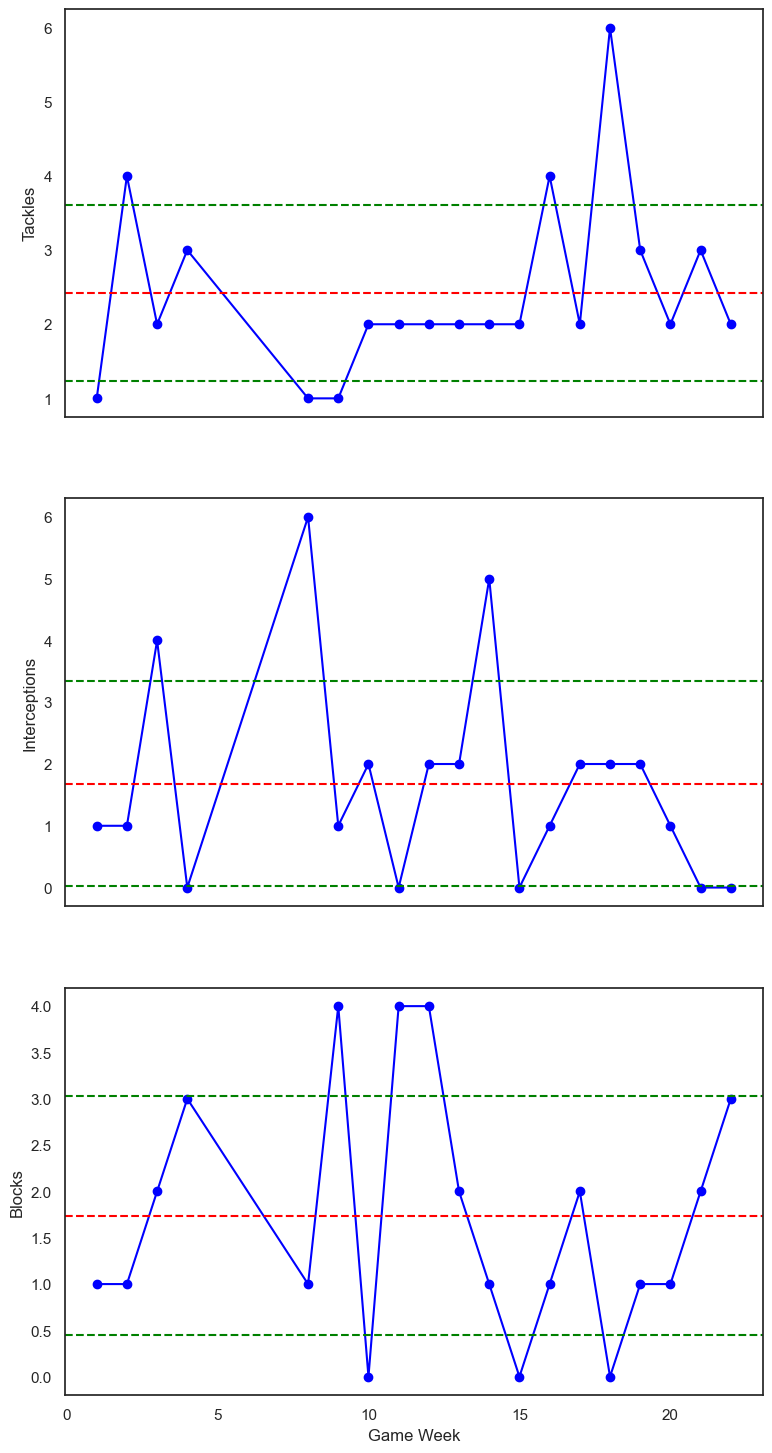

In [71]:
lineplot_def(ona_batlle, 'Round', ['Tackles', 'Interceptions', 'Blocks'], 'Game Week','ona_batlle')

In [72]:
mag_eriksson

Date  Day         Round Venue  Result    Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Away   L 1–2  Chelsea        Liverpool   
1   2022-09-25  Sun   Matchweek 3  Home   W 2–0  Chelsea  Manchester City   
2   2022-09-28  Wed   Matchweek 1  Home   W 3–1  Chelsea         West Ham   
3   2022-10-16  Sun   Matchweek 4  Away   W 3–1  Chelsea          Everton   
4   2022-10-23  Sun   Matchweek 5  Away   W 2–0  Chelsea         Brighton   
5   2022-10-30  Sun   Matchweek 6  Home   W 3–1  Chelsea      Aston Villa   
6   2022-11-06  Sun   Matchweek 7  Away   W 3–1  Chelsea   Manchester Utd   
7   2022-11-20  Sun   Matchweek 8  Home   W 3–0  Chelsea        Tottenham   
8   2022-12-03  Sat   Matchweek 9  Away   W 8–0  Chelsea   Leicester City   
9   2022-12-11  Sun  Matchweek 10  Home   W 3–2  Chelsea          Reading   
10  2023-01-15  Sun  Matchweek 11  Away   D 1–1  Chelsea          Arsenal   
11         NaN  NaN           NaN   NaN     NaN      NaN              NaN   
12  2023-03-08  Wed  Matchweek 14  Home   W 3–1  Chelsea         Brighton   
13  2023-03-12  Sun  Matchweek 15  Home   W 1–0  Chelsea   Manchester Utd   
14  2023-03-26  Sun  Matchweek 16  Away   L 0–2  Chelsea  Manchester City   
15  2023-04-02  Sun  Matchweek 17  Away   W 3–0  Chelsea      Aston Villa   
16  2023-05-03  Wed  Matchweek 12  Home   W 2–1  Chelsea        Liverpool   
17  2023-05-07  Sun  Matchweek 20  Home   W 7–0  Chelsea          Everton   
18  2023-05-10  Wed  Matchweek 18  Home   W 6–0  Chelsea   Leicester City   
19  2023-05-17  Wed  Matchweek 19  Away   W 4–0  Chelsea         West Ham   
20  2023-05-21  Sun  Matchweek 21  Home   W 2–0  Chelsea          Arsenal   
21  2023-05-27  Sat  Matchweek 22  Away   W 3–0  Chelsea          Reading   
22         NaN  NaN           NaN   NaN  17-1-2      NaN              NaN   

    Start                                  Pos  \
0      Y*                                   CB   
1      Y*                                   CB   
2      Y*                                   LB   
3      Y*                                   CB   
4       N                                   CB   
5      Y*                                   LB   
6      Y*                                   CB   
7      Y*                                   CB   
8      Y*                                   CB   
9      Y*                                   CB   
10     Y*                                   LB   
11    NaN                                  NaN   
12      N  On matchday squad, but did not play   
13      N                                   AM   
14     Y*                                   CB   
15     Y*                                   CB   
16     Y*                                   CB   
17     Y*                                   CB   
18     Y*                                   CB   
19     Y*                                   CB   
20     Y*                                   CB   
21     Y*                                   CB   
22  18/20                                  NaN   

                                    Min                                  Gls  \
0                                    90                                    0   
1                                    90                                    0   
2                                    90                                    0   
3                                    90                                    0   
4                                    23                                    0   
5                                    90                                    0   
6                                    90                                    0   
7                                    50                                    0   
8                                    73                                    0   
9                                    90                                    0   
10                                   85                                    0   


In [73]:
#Dropping Irrelevant rows
mag_eriksson.drop(index=[11,12,22], inplace=True)
mag_eriksson

Date  Day         Round Venue Result    Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Away  L 1–2  Chelsea        Liverpool   
1   2022-09-25  Sun   Matchweek 3  Home  W 2–0  Chelsea  Manchester City   
2   2022-09-28  Wed   Matchweek 1  Home  W 3–1  Chelsea         West Ham   
3   2022-10-16  Sun   Matchweek 4  Away  W 3–1  Chelsea          Everton   
4   2022-10-23  Sun   Matchweek 5  Away  W 2–0  Chelsea         Brighton   
5   2022-10-30  Sun   Matchweek 6  Home  W 3–1  Chelsea      Aston Villa   
6   2022-11-06  Sun   Matchweek 7  Away  W 3–1  Chelsea   Manchester Utd   
7   2022-11-20  Sun   Matchweek 8  Home  W 3–0  Chelsea        Tottenham   
8   2022-12-03  Sat   Matchweek 9  Away  W 8–0  Chelsea   Leicester City   
9   2022-12-11  Sun  Matchweek 10  Home  W 3–2  Chelsea          Reading   
10  2023-01-15  Sun  Matchweek 11  Away  D 1–1  Chelsea          Arsenal   
13  2023-03-12  Sun  Matchweek 15  Home  W 1–0  Chelsea   Manchester Utd   
14  2023-03-26  Sun  Matchweek 16  Away  L 0–2  Chelsea  Manchester City   
15  2023-04-02  Sun  Matchweek 17  Away  W 3–0  Chelsea      Aston Villa   
16  2023-05-03  Wed  Matchweek 12  Home  W 2–1  Chelsea        Liverpool   
17  2023-05-07  Sun  Matchweek 20  Home  W 7–0  Chelsea          Everton   
18  2023-05-10  Wed  Matchweek 18  Home  W 6–0  Chelsea   Leicester City   
19  2023-05-17  Wed  Matchweek 19  Away  W 4–0  Chelsea         West Ham   
20  2023-05-21  Sun  Matchweek 21  Home  W 2–0  Chelsea          Arsenal   
21  2023-05-27  Sat  Matchweek 22  Away  W 3–0  Chelsea          Reading   

   Start Pos Min Gls Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  \
0     Y*  CB  90   0   0  0     0  0   0    0    0     107   2   0      0   
1     Y*  CB  90   0   0  0     0  1   0    0    0      65   0   4      1   
2     Y*  LB  90   0   0  0     0  1   0    0    0      79   0   2      0   
3     Y*  CB  90   0   0  0     0  1   1    0    0      62   2   3      1   
4      N  CB  23   0   0  0     0  1   0    0    0      13   0   0      3   
5     Y*  LB  90   0   0  0     0  1   0    0    0      78   1   3      1   
6     Y*  CB  90   0   0  0     0  0   0    0    0      73   1   0      0   
7     Y*  CB  50   0   0  0     0  1   1    0    0      29   0   1      0   
8     Y*  CB  73   0   0  0     0  1   0    0    0      65   2   1      0   
9     Y*  CB  90   0   0  0     0  0   0    0    0      43   2   0      0   
10    Y*  LB  85   0   0  0     0  2   1    0    0      82   0   2      0   
13     N  AM  16   0   0  0     0  0   0    0    0       2   0   0      0   
14    Y*  CB  90   0   0  0     0  0   0    0    0      80   2   0      5   
15    Y*  CB  90   0   0  0     0  0   0    0    0      49   1   3      0   
16    Y*  CB  90   0   0  0     0  0   0    0    0      84   1   1      0   
17    Y*  CB  90   0   0  0     0  0   0    0    0      79   2   0      1   
18    Y*  CB  75   0   0  0     0  0   0    0    0      51   0   0      0   
19    Y*  CB  90   0   0  0     0  3   1    0    0     107   1   0      0   
20    Y*  CB  90   1   0  0     0  1   1    0    0      55   0   1      1   
21    Y*  CB  84   0   0  0     0  1   0    0    0      55   2   0      0   

     xG npxG  xAG SCA GCA Cmp  Att  Cmp% PrgP Carries PrgC Att.1 Succ  \
0   0.0  0.0  0.0   2   0  86  104  82.7    4      71    2     0    0   
1   0.0  0.0  0.0   1   0  36   57  63.2    6      33    2     0    0   
2   0.0  0.0  0.3   2   0  55   73  75.3    6      50    0     0    0   
3   0.0  0.0  0.0   1   0  40   50  80.0    5      29    1     0    0   
4   0.1  0.1  0.0   0   0   5   10  50.0    0       2    0     0    0   
5   0.0  0.0  0.1   3   0  54   69  78.3    6      26    0     0    0   
6   0.0  0.0  0.0   1   0  46   67  68.7    3      33    1     0    0   
7   0.1  0.1  0.0   1   1  25   27  92.6    3       8    2     0    0   
8   0.0  0.0  0.0   2   1  54   60  90.0    5      23    0     0    0   
9   0.0  0.0  0.0   0   0  28   38  73.7    0      12    0     0 

In [74]:
#Extract Text from the Round Column
mag_eriksson['Round'] = mag_eriksson['Round'].str.extract('(\d+)')
mag_eriksson.head()

Date  Day Round Venue Result    Squad         Opponent Start Pos Min  \
0  2022-09-18  Sun     2  Away  L 1–2  Chelsea        Liverpool    Y*  CB  90   
1  2022-09-25  Sun     3  Home  W 2–0  Chelsea  Manchester City    Y*  CB  90   
2  2022-09-28  Wed     1  Home  W 3–1  Chelsea         West Ham    Y*  LB  90   
3  2022-10-16  Sun     4  Away  W 3–1  Chelsea          Everton    Y*  CB  90   
4  2022-10-23  Sun     5  Away  W 2–0  Chelsea         Brighton     N  CB  23   

  Gls Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks   xG npxG  xAG SCA  \
0   0   0  0     0  0   0    0    0     107   2   0      0  0.0  0.0  0.0   2   
1   0   0  0     0  1   0    0    0      65   0   4      1  0.0  0.0  0.0   1   
2   0   0  0     0  1   0    0    0      79   0   2      0  0.0  0.0  0.3   2   
3   0   0  0     0  1   1    0    0      62   2   3      1  0.0  0.0  0.0   1   
4   0   0  0     0  1   0    0    0      13   0   0      3  0.1  0.1  0.0   0   

  GCA Cmp  Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
0   0  86  104  82.7    4      71    2     0    0  Match Report  
1   0  36   57  63.2    6      33    2     0    0  Match Report  
2   0  55   73  75.3    6      50    0     0    0  Match Report  
3   0  40   50  80.0    5      29    1     0    0  Match Report  
4   0   5   10  50.0    0       2    0     0    0  Match Report

In [75]:
#Rename Columns
rename_col = {
    'Tkl': 'Tackles',
    'Int': 'Interceptions'
}

mag_eriksson.rename(columns=rename_col, inplace=True)

In [76]:
#Convert  Columns to Integer
cols = ['Round', 'Tackles', 'Interceptions', 'Blocks']
mag_eriksson[cols] = mag_eriksson[cols].astype(int)

In [77]:
#Sort Round Column in ascending format
mag_eriksson = mag_eriksson.sort_values(by = ['Round'])
mag_eriksson

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2   2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham    Y*  LB   
0   2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool    Y*  CB   
1   2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City    Y*  CB   
3   2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton    Y*  CB   
4   2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  CB   
5   2022-10-30  Sun      6  Home  W 3–1  Chelsea      Aston Villa    Y*  LB   
6   2022-11-06  Sun      7  Away  W 3–1  Chelsea   Manchester Utd    Y*  CB   
7   2022-11-20  Sun      8  Home  W 3–0  Chelsea        Tottenham    Y*  CB   
8   2022-12-03  Sat      9  Away  W 8–0  Chelsea   Leicester City    Y*  CB   
9   2022-12-11  Sun     10  Home  W 3–2  Chelsea          Reading    Y*  CB   
10  2023-01-15  Sun     11  Away  D 1–1  Chelsea          Arsenal    Y*  LB   
16  2023-05-03  Wed     12  Home  W 2–1  Chelsea        Liverpool    Y*  CB   
13  2023-03-12  Sun     15  Home  W 1–0  Chelsea   Manchester Utd     N  AM   
14  2023-03-26  Sun     16  Away  L 0–2  Chelsea  Manchester City    Y*  CB   
15  2023-04-02  Sun     17  Away  W 3–0  Chelsea      Aston Villa    Y*  CB   
18  2023-05-10  Wed     18  Home  W 6–0  Chelsea   Leicester City    Y*  CB   
19  2023-05-17  Wed     19  Away  W 4–0  Chelsea         West Ham    Y*  CB   
17  2023-05-07  Sun     20  Home  W 7–0  Chelsea          Everton    Y*  CB   
20  2023-05-21  Sun     21  Home  W 2–0  Chelsea          Arsenal    Y*  CB   
21  2023-05-27  Sat     22  Away  W 3–0  Chelsea          Reading    Y*  CB   

   Min Gls Ast PK PKatt Sh SoT CrdY CrdR Touches  Tackles  Interceptions  \
2   90   0   0  0     0  1   0    0    0      79        0              2   
0   90   0   0  0     0  0   0    0    0     107        2              0   
1   90   0   0  0     0  1   0    0    0      65        0              4   
3   90   0   0  0     0  1   1    0    0      62        2              3   
4   23   0   0  0     0  1   0    0    0      13        0              0   
5   90   0   0  0     0  1   0    0    0      78        1              3   
6   90   0   0  0     0  0   0    0    0      73        1              0   
7   50   0   0  0     0  1   1    0    0      29        0              1   
8   73   0   0  0     0  1   0    0    0      65        2              1   
9   90   0   0  0     0  0   0    0    0      43        2              0   
10  85   0   0  0     0  2   1    0    0      82        0              2   
16  90   0   0  0     0  0   0    0    0      84        1              1   
13  16   0   0  0     0  0   0    0    0       2        0              0   
14  90   0   0  0     0  0   0    0    0      80        2              0   
15  90   0   0  0     0  0   0    0    0      49        1              3   
18  75   0   0  0     0  0   0    0    0      51        0              0   
19  90   0   0  0     0  3   1    0    0     107        1              0   
17  90   0   0  0     0  0   0    0    0      79        2              0   
20  90   1   0  0     0  1   1    0    0      55        0              1   
21  84   0   0  0     0  1   0    0    0      55        2              0   

    Blocks   xG npxG  xAG SCA GCA Cmp  Att  Cmp% PrgP Carries PrgC Att.1 Succ  \
2        0  0.0  0.0  0.3   2   0  55   73  75.3    6      50    0     0    0   
0        0  0.0  0.0  0.0   2   0  86  104  82.7    4      71    2     0    0   
1        1  0.0  0.0  0.0   1   0  36   57  63.2    6      33    2     0    0   
3        1  0.0  0.0  0.0   1   0  40   50  80.0    5      29    1     0    0   
4        3  0.1  0.1  0.0   0   0   5   10  50.0    0       2    0     0    0   
5        1  0.0  0.0  0.1   3   0  54   69  78.3    6      26    0     0    0   
6        0  0.0  0.0  0.0   1   0  46   67  68.7    3      33    1     0    0   
7        0  0.1  0.1  0.0   1   1  25   27  92.6    3       8    2     0    0   
8        0  0.0  0.0  0.

### Plot to show Mag Eriksson's Defensive Stats

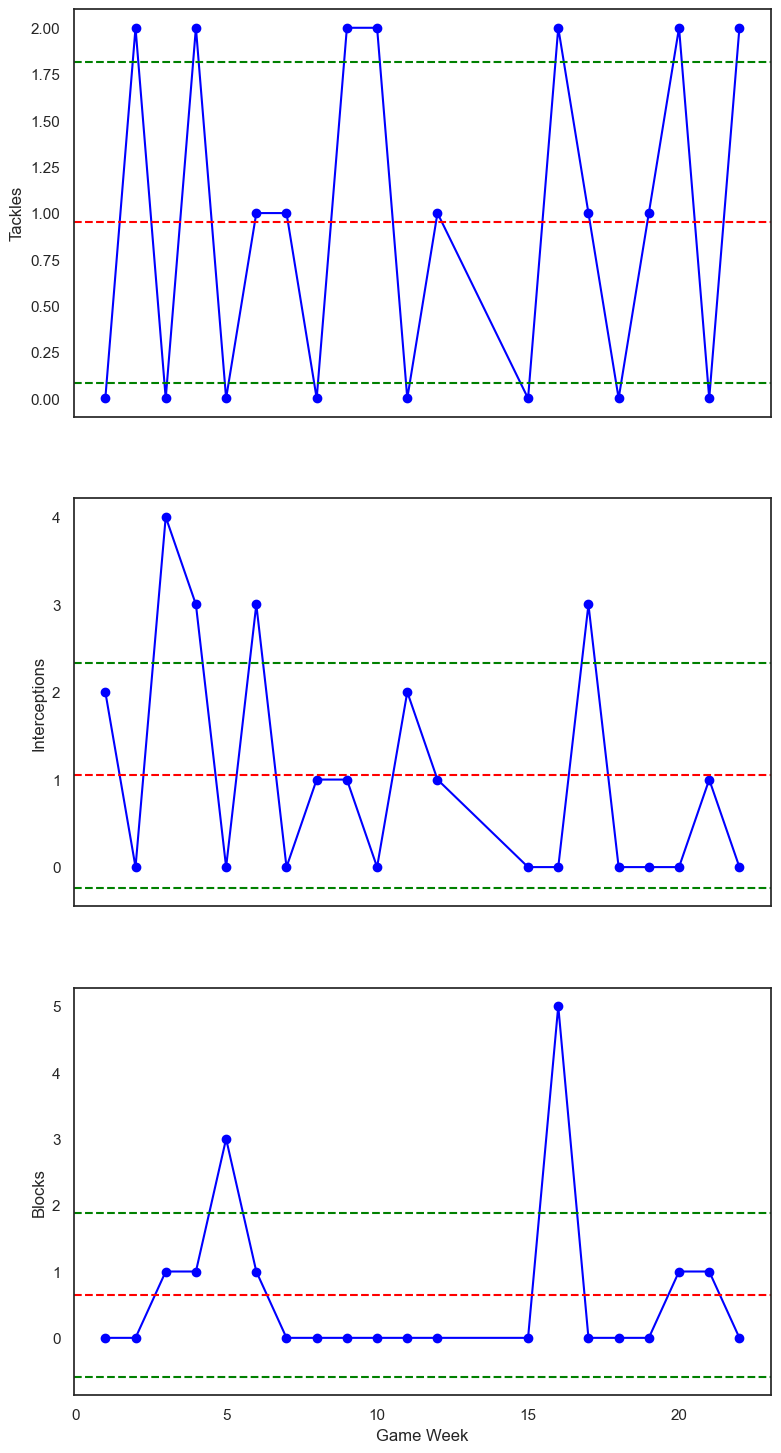

In [78]:
lineplot_def(mag_eriksson, 'Round', ['Tackles', 'Interceptions', 'Blocks'], 'Game Week', 'mag_eriksson')

In [79]:
lotte_Moy

Date  Day         Round Venue  Result    Squad         Opponent  \
0   2022-09-16  Fri   Matchweek 2  Home   W 4–0  Arsenal         Brighton   
1   2022-09-24  Sat   Matchweek 3  Home   W 4–0  Arsenal        Tottenham   
2   2022-10-16  Sun   Matchweek 4  Away   W 1–0  Arsenal          Reading   
3   2022-10-23  Sun   Matchweek 5  Away   W 2–0  Arsenal        Liverpool   
4   2022-10-30  Sun   Matchweek 6  Home   W 3–1  Arsenal         West Ham   
5   2022-11-06  Sun   Matchweek 7  Away   W 4–0  Arsenal   Leicester City   
6   2022-11-19  Sat   Matchweek 8  Home   L 2–3  Arsenal   Manchester Utd   
7   2022-12-03  Sat   Matchweek 9  Home   W 1–0  Arsenal          Everton   
8   2022-12-11  Sun  Matchweek 10  Away   W 4–1  Arsenal      Aston Villa   
9   2023-01-15  Sun  Matchweek 11  Home   D 1–1  Arsenal          Chelsea   
10  2023-02-05  Sun  Matchweek 13  Away   D 0–0  Arsenal         West Ham   
11  2023-02-11  Sat   Matchweek 1  Away   L 1–2  Arsenal  Manchester City   
12  2023-03-08  Wed  Matchweek 14  Home   W 2–0  Arsenal        Liverpool   
13  2023-03-12  Sun  Matchweek 15  Home   W 4–0  Arsenal          Reading   
14  2023-03-25  Sat  Matchweek 16  Away   W 5–1  Arsenal        Tottenham   
15  2023-04-02  Sun  Matchweek 17  Home   W 2–1  Arsenal  Manchester City   
16  2023-04-19  Wed  Matchweek 18  Away   L 0–1  Arsenal   Manchester Utd   
17  2023-05-05  Fri  Matchweek 20  Home   W 1–0  Arsenal   Leicester City   
18  2023-05-10  Wed  Matchweek 12  Away   W 4–0  Arsenal         Brighton   
19  2023-05-17  Wed  Matchweek 19  Away   W 4–1  Arsenal          Everton   
20  2023-05-21  Sun  Matchweek 21  Away   L 0–2  Arsenal          Chelsea   
21  2023-05-27  Sat  Matchweek 22  Home   L 0–2  Arsenal      Aston Villa   
22         NaN  NaN           NaN   NaN  15-1-5      NaN              NaN   

    Start                                  Pos  \
0       N                                   CB   
1       N                                   CB   
2       Y                                   CB   
3       Y                                   CB   
4       Y                                   CB   
5       Y                                   CB   
6       Y                                   CB   
7       Y                                   CB   
8       Y                                   CB   
9       N  On matchday squad, but did not play   
10      Y                                   CB   
11      Y                                   CB   
12      N                                   CB   
13      Y                                   CB   
14      Y                                   CB   
15      Y                                   CB   
16      Y                                   CB   
17      Y                                   CB   
18      Y                                   CB   
19      Y                                   CB   
20      Y                                   CB   
21      Y                                   CB   
22  18/21                                  NaN   

                                    Min                                  Gls  \
0                                     8                                    0   
1                                     4                                    0   
2                                    90                                    0   
3                                    90                                    0   
4                                    90                                    0   
5                                    90                                    0   
6                                    90                                    0   
7                                    90                                    0   
8                                    90                                    0   
9   On matchday squad, but did not play  On matchday squad, but did not play   
10                                   90                                    0   


In [80]:
#Dropping Irrelevant rows
lotte_Moy.drop(index=[9,22], inplace=True)
lotte_Moy.head()

Date  Day        Round Venue Result    Squad   Opponent Start Pos  \
0  2022-09-16  Fri  Matchweek 2  Home  W 4–0  Arsenal   Brighton     N  CB   
1  2022-09-24  Sat  Matchweek 3  Home  W 4–0  Arsenal  Tottenham     N  CB   
2  2022-10-16  Sun  Matchweek 4  Away  W 1–0  Arsenal    Reading     Y  CB   
3  2022-10-23  Sun  Matchweek 5  Away  W 2–0  Arsenal  Liverpool     Y  CB   
4  2022-10-30  Sun  Matchweek 6  Home  W 3–1  Arsenal   West Ham     Y  CB   

  Min Gls Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks   xG npxG  xAG  \
0   8   0   0  0     0  1   0    0    0      24   0   0      0  0.0  0.0  0.0   
1   4   0   0  0     0  0   0    0    0       7   0   0      0  0.0  0.0  0.0   
2  90   0   0  0     0  1   0    0    0      79   1   0      2  0.0  0.0  0.0   
3  90   0   0  0     0  2   0    0    0      83   1   1      1  0.2  0.2  0.0   
4  90   0   0  0     0  0   0    0    0     103   1   4      2  0.0  0.0  0.0   

  SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
0   0   0  22  23  95.7    3      17    0     0    0  Match Report  
1   0   0   5   7  71.4    0       6    0     0    0  Match Report  
2   0   0  55  71  77.5    3      55    2     0    0  Match Report  
3   0   0  64  75  85.3    1      57    0     0    0  Match Report  
4   0   0  80  94  85.1    4      30    0     0    0  Match Report

In [81]:
#Extract Text from the Round Column
lotte_Moy['Round'] = lotte_Moy['Round'].str.extract('(\d+)')
lotte_Moy.head()

Date  Day Round Venue Result    Squad   Opponent Start Pos Min Gls  \
0  2022-09-16  Fri     2  Home  W 4–0  Arsenal   Brighton     N  CB   8   0   
1  2022-09-24  Sat     3  Home  W 4–0  Arsenal  Tottenham     N  CB   4   0   
2  2022-10-16  Sun     4  Away  W 1–0  Arsenal    Reading     Y  CB  90   0   
3  2022-10-23  Sun     5  Away  W 2–0  Arsenal  Liverpool     Y  CB  90   0   
4  2022-10-30  Sun     6  Home  W 3–1  Arsenal   West Ham     Y  CB  90   0   

  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks   xG npxG  xAG SCA GCA  \
0   0  0     0  1   0    0    0      24   0   0      0  0.0  0.0  0.0   0   0   
1   0  0     0  0   0    0    0       7   0   0      0  0.0  0.0  0.0   0   0   
2   0  0     0  1   0    0    0      79   1   0      2  0.0  0.0  0.0   0   0   
3   0  0     0  2   0    0    0      83   1   1      1  0.2  0.2  0.0   0   0   
4   0  0     0  0   0    0    0     103   1   4      2  0.0  0.0  0.0   0   0   

  Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
0  22  23  95.7    3      17    0     0    0  Match Report  
1   5   7  71.4    0       6    0     0    0  Match Report  
2  55  71  77.5    3      55    2     0    0  Match Report  
3  64  75  85.3    1      57    0     0    0  Match Report  
4  80  94  85.1    4      30    0     0    0  Match Report

In [82]:
#Rename Columns
rename_col = {
    'Tkl': 'Tackles',
    'Int': 'Interceptions'
}

lotte_Moy.rename(columns=rename_col, inplace=True)

In [83]:
#Convert Columns to Integer
cols = ['Round', 'Tackles', 'Interceptions', 'Blocks']
lotte_Moy[cols] = lotte_Moy[cols].astype(int)

In [84]:
#Sort Round Column in ascending format
lotte_Moy = lotte_Moy.sort_values(by = ['Round'])
lotte_Moy

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
11  2023-02-11  Sat      1  Away  L 1–2  Arsenal  Manchester City     Y  CB   
0   2022-09-16  Fri      2  Home  W 4–0  Arsenal         Brighton     N  CB   
1   2022-09-24  Sat      3  Home  W 4–0  Arsenal        Tottenham     N  CB   
2   2022-10-16  Sun      4  Away  W 1–0  Arsenal          Reading     Y  CB   
3   2022-10-23  Sun      5  Away  W 2–0  Arsenal        Liverpool     Y  CB   
4   2022-10-30  Sun      6  Home  W 3–1  Arsenal         West Ham     Y  CB   
5   2022-11-06  Sun      7  Away  W 4–0  Arsenal   Leicester City     Y  CB   
6   2022-11-19  Sat      8  Home  L 2–3  Arsenal   Manchester Utd     Y  CB   
7   2022-12-03  Sat      9  Home  W 1–0  Arsenal          Everton     Y  CB   
8   2022-12-11  Sun     10  Away  W 4–1  Arsenal      Aston Villa     Y  CB   
18  2023-05-10  Wed     12  Away  W 4–0  Arsenal         Brighton     Y  CB   
10  2023-02-05  Sun     13  Away  D 0–0  Arsenal         West Ham     Y  CB   
12  2023-03-08  Wed     14  Home  W 2–0  Arsenal        Liverpool     N  CB   
13  2023-03-12  Sun     15  Home  W 4–0  Arsenal          Reading     Y  CB   
14  2023-03-25  Sat     16  Away  W 5–1  Arsenal        Tottenham     Y  CB   
15  2023-04-02  Sun     17  Home  W 2–1  Arsenal  Manchester City     Y  CB   
16  2023-04-19  Wed     18  Away  L 0–1  Arsenal   Manchester Utd     Y  CB   
19  2023-05-17  Wed     19  Away  W 4–1  Arsenal          Everton     Y  CB   
17  2023-05-05  Fri     20  Home  W 1–0  Arsenal   Leicester City     Y  CB   
20  2023-05-21  Sun     21  Away  L 0–2  Arsenal          Chelsea     Y  CB   
21  2023-05-27  Sat     22  Home  L 0–2  Arsenal      Aston Villa     Y  CB   

   Min Gls Ast PK PKatt Sh SoT CrdY CrdR Touches  Tackles  Interceptions  \
11  45   0   0  0     0  0   0    0    0      36        0              0   
0    8   0   0  0     0  1   0    0    0      24        0              0   
1    4   0   0  0     0  0   0    0    0       7        0              0   
2   90   0   0  0     0  1   0    0    0      79        1              0   
3   90   0   0  0     0  2   0    0    0      83        1              1   
4   90   0   0  0     0  0   0    0    0     103        1              4   
5   90   0   1  0     0  0   0    0    0     112        0              0   
6   90   0   0  0     0  1   0    0    0      41        0              1   
7   90   0   0  0     0  1   1    0    0      87        2              1   
8   90   0   0  0     0  1   0    0    0      70        1              1   
18  90   0   0  0     0  0   0    0    0      96        0              1   
10  90   0   0  0     0  0   0    0    0     115        0              1   
12  30   0   0  0     0  1   1    0    0      27        0              1   
13  90   0   0  0     0  2   2    0    0      89        0              0   
14  90   0   0  0     0  3   0    0    0     100        0              2   
15  90   0   0  0     0  0   0    0    0      51        0              0   
16  90   0   0  0     0  0   0    0    0      86        2              2   
19  90   1   0  0     0  1   1    0    0     108        0              3   
17  90   0   0  0     0  0   0    0    0      71        0              2   
20  90   0   0  0     0  0   0    1    0      90        1              4   
21  90   0   0  0     0  1   0    0    0      83        0              1   

    Blocks   xG npxG  xAG SCA GCA  Cmp  Att  Cmp% PrgP Carries PrgC Att.1  \
11       0  0.0  0.0  0.0   0   0   26   33  78.8    0      29    0     0   
0        0  0.0  0.0  0.0   0   0   22   23  95.7    3      17    0     0   
1        0  0.0  0.0  0.0   0   0    5    7  71.4    0       6    0     0   
2        2  0.0  0.0  0.0   0   0   55   71  77.5    3      55    2     0   
3        1  0.2  0.2  0.0   0   0   64   75  85.3    1      57    0     0   
4        2  0.0  0.0  0.0   0   0   80   94  85.1    4      30    0     0   
5        0  0.0  0.0  0.2   1   1  100  111  90.1    5     

### Plot to show Lotte Moy's Defensive Stats

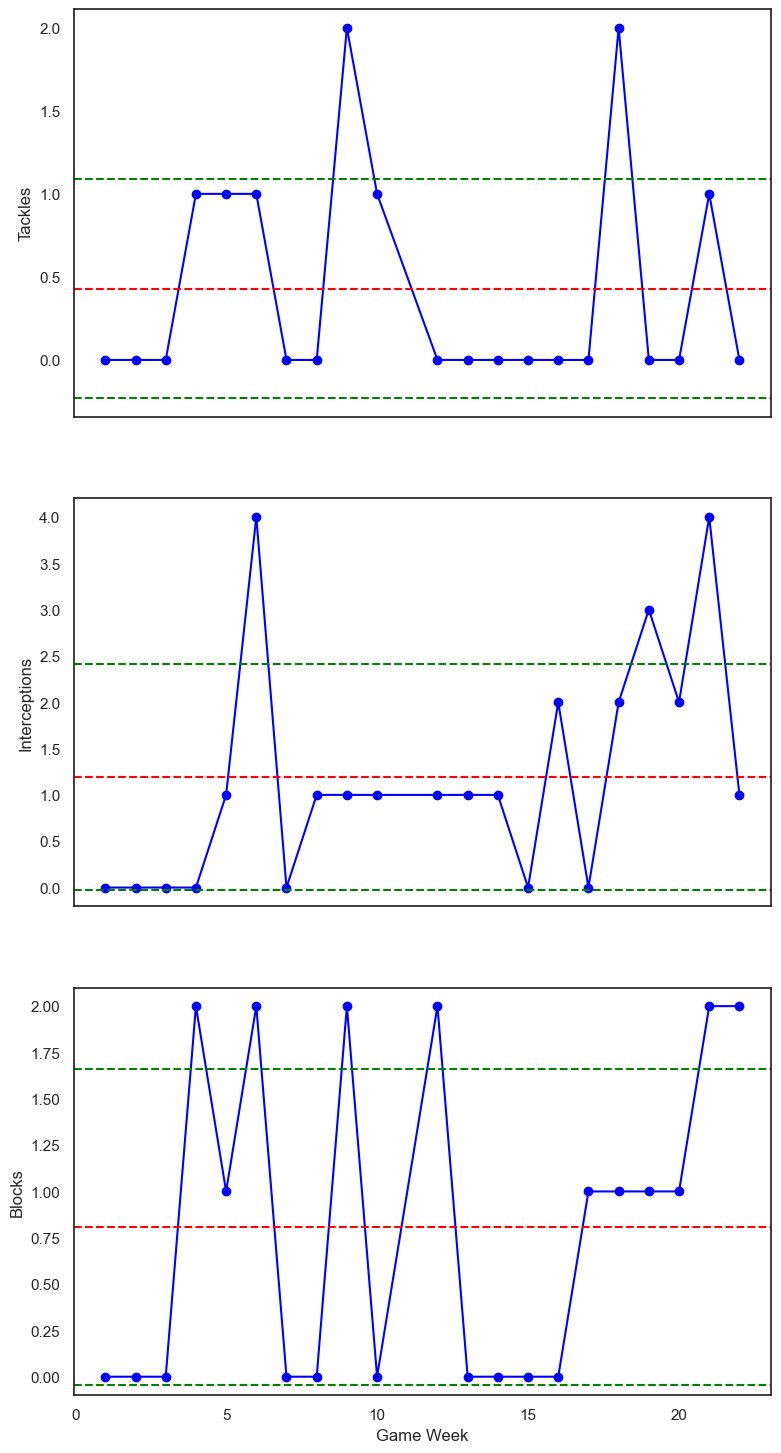

In [85]:
lineplot_def(lotte_Moy, 'Round', ['Tackles', 'Interceptions', 'Blocks'], 'Game Week','lotte_Moy')

In [86]:
laura_w

Date  Day         Round Venue  Result    Squad         Opponent  \
0   2022-09-16  Fri   Matchweek 2  Home   W 4–0  Arsenal         Brighton   
1   2022-09-24  Sat   Matchweek 3  Home   W 4–0  Arsenal        Tottenham   
2   2022-10-16  Sun   Matchweek 4  Away   W 1–0  Arsenal          Reading   
3   2022-10-23  Sun   Matchweek 5  Away   W 2–0  Arsenal        Liverpool   
4   2022-10-30  Sun   Matchweek 6  Home   W 3–1  Arsenal         West Ham   
5   2022-11-06  Sun   Matchweek 7  Away   W 4–0  Arsenal   Leicester City   
6   2022-11-19  Sat   Matchweek 8  Home   L 2–3  Arsenal   Manchester Utd   
7   2022-12-03  Sat   Matchweek 9  Home   W 1–0  Arsenal          Everton   
8   2022-12-11  Sun  Matchweek 10  Away   W 4–1  Arsenal      Aston Villa   
9   2023-01-15  Sun  Matchweek 11  Home   D 1–1  Arsenal          Chelsea   
10  2023-02-05  Sun  Matchweek 13  Away   D 0–0  Arsenal         West Ham   
11  2023-02-11  Sat   Matchweek 1  Away   L 1–2  Arsenal  Manchester City   
12  2023-03-08  Wed  Matchweek 14  Home   W 2–0  Arsenal        Liverpool   
13  2023-03-12  Sun  Matchweek 15  Home   W 4–0  Arsenal          Reading   
14  2023-03-25  Sat  Matchweek 16  Away   W 5–1  Arsenal        Tottenham   
15  2023-04-02  Sun  Matchweek 17  Home   W 2–1  Arsenal  Manchester City   
16  2023-04-19  Wed  Matchweek 18  Away   L 0–1  Arsenal   Manchester Utd   
17         NaN  NaN           NaN   NaN  12-2-3      NaN              NaN   

    Start    Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
0       Y     RB   90    0    0   0      0   1    0     0     0       62    2   
1       Y     RB   90    0    0   0      0   1    0     0     0       73    1   
2       Y     RB   90    0    0   0      0   1    0     0     0       57    2   
3       Y     RB   64    0    0   0      0   1    0     0     0       33    4   
4       N     RB   19    0    0   0      0   0    0     0     0       18    1   
5       Y     RB   66    0    0   0      0   2    1     0     0       42    3   
6       Y     RB   90    1    0   0      0   1    1     0     0       45    3   
7       Y     RB   68    0    0   0      0   1    0     0     0       53    0   
8       N     RB   20    0    0   0      0   0    0     0     0       13    2   
9       Y     RB   90    0    0   0      0   0    0     0     0       41    4   
10      N     RB   23    0    0   0      0   0    0     0     0       21    2   
11      N     RB   10    0    0   0      0   0    0     0     0        9    0   
12      Y     RB   69    0    0   0      0   0    0     0     0       39    2   
13      Y     RB   59    0    0   0      0   1    0     0     0       39    1   
14      N     RB   24    0    0   0      0   0    0     0     0       24    2   
15      N  RB,RW   55    0    0   0      0   0    0     0     0       22    2   
16      Y     RB   45    0    0   0      0   0    0     0     0       25    0   
17  11/17    NaN  972    1    0   0      0   9    2     0     0      616   31   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
0     4       1  0.1   0.1  0.0    3    0   43   53  81.1     5       34   
1     5       1  0.0   0.0  0.0    1    0   43   60  71.7     5       26   
2     0       0  0.3   0.3  0.0    1    0   45   53  84.9     5       34   
3     2       1  0.1   0.1  0.0    0    0   23   27  85.2     1       19   
4     1       1  0.0   0.0  0.0    1    0   12   14  85.7     2        5   
5     1       1  0.0   0.0  0.0    1    1   32   36  88.9     2       28   
6     1       1  0.4   0.4  0.0    1    0   24   34  70.6     3       12   
7     0       1  0.1   0.1  0.0    2    1   38   49  77.6     5       18   
8     2       1  0.0   0.0  0.0    0    0    5    7  71.4     0        4   
9     3       3  0.0   0.0  0.0    0    0   18   28  64.3     3        5   
10    0       0  0.0   0.0  0.0    0    0   18   21  85.7     2       12   
11    0       0  0.0   0.0  0.0    0    0    4    6  66.7     1        3   
12    1       1  0

In [87]:
#Dropping Irrelevant rows
laura_w.drop(index=[17], inplace=True)
laura_w.tail()

Date  Day         Round Venue Result    Squad         Opponent  \
12  2023-03-08  Wed  Matchweek 14  Home  W 2–0  Arsenal        Liverpool   
13  2023-03-12  Sun  Matchweek 15  Home  W 4–0  Arsenal          Reading   
14  2023-03-25  Sat  Matchweek 16  Away  W 5–1  Arsenal        Tottenham   
15  2023-04-02  Sun  Matchweek 17  Home  W 2–1  Arsenal  Manchester City   
16  2023-04-19  Wed  Matchweek 18  Away  L 0–1  Arsenal   Manchester Utd   

   Start    Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
12     Y     RB   69    0    0   0      0   0    0     0     0       39    2   
13     Y     RB   59    0    0   0      0   1    0     0     0       39    1   
14     N     RB   24    0    0   0      0   0    0     0     0       24    2   
15     N  RB,RW   55    0    0   0      0   0    0     0     0       22    2   
16     Y     RB   45    0    0   0      0   0    0     0     0       25    0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
12    1       1  0.0   0.0  0.2    1    0   28   32  87.5     7       14   
13    1       0  0.1   0.1  0.1    5    0   27   36  75.0     1       10   
14    0       0  0.0   0.0  0.0    1    0   16   20  80.0     0       13   
15    0       0  0.0   0.0  0.0    0    0    9   13  69.2     2        6   
16    1       0  0.0   0.0  0.0    0    0   20   25  80.0     1        8   

    PrgC  Att.1  Succ  Match Report  
12     0      0     0  Match Report  
13     2      0     0  Match Report  
14     0      0     0  Match Report  
15     2      0     0  Match Report  
16     0      1     1  Match Report

In [88]:
#Extract Text from the Round Column
laura_w['Round'] = laura_w['Round'].str.extract('(\d+)')
laura_w.head()

Date  Day Round Venue Result    Squad   Opponent Start Pos  Min  Gls  \
0  2022-09-16  Fri     2  Home  W 4–0  Arsenal   Brighton     Y  RB   90    0   
1  2022-09-24  Sat     3  Home  W 4–0  Arsenal  Tottenham     Y  RB   90    0   
2  2022-10-16  Sun     4  Away  W 1–0  Arsenal    Reading     Y  RB   90    0   
3  2022-10-23  Sun     5  Away  W 2–0  Arsenal  Liverpool     Y  RB   64    0   
4  2022-10-30  Sun     6  Home  W 3–1  Arsenal   West Ham     N  RB   19    0   

   Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  Blocks   xG  npxG  \
0    0   0      0   1    0     0     0       62    2    4       1  0.1   0.1   
1    0   0      0   1    0     0     0       73    1    5       1  0.0   0.0   
2    0   0      0   1    0     0     0       57    2    0       0  0.3   0.3   
3    0   0      0   1    0     0     0       33    4    2       1  0.1   0.1   
4    0   0      0   0    0     0     0       18    1    1       1  0.0   0.0   

   xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  Att.1  Succ  \
0  0.0    3    0   43   53  81.1     5       34     2      2     1   
1  0.0    1    0   43   60  71.7     5       26     1      2     0   
2  0.0    1    0   45   53  84.9     5       34     1      1     1   
3  0.0    0    0   23   27  85.2     1       19     1      0     0   
4  0.0    1    0   12   14  85.7     2        5     0      0     0   

   Match Report  
0  Match Report  
1  Match Report  
2  Match Report  
3  Match Report  
4  Match Report

In [89]:
#Convert Columns to Integer
cols = ['Round', 'Tkl']
laura_w[cols] = laura_w[cols].astype(int)

In [90]:
#Sort Round Column in ascending format
laura_w = laura_w.sort_values(by = ['Round'])
laura_w.head()

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
11  2023-02-11  Sat      1  Away  L 1–2  Arsenal  Manchester City     N  RB   
0   2022-09-16  Fri      2  Home  W 4–0  Arsenal         Brighton     Y  RB   
1   2022-09-24  Sat      3  Home  W 4–0  Arsenal        Tottenham     Y  RB   
2   2022-10-16  Sun      4  Away  W 1–0  Arsenal          Reading     Y  RB   
3   2022-10-23  Sun      5  Away  W 2–0  Arsenal        Liverpool     Y  RB   

    Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  Blocks  \
11   10    0    0   0      0   0    0     0     0        9    0    0       0   
0    90    0    0   0      0   1    0     0     0       62    2    4       1   
1    90    0    0   0      0   1    0     0     0       73    1    5       1   
2    90    0    0   0      0   1    0     0     0       57    2    0       0   
3    64    0    0   0      0   1    0     0     0       33    4    2       1   

     xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  Att.1  \
11  0.0   0.0  0.0    0    0    4    6  66.7     1        3     0      0   
0   0.1   0.1  0.0    3    0   43   53  81.1     5       34     2      2   
1   0.0   0.0  0.0    1    0   43   60  71.7     5       26     1      2   
2   0.3   0.3  0.0    1    0   45   53  84.9     5       34     1      1   
3   0.1   0.1  0.0    0    0   23   27  85.2     1       19     1      0   

    Succ  Match Report  
11     0  Match Report  
0      1  Match Report  
1      0  Match Report  
2      1  Match Report  
3      0  Match Report

In [91]:
#Rename Columns
rename_col = {
    'Tkl': 'Tackles',
    'Int': 'Interceptions'
}

laura_w.rename(columns=rename_col, inplace=True)

### Plot to show Laura Wienroither's Defensive Stats

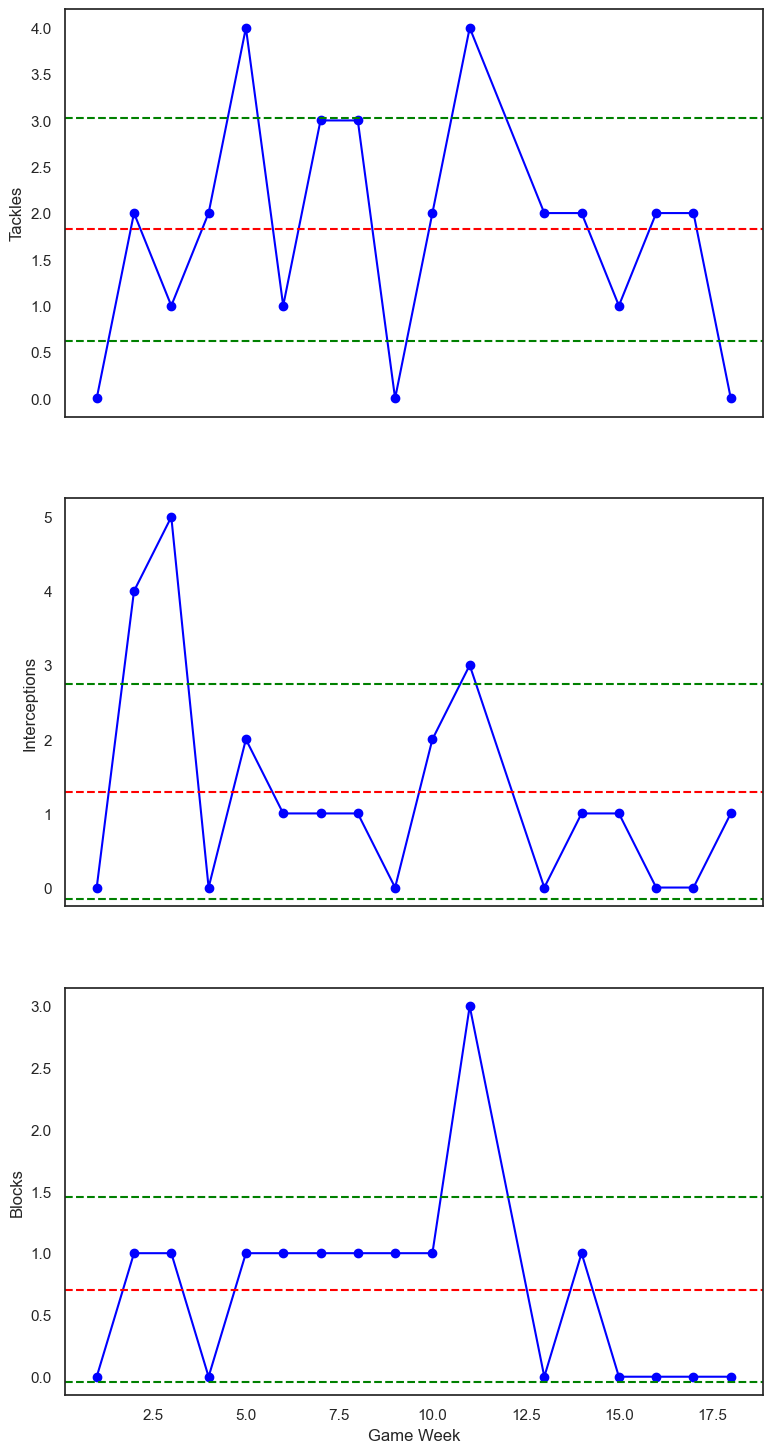

In [92]:
lineplot_def(laura_w, 'Round', ['Tackles', 'Interceptions', 'Blocks'], 'Game Week', 'laura_w')

## Midfielders

In [93]:
df_player.head()

full_name  age     season    position             Current Club  \
0  Abbey-Leigh Stringer   28  2022/2023  Midfielder    West Ham United Women   
1         Abbie McManus   30  2022/2023    Defender       Leicester City WFC   
2          Adriana Leon   31  2022/2023     Forward  Manchester United Women   
3    Agnes Beever-Jones   20  2022/2023     Forward            Everton Women   
4         Aileen Whelan   32  2022/2023     Forward       Leicester City WFC   

   minutes_played_overall  minutes_played_home  minutes_played_away  \
0                     802                  398                  404   
1                     152                   62                   90   
2                      76                   66                   10   
3                     757                  359                  398   
4                    1929                  990                  939   

  nationality  appearances_overall  appearances_home  appearances_away  \
0     England                   11                 6                 5   
1     England                    2                 1                 1   
2      Canada                    5                 4                 1   
3     England                   16                 8                 8   
4     England                   22                11                11   

   goals_overall  goals_home  goals_away  assists_overall  assists_home  \
0              0           0           0                0             0   
1              0           0           0                0             0   
2              1           1           0                0             0   
3              2           2           0                0             0   
4              1           1           0                1             1   

   assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
0             0              0               0                     3   
1             0              0               0                     0   
2             0              0               0                     4   
3             0              0               0                     5   
4             0              0               0                     5   

   clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
0                  2                  1                21             10   
1                  0                  0                 5              4   
2                  3                  1                 0              0   
3                  1                  4                13             10   
4                  3                  2                43             22   

   conceded_away  yellow_cards_overall  red_cards_overall  \
0             11                     4                  0   
1              1                     0                  0   
2              0                     0                  0   
3              3                     4                  1   
4             21                     1                  0   

   hattricks_total_overall  two_goals_in_a_game_total_overall  \
0                        0                                  0   
1                        0                                  0   
2                        0                                  0   
3                        0                                  0   
4                        0                                  0   

   saves_total_overall  PSxG  PSxG/SoT  xSaves_total_overall  SoTA  
0                    0   0.0       0.0                   0.0     0  
1                    0   0.0       0.0                   0.0     0  
2                    0   0.0       0.0                   0.0     0  
3                    0   0.0       0.0                   0.0     0  
4                    0   0.0       0.0                   0.0     0

In [94]:
#Filtering by Position of Midfielder for the 2022/2023 Season
df_midfielder = df_player[(df_player['position'] == 'Midfielder') & (df_player['season'] == '2022/2023')]
df_midfielder

full_name  age     season    position  \
0    Abbey-Leigh Stringer   28  2022/2023  Midfielder   
6       Aïssatou Tounkara   28  2022/2023  Midfielder   
8           Alessia Russo   24  2022/2023  Midfielder   
12         Alsu Abdullina   22  2022/2023  Midfielder   
15           Amber Tysiak   23  2022/2023  Midfielder   
..                    ...  ...        ...         ...   
270    Susan Woodham Lily   23  2022/2023  Midfielder   
271          Taylor Hinds   24  2022/2023  Midfielder   
278        Vilde Bøe Risa   28  2022/2023  Midfielder   
282           Yee-Un Park   27  2022/2023  Midfielder   
283          Yui Hasegawa   26  2022/2023  Midfielder   

                     Current Club  minutes_played_overall  \
0           West Ham United Women                     802   
6         Manchester United Women                       4   
8         Manchester United Women                    1561   
12                  Chelsea Women                     115   
15          West Ham United Women                     226   
..                            ...                     ...   
270                 Reading Women                    1289   
271               Liverpool Women                    1872   
278       Manchester United Women                     361   
282  Brighton & Hove Albion Women                      34   
283         Manchester City Women                    1785   

     minutes_played_home  minutes_played_away  nationality  \
0                    398                  404      England   
6                      0                    4       France   
8                    783                  778      England   
12                    82                   33       Russia   
15                   145                   81      Belgium   
..                   ...                  ...          ...   
270                  671                  618        Wales   
271                  940                  932      England   
278                  185                  176       Norway   
282                   15                   19  South Korea   
283                  976                  809        Japan   

     appearances_overall  appearances_home  appearances_away  goals_overall  \
0                     11                 6                 5              0   
6                      1                 0                 1              0   
8                     20                10                10             10   
12                     6                 3                 3              0   
15                     4                 2                 2              0   
..                   ...               ...               ...            ...   
270                   16                 8                 8              0   
271                   22                11                11              0   
278                   12                 7                 5              0   
282                    4                 2                 2              0   
283                   20                11                 9              1   

     goals_home  goals_away  assists_overall  assists_home  assists_away  \
0             0           0                0             0             0   
6             0           0                0             0             0   
8             9           1                1             1             0   
12            0           0                1             0             1   
15            0           0                0             0             0   
..          ...         ...              ...           ...           ...   
270           0           0                1             1             0   
271           0           0                2             0             2   
278           0           0                1             1             0   
282           0           0                0             0             0   
283           1           0                1             0          

In [95]:
#Sort by Overall Assists
sorted_mid = df_midfielder.sort_values(by='assists_overall', ascending=False)
top_five_mid = sorted_mid.head(5)
top_five_mid

full_name  age     season    position             Current Club  \
102          Guro Reiten   29  2022/2023  Midfielder            Chelsea Women   
150           Kenza Dali   32  2022/2023  Midfielder       Aston Villa Ladies   
145          Katie Zelem   27  2022/2023  Midfielder  Manchester United Women   
154  Khadija Monifa Shaw   26  2022/2023  Midfielder    Manchester City Women   
49        Courtney Nevin   21  2022/2023  Midfielder       Leicester City WFC   

     minutes_played_overall  minutes_played_home  minutes_played_away  \
102                    1470                  690                  780   
150                    1812                  940                  872   
145                    1890                  900                  990   
154                    1905                  961                  944   
49                     1071                  441                  630   

    nationality  appearances_overall  appearances_home  appearances_away  \
102      Norway                   21                10                11   
150      France                   21                11                10   
145     England                   21                10                11   
154     Jamaica                   22                11                11   
49    Australia                   12                 5                 7   

     goals_overall  goals_home  goals_away  assists_overall  assists_home  \
102              9           5           4               11             5   
150              5           4           1                8             2   
145              3           3           0                8             2   
154             20          10          10                7             4   
49               0           0           0                4             3   

     assists_away  penalty_goals  penalty_misses  clean_sheets_overall  \
102             6              2               0                    10   
150             6              0               0                     5   
145             6              2               1                    13   
154             3              1               0                     6   
49              1              0               0                     4   

     clean_sheets_home  clean_sheets_away  conceded_overall  conceded_home  \
102                  5                  5                10              3   
150                  1                  4                34             20   
145                  7                  6                11              4   
154                  2                  4                20              8   
49                   2                  2                22              5   

     conceded_away  yellow_cards_overall  red_cards_overall  \
102              7                     0                  0   
150             14                     0                  0   
145              7                     7                  0   
154             12                     0                  0   
49              17                     1                  0   

     hattricks_total_overall  two_goals_in_a_game_total_overall  \
102                        0                                  0   
150                        0                                  0   
145                        0                                  0   
154                        1                                  5   
49                         0                                  0   

     saves_total_overall  PSxG  PSxG/SoT  xSaves_total_overall  SoTA  
102                    0   0.0       0.0                   0.0     0  
150                    0   0.0       0.0                   0.0     0  
145                    0   0.0       0.0                   0.0     0  
154                    0   0.0       0.0                   0.0     0  
49                     0   0.0       0.0                   0.0     0

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Guro Reiten'),
  Text(1, 0, 'Kenza Dali'),
  Text(2, 0, 'Katie Zelem'),
  Text(3, 0, 'Khadija Monifa Shaw'),
  Text(4, 0, 'Courtney Nevin')])

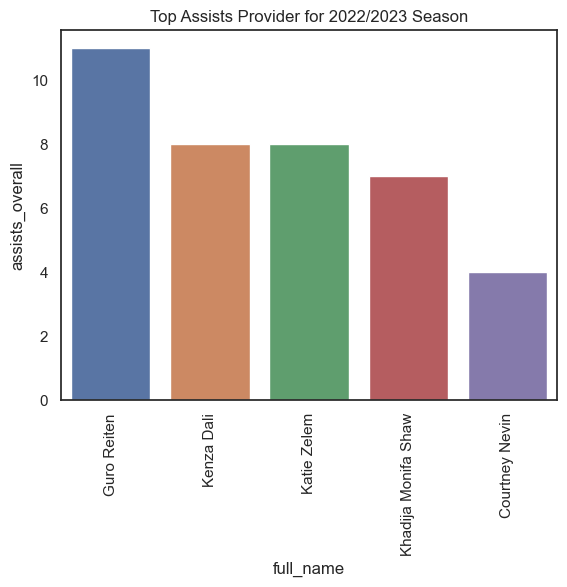

In [96]:
#Plot to show the top assists provider
sns.barplot(data=top_five_mid, x="full_name", y="assists_overall")
plt.title("Top Assists Provider for 2022/2023 Season")
plt.savefig("Top_Assists.png")
plt.xticks(rotation=90)

### Scrape Match data for the Top Midfielders

In [103]:
def mid_data(url):
    #Path for ChromeDriver
    driver_path = '/Users/waleibitoye/Downloads/chromedriver-mac-x64/chromedriver'  

    #Create ChromeOptions object to use Chrome Browser
    chrome_options = webdriver.ChromeOptions()
    #To run the command in headless mode i.e. without an interface
    chrome_options.add_argument("--headless")

    chrome_options.add_argument(f'--chromedriver={driver_path}')
    
    #Initialize ChromeDriver Instance
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    #Wait time set to 5secs to allow elements on the webpage to fully load
    driver.implicitly_wait(5)
    
    #get page source of the webpage
    page_source = driver.page_source

    #use pandas to read tables on the webpage
    df_def_stats = pd.read_html(page_source, header=1)[0]
    
    #close browser session
    driver.quit()

    return df_def_stats

urls = [
    'https://fbref.com/en/players/3d728957/matchlogs/2022-2023/c189/Guro-Reiten-Match-Logs',
    'https://fbref.com/en/players/1cb43c5f/matchlogs/2022-2023/c189/Kenza-Dali-Match-Logs',
    'https://fbref.com/en/players/213a7877/matchlogs/2022-2023/c189/Katie-Zelem-Match-Logs',
    'https://fbref.com/en/players/915083f0/matchlogs/2022-2023/c189/Khadija-Shaw-Match-Logs',
    'https://fbref.com/en/players/0fbbe2fe/matchlogs/2022-2023/c189/Courtney-Nevin-Match-Logs'
    
]

dataframes = {}

for url in urls:
    player_name = url.split('/')[-1].replace('-Match-Logs', '') 
    dataframes[player_name] = mid_data(url)

guro_reiten = dataframes['Guro-Reiten']
kenza_dali = dataframes['Kenza-Dali']
katie_zelem = dataframes['Katie-Zelem']
khadija_shaw = dataframes['Khadija-Shaw']
courtney_nevin = dataframes['Courtney-Nevin']

In [104]:
guro_reiten

Date  Day         Round Venue  Result    Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Away   L 1–2  Chelsea        Liverpool   
1   2022-09-25  Sun   Matchweek 3  Home   W 2–0  Chelsea  Manchester City   
2   2022-09-28  Wed   Matchweek 1  Home   W 3–1  Chelsea         West Ham   
3   2022-10-16  Sun   Matchweek 4  Away   W 3–1  Chelsea          Everton   
4   2022-10-23  Sun   Matchweek 5  Away   W 2–0  Chelsea         Brighton   
5   2022-10-30  Sun   Matchweek 6  Home   W 3–1  Chelsea      Aston Villa   
6   2022-11-06  Sun   Matchweek 7  Away   W 3–1  Chelsea   Manchester Utd   
7   2022-11-20  Sun   Matchweek 8  Home   W 3–0  Chelsea        Tottenham   
8   2022-12-03  Sat   Matchweek 9  Away   W 8–0  Chelsea   Leicester City   
9   2022-12-11  Sun  Matchweek 10  Home   W 3–2  Chelsea          Reading   
10  2023-01-15  Sun  Matchweek 11  Away   D 1–1  Chelsea          Arsenal   
11  2023-02-05  Sun  Matchweek 13  Away   W 3–2  Chelsea        Tottenham   
12  2023-03-08  Wed  Matchweek 14  Home   W 3–1  Chelsea         Brighton   
13         NaN  NaN           NaN   NaN     NaN      NaN              NaN   
14  2023-03-26  Sun  Matchweek 16  Away   L 0–2  Chelsea  Manchester City   
15  2023-04-02  Sun  Matchweek 17  Away   W 3–0  Chelsea      Aston Villa   
16  2023-05-03  Wed  Matchweek 12  Home   W 2–1  Chelsea        Liverpool   
17  2023-05-07  Sun  Matchweek 20  Home   W 7–0  Chelsea          Everton   
18  2023-05-10  Wed  Matchweek 18  Home   W 6–0  Chelsea   Leicester City   
19  2023-05-17  Wed  Matchweek 19  Away   W 4–0  Chelsea         West Ham   
20  2023-05-21  Sun  Matchweek 21  Home   W 2–0  Chelsea          Arsenal   
21  2023-05-27  Sat  Matchweek 22  Away   W 3–0  Chelsea          Reading   
22         NaN  NaN           NaN   NaN  18-1-2      NaN              NaN   

    Start    Pos     Min  Gls   Ast   PK  PKatt    Sh   SoT  CrdY  CrdR  \
0       Y     AM    69.0  0.0   0.0  0.0    0.0   2.0   2.0   0.0   0.0   
1       Y     AM    86.0  0.0   1.0  0.0    0.0   0.0   0.0   0.0   0.0   
2       Y     LW    71.0  0.0   1.0  0.0    0.0   2.0   0.0   0.0   0.0   
3       Y     WB    76.0  0.0   1.0  0.0    0.0   1.0   1.0   0.0   0.0   
4       N     LM    24.0  0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
5       Y     LM    76.0  0.0   1.0  0.0    0.0   2.0   1.0   0.0   0.0   
6       Y     LM    82.0  0.0   0.0  0.0    0.0   1.0   0.0   0.0   0.0   
7       Y     LM    76.0  1.0   1.0  1.0    1.0   2.0   1.0   0.0   0.0   
8       Y  LW,RW    74.0  1.0   4.0  0.0    0.0   2.0   2.0   0.0   0.0   
9       N  FW,WB    10.0  0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
10      Y     LW    90.0  0.0   0.0  0.0    0.0   1.0   0.0   0.0   0.0   
11      Y     LW    79.0  1.0   0.0  0.0    0.0   1.0   1.0   0.0   0.0   
12      Y     LM    75.0  1.0   0.0  1.0    1.0   1.0   0.0   0.0   0.0   
13    NaN    NaN     NaN  NaN   NaN  NaN    NaN   NaN   NaN   NaN   NaN   
14      Y     LW    90.0  0.0   0.0  0.0    0.0   1.0   0.0   0.0   0.0   
15      Y     LW    80.0  1.0   0.0  0.0    0.0   4.0   2.0   0.0   0.0   
16      Y  LW,LM    90.0  0.0   0.0  0.0    0.0   1.0   1.0   0.0   0.0   
17      Y     LW    45.0  1.0   1.0  0.0    0.0   1.0   1.0   0.0   0.0   
18      Y     LW    65.0  1.0   0.0  0.0    0.0   3.0   2.0   0.0   0.0   
19      N     LW    22.0  0.0   0.0  0.0    0.0   1.0   0.0   0.0   0.0   
20      Y     LW    90.0  1.0   0.0  0.0    0.0   3.0   1.0   0.0   0.0   
21      Y     LW    90.0  1.0   1.0  0.0    0.0   2.0   1.0   0.0   0.0   
22  18/21    NaN  1460.0  9.0  11.0  2.0    2.0  31.0  16.0   0.0   0.0   

    Touches   Tkl   Int  Blocks   xG  npxG  xAG   SCA   GCA    Cmp    Att  \
0      26.0   0.0   0.0     1.0  0.1   0.1  0.0   4.0   2.0   13.0   22.0   
1      39.0   2.0   3.0     0.0  0.0   0.0  0.2   4.0   1.0   24.0   35.0   
2      25.0   0.0   0.0     3.0  0.1   0.1  0.3   3.0   1.0    9.0   18.0   
3      47.0   1.0   0.0     0.0  0.0   0.0  0.3  10.

In [105]:
#Dropping Irrelevant rows
guro_reiten.drop(index=[13,22], inplace=True)
guro_reiten.head()

Date  Day        Round Venue Result    Squad         Opponent Start  \
0  2022-09-18  Sun  Matchweek 2  Away  L 1–2  Chelsea        Liverpool     Y   
1  2022-09-25  Sun  Matchweek 3  Home  W 2–0  Chelsea  Manchester City     Y   
2  2022-09-28  Wed  Matchweek 1  Home  W 3–1  Chelsea         West Ham     Y   
3  2022-10-16  Sun  Matchweek 4  Away  W 3–1  Chelsea          Everton     Y   
4  2022-10-23  Sun  Matchweek 5  Away  W 2–0  Chelsea         Brighton     N   

  Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0  AM  69.0  0.0  0.0  0.0    0.0  2.0  2.0   0.0   0.0     26.0  0.0  0.0   
1  AM  86.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     39.0  2.0  3.0   
2  LW  71.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     25.0  0.0  0.0   
3  WB  76.0  0.0  1.0  0.0    0.0  1.0  1.0   0.0   0.0     47.0  1.0  0.0   
4  LM  24.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0      8.0  0.0  1.0   

   Blocks   xG  npxG  xAG   SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  PrgC  \
0     1.0  0.1   0.1  0.0   4.0  2.0  13.0  22.0  59.1   1.0     12.0   1.0   
1     0.0  0.0   0.0  0.2   4.0  1.0  24.0  35.0  68.6   6.0     25.0   3.0   
2     3.0  0.1   0.1  0.3   3.0  1.0   9.0  18.0  50.0   1.0     18.0   0.0   
3     0.0  0.0   0.0  0.3  10.0  3.0  26.0  42.0  61.9   8.0     30.0   5.0   
4     0.0  0.0   0.0  0.0   0.0  0.0   1.0   7.0  14.3   0.0      4.0   1.0   

   Att.1  Succ  Match Report  
0    0.0   0.0  Match Report  
1    1.0   0.0  Match Report  
2    0.0   0.0  Match Report  
3    4.0   2.0  Match Report  
4    1.0   1.0  Match Report

In [106]:
guro_reiten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 21
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          21 non-null     object 
 1   Day           21 non-null     object 
 2   Round         21 non-null     object 
 3   Venue         21 non-null     object 
 4   Result        21 non-null     object 
 5   Squad         21 non-null     object 
 6   Opponent      21 non-null     object 
 7   Start         21 non-null     object 
 8   Pos           21 non-null     object 
 9   Min           21 non-null     float64
 10  Gls           21 non-null     float64
 11  Ast           21 non-null     float64
 12  PK            21 non-null     float64
 13  PKatt         21 non-null     float64
 14  Sh            21 non-null     float64
 15  SoT           21 non-null     float64
 16  CrdY          21 non-null     float64
 17  CrdR          21 non-null     float64
 18  Touches       21 non-null     fl

In [107]:
#Extract Text from the Round Column
guro_reiten['Round'] = guro_reiten['Round'].str.extract('(\d+)')
guro_reiten.head()

Date  Day Round Venue Result    Squad         Opponent Start Pos  \
0  2022-09-18  Sun     2  Away  L 1–2  Chelsea        Liverpool     Y  AM   
1  2022-09-25  Sun     3  Home  W 2–0  Chelsea  Manchester City     Y  AM   
2  2022-09-28  Wed     1  Home  W 3–1  Chelsea         West Ham     Y  LW   
3  2022-10-16  Sun     4  Away  W 3–1  Chelsea          Everton     Y  WB   
4  2022-10-23  Sun     5  Away  W 2–0  Chelsea         Brighton     N  LM   

    Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0  69.0  0.0  0.0  0.0    0.0  2.0  2.0   0.0   0.0     26.0  0.0  0.0   
1  86.0  0.0  1.0  0.0    0.0  0.0  0.0   0.0   0.0     39.0  2.0  3.0   
2  71.0  0.0  1.0  0.0    0.0  2.0  0.0   0.0   0.0     25.0  0.0  0.0   
3  76.0  0.0  1.0  0.0    0.0  1.0  1.0   0.0   0.0     47.0  1.0  0.0   
4  24.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0      8.0  0.0  1.0   

   Blocks   xG  npxG  xAG   SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  PrgC  \
0     1.0  0.1   0.1  0.0   4.0  2.0  13.0  22.0  59.1   1.0     12.0   1.0   
1     0.0  0.0   0.0  0.2   4.0  1.0  24.0  35.0  68.6   6.0     25.0   3.0   
2     3.0  0.1   0.1  0.3   3.0  1.0   9.0  18.0  50.0   1.0     18.0   0.0   
3     0.0  0.0   0.0  0.3  10.0  3.0  26.0  42.0  61.9   8.0     30.0   5.0   
4     0.0  0.0   0.0  0.0   0.0  0.0   1.0   7.0  14.3   0.0      4.0   1.0   

   Att.1  Succ  Match Report  
0    0.0   0.0  Match Report  
1    1.0   0.0  Match Report  
2    0.0   0.0  Match Report  
3    4.0   2.0  Match Report  
4    1.0   1.0  Match Report

In [108]:
#Convert Columns to Integer
cols = ['Round', 'SCA', 'Ast', 'GCA','Cmp', 'Att' ]
guro_reiten[cols] = guro_reiten[cols].astype(int)

In [109]:
#Sort Round Column in ascending format
guro_reiten = guro_reiten.sort_values(by = ['Round'])
guro_reiten


Date  Day  Round Venue Result    Squad         Opponent Start  \
2   2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y   
0   2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y   
1   2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y   
3   2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y   
4   2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N   
5   2022-10-30  Sun      6  Home  W 3–1  Chelsea      Aston Villa     Y   
6   2022-11-06  Sun      7  Away  W 3–1  Chelsea   Manchester Utd     Y   
7   2022-11-20  Sun      8  Home  W 3–0  Chelsea        Tottenham     Y   
8   2022-12-03  Sat      9  Away  W 8–0  Chelsea   Leicester City     Y   
9   2022-12-11  Sun     10  Home  W 3–2  Chelsea          Reading     N   
10  2023-01-15  Sun     11  Away  D 1–1  Chelsea          Arsenal     Y   
16  2023-05-03  Wed     12  Home  W 2–1  Chelsea        Liverpool     Y   
11  2023-02-05  Sun     13  Away  W 3–2  Chelsea        Tottenham     Y   
12  2023-03-08  Wed     14  Home  W 3–1  Chelsea         Brighton     Y   
14  2023-03-26  Sun     16  Away  L 0–2  Chelsea  Manchester City     Y   
15  2023-04-02  Sun     17  Away  W 3–0  Chelsea      Aston Villa     Y   
18  2023-05-10  Wed     18  Home  W 6–0  Chelsea   Leicester City     Y   
19  2023-05-17  Wed     19  Away  W 4–0  Chelsea         West Ham     N   
17  2023-05-07  Sun     20  Home  W 7–0  Chelsea          Everton     Y   
20  2023-05-21  Sun     21  Home  W 2–0  Chelsea          Arsenal     Y   
21  2023-05-27  Sat     22  Away  W 3–0  Chelsea          Reading     Y   

      Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  \
2      LW  71.0  0.0    1  0.0    0.0  2.0  0.0   0.0   0.0     25.0  0.0   
0      AM  69.0  0.0    0  0.0    0.0  2.0  2.0   0.0   0.0     26.0  0.0   
1      AM  86.0  0.0    1  0.0    0.0  0.0  0.0   0.0   0.0     39.0  2.0   
3      WB  76.0  0.0    1  0.0    0.0  1.0  1.0   0.0   0.0     47.0  1.0   
4      LM  24.0  0.0    0  0.0    0.0  0.0  0.0   0.0   0.0      8.0  0.0   
5      LM  76.0  0.0    1  0.0    0.0  2.0  1.0   0.0   0.0     44.0  3.0   
6      LM  82.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     33.0  0.0   
7      LM  76.0  1.0    1  1.0    1.0  2.0  1.0   0.0   0.0     41.0  0.0   
8   LW,RW  74.0  1.0    4  0.0    0.0  2.0  2.0   0.0   0.0     51.0  0.0   
9   FW,WB  10.0  0.0    0  0.0    0.0  0.0  0.0   0.0   0.0     16.0  0.0   
10     LW  90.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     44.0  0.0   
16  LW,LM  90.0  0.0    0  0.0    0.0  1.0  1.0   0.0   0.0     67.0  0.0   
11     LW  79.0  1.0    0  0.0    0.0  1.0  1.0   0.0   0.0     26.0  1.0   
12     LM  75.0  1.0    0  1.0    1.0  1.0  0.0   0.0   0.0     58.0  0.0   
14     LW  90.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     44.0  0.0   
15     LW  80.0  1.0    0  0.0    0.0  4.0  2.0   0.0   0.0     52.0  4.0   
18     LW  65.0  1.0    0  0.0    0.0  3.0  2.0   0.0   0.0     36.0  0.0   
19     LW  22.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     11.0  0.0   
17     LW  45.0  1.0    1  0.0    0.0  1.0  1.0   0.0   0.0     25.0  0.0   
20     LW  90.0  1.0    0  0.0    0.0  3.0  1.0   0.0   0.0     53.0  2.0   
21     LW  90.0  1.0    1  0.0    0.0  2.0  1.0   0.0   0.0     49.0  1.0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
2   0.0     3.0  0.1   0.1  0.3    3    1    9   18  50.0   1.0     18.0   
0   0.0     1.0  0.1   0.1  0.0    4    2   13   22  59.1   1.0     12.0   
1   3.0     0.0  0.0   0.0  0.2    4    1   24   35  68.6   6.0     25.0   
3   0.0     0.0  0.0   0.0  0.3   10    3   26   42  61.9   8.0     30.0   
4   1.0     0.0  0.0   0.0  0.0    0    0    1    7  14.3   0.0      4.0   
5   1.0     1.0  0.1   0.1  0.3    6    1   24   35  68.6   4.0     21.0   
6   1.0     1.0  0.0   0.0  0.0    2    0   19   28  67.9   4.0     21.0   
7   1.0     0.0  1.0   0.2  0.1    5    1   22   34  64.

#### SCA - Shot Creating Actions : The two offensive actions directly leading to a shot such as passes, take-ons and drawing fouls,
#### GCA - Goal Creating Actions: The two offensive actions directly leading to a shot such as passes, take-ons and drawing fouls,
#### CMP - Completed Passes,
#### Att - Attempted Passes,
#### CMP% - Percentage of Completed Passes

### Function to Plot Guro Reiten's Midfield Stats

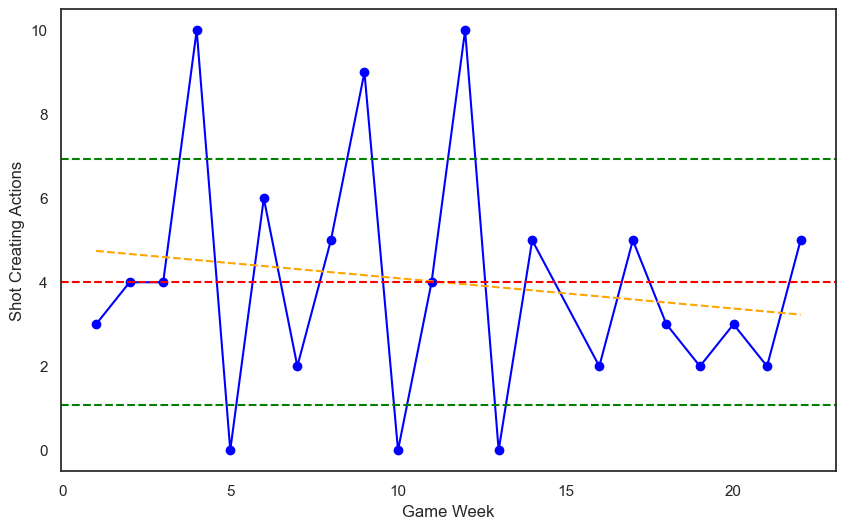

Mean percentage of pass completed: 4.0
Standard deviation: 2.932575659723036
Gradient of the linear fit line: -0.07
Uncertainty of the gradient: 0.10


In [110]:
def mid_stats(df, x_column, y_column, x_label, y_label, savefig_title):
    sns.set(style="white")
    plt.figure(figsize=(10, 6))

    x = df[x_column]
    y = df[y_column]
    
    #Using linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #Calculate the line of best fit using linear regression
    line = slope * x + intercept
    
    #plot data points
    plt.plot(x, y, marker='o', linestyle='-', color='blue', label=f'{y_column}')
    #plot line of best fit
    plt.plot(x, line, color='orange', linestyle='--', label=f'Linear Fit (Gradient: {slope:.2f} ± {std_err:.2f})')
    
    #calculate the mean and standard deviation of y values
    mean_value = y.mean()
    plt.axhline(mean_value, color='red', linestyle='--', label='Mean')

    std_value = y.std()
    plt.axhline(mean_value + std_value, color='green', linestyle='--', label='Mean + STD')
    plt.axhline(mean_value - std_value, color='green', linestyle='--', label='Mean - STD')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    plt.savefig(f'{savefig_title}.png')
    plt.show()
    print("Mean percentage of pass completed:", mean_value)
    print("Standard deviation:", std_value)
    print("Gradient of the linear fit line:", f"{slope:.2f}")
    print("Uncertainty of the gradient:", f"{std_err:.2f}")


mid_stats(guro_reiten, 'Round', 'SCA', 'Game Week', 'Shot Creating Actions', 'SCA')


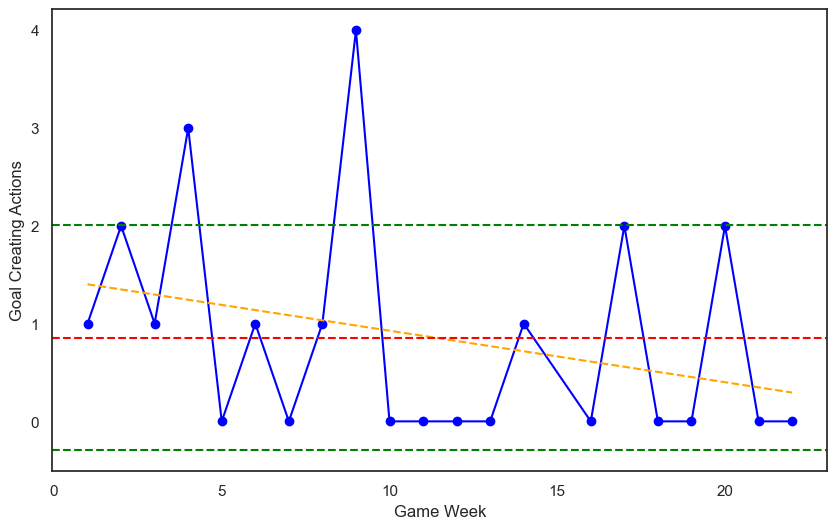

Mean percentage of pass completed: 0.8571428571428571
Standard deviation: 1.1526367287968176
Gradient of the linear fit line: -0.05
Uncertainty of the gradient: 0.04


In [111]:
mid_stats(guro_reiten, 'Round', 'GCA', 'Game Week', 'Goal Creating Actions', 'GCA')

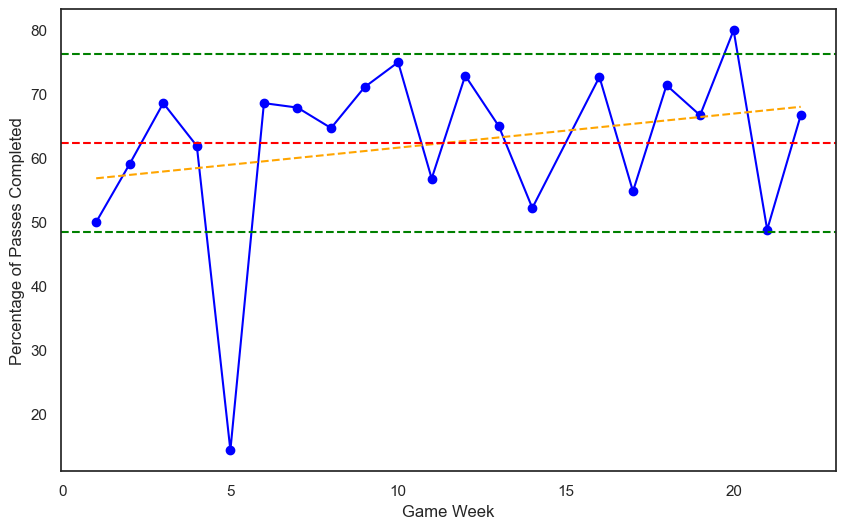

Mean percentage of pass completed: 62.34285714285714
Standard deviation: 13.882131371967759
Gradient of the linear fit line: 0.53
Uncertainty of the gradient: 0.47


In [112]:
mid_stats(guro_reiten, 'Round', 'Cmp%', 'Game Week', 'Percentage of Passes Completed', 'Pass Completed')

From the plot above, we can see that there's an outlier in the percentage of passes completed which is in Game Week 5, this is because Guro Reiten didn't start the game and came in as a substitute in the 67th minute of the game. She made 7 passes and only completed 1 pass. https://fbref.com/en/matches/538677e8/Brighton-and-Hove-Albion-Chelsea-October-23-2022-Womens-Super-League

### Kenza Dali

In [113]:
kenza_dali

Date  Day         Round Venue  Result        Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Home   W 4–3  Aston Villa  Manchester City   
1   2022-09-25  Sun   Matchweek 3  Away   W 2–0  Aston Villa   Leicester City   
2   2022-10-15  Sat   Matchweek 4  Home   L 1–2  Aston Villa         West Ham   
3   2022-10-22  Sat   Matchweek 5  Home   L 0–1  Aston Villa          Everton   
4   2022-10-30  Sun   Matchweek 6  Away   L 1–3  Aston Villa          Chelsea   
5   2022-11-06  Sun   Matchweek 7  Away   W 1–0  Aston Villa        Liverpool   
6   2022-11-20  Sun   Matchweek 8  Home   W 3–1  Aston Villa          Reading   
7   2022-12-03  Sat   Matchweek 9  Away   L 0–5  Aston Villa   Manchester Utd   
8   2022-12-11  Sun  Matchweek 10  Home   L 1–4  Aston Villa          Arsenal   
9   2023-01-14  Sat  Matchweek 11  Home   W 2–1  Aston Villa        Tottenham   
10  2023-01-21  Sat  Matchweek 12  Away   D 1–1  Aston Villa  Manchester City   
11  2023-02-04  Sat  Matchweek 13  Home   D 1–1  Aston Villa         Brighton   
12  2023-02-12  Sun   Matchweek 1  Away   W 6–2  Aston Villa         Brighton   
13  2023-03-05  Sun  Matchweek 14  Away   W 2–0  Aston Villa          Everton   
14  2023-03-12  Sun  Matchweek 15  Away   W 2–1  Aston Villa         West Ham   
15  2023-03-26  Sun  Matchweek 16  Home   W 5–0  Aston Villa   Leicester City   
16  2023-04-02  Sun  Matchweek 17  Home   L 0–3  Aston Villa          Chelsea   
17  2023-04-23  Sun  Matchweek 18  Away   D 3–3  Aston Villa        Tottenham   
18  2023-04-28  Fri  Matchweek 19  Home   L 2–3  Aston Villa   Manchester Utd   
19  2023-05-07  Sun  Matchweek 20  Away   W 5–0  Aston Villa          Reading   
20  2023-05-21  Sun  Matchweek 21  Home   D 3–3  Aston Villa        Liverpool   
21         NaN  NaN           NaN   NaN  10-4-7          NaN              NaN   

    Start    Pos   Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  \
0       Y     RM    90    1    0   0      0   2    1     0     0       51   
1       Y  RM,LM    90    0    1   0      0   3    1     0     0       69   
2       Y  RM,CM    90    1    0   0      0   3    1     0     0       96   
3       Y     LM    90    0    0   0      0   2    0     0     0       71   
4       Y     LM    90    0    0   0      0   4    1     0     0       54   
5       Y     LM    90    0    0   0      0   0    0     0     0       71   
6       Y     LM    89    0    1   0      0   1    0     0     0       90   
7       Y     LM    90    0    0   0      0   1    0     0     0       59   
8       Y     LM    90    0    1   0      0   2    1     0     0       79   
9       Y     LM    89    1    0   0      0   1    1     0     0       69   
10      Y     DM    90    0    0   0      0   1    1     0     0       50   
11      Y     LM    90    0    0   0      0   2    2     0     0       81   
12      Y     LM    72    0    3   0      0   3    0     0     0       72   
13      Y     RM    90    1    0   0      0   2    1     0     0       72   
14      Y     RM    81    0    0   0      0   1    0     0     0       73   
15      Y     RM    84    1    0   0      0   4    2     0     0       53   
16      Y     DM    90    0    0   0      0   2    0     0     0       72   
17      Y     RM    86    0    1   0      0   0    0     0     0       54   
18      Y     RM    90    0    0   0      0   0    0     0     0       56   
19      Y     RM    90    0    1   0      0   0    0     0     0       59   
20      Y  LM,CM    44    0    0   0      0   0    0     0     0       29   
21  21/21    NaN  1805    5    8   0      0  34   12     0     0     1380   

    Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp   Att  Cmp%  PrgP  \
0     0    1       2  0.1   0.1  0.1    6    1   27    38  71.1     6   
1     1    0       0  0.1   0.1  0.2    3    1   37    56  66.1     7   
2     2    1       0  0.3   0.3  0.4   10    0   60    87  69.0    13   
3     2    0       3  0.1   0.1  0.0    3    0   41    61  67.2     6   
4     0  

In [114]:
#Dropping Irrelevant rows
kenza_dali.drop(index=[21], inplace=True)
kenza_dali.tail()

Date  Day         Round Venue Result        Squad        Opponent  \
16  2023-04-02  Sun  Matchweek 17  Home  L 0–3  Aston Villa         Chelsea   
17  2023-04-23  Sun  Matchweek 18  Away  D 3–3  Aston Villa       Tottenham   
18  2023-04-28  Fri  Matchweek 19  Home  L 2–3  Aston Villa  Manchester Utd   
19  2023-05-07  Sun  Matchweek 20  Away  W 5–0  Aston Villa         Reading   
20  2023-05-21  Sun  Matchweek 21  Home  D 3–3  Aston Villa       Liverpool   

   Start    Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
16     Y     DM   90    0    0   0      0   2    0     0     0       72    0   
17     Y     RM   86    0    1   0      0   0    0     0     0       54    0   
18     Y     RM   90    0    0   0      0   0    0     0     0       56    2   
19     Y     RM   90    0    1   0      0   0    0     0     0       59    1   
20     Y  LM,CM   44    0    0   0      0   0    0     0     0       29    0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
16    0       0  0.1   0.1  0.2    6    0   42   61  68.9     9       51   
17    0       0  0.0   0.0  0.3    8    2   34   52  65.4     8       38   
18    0       0  0.0   0.0  0.1    4    1   30   51  58.8     7       35   
19    0       0  0.0   0.0  0.4    8    3   44   56  78.6    11       30   
20    0       0  0.0   0.0  0.0    0    0   22   29  75.9     2       19   

    PrgC  Att.1  Succ  Match Report  
16     3      3     2  Match Report  
17     0      0     0  Match Report  
18     1      3     1  Match Report  
19     3      2     0  Match Report  
20     0      1     1  Match Report

In [115]:
#Extract Text from the Round Column
kenza_dali['Round'] = kenza_dali['Round'].str.extract('(\d+)')
kenza_dali.head()

Date  Day Round Venue Result        Squad         Opponent Start  \
0  2022-09-18  Sun     2  Home  W 4–3  Aston Villa  Manchester City     Y   
1  2022-09-25  Sun     3  Away  W 2–0  Aston Villa   Leicester City     Y   
2  2022-10-15  Sat     4  Home  L 1–2  Aston Villa         West Ham     Y   
3  2022-10-22  Sat     5  Home  L 0–1  Aston Villa          Everton     Y   
4  2022-10-30  Sun     6  Away  L 1–3  Aston Villa          Chelsea     Y   

     Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0     RM   90    1    0   0      0   2    1     0     0       51    0    1   
1  RM,LM   90    0    1   0      0   3    1     0     0       69    1    0   
2  RM,CM   90    1    0   0      0   3    1     0     0       96    2    1   
3     LM   90    0    0   0      0   2    0     0     0       71    2    0   
4     LM   90    0    0   0      0   4    1     0     0       54    0    1   

   Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
0       2  0.1   0.1  0.1    6    1   27   38  71.1     6       34     3   
1       0  0.1   0.1  0.2    3    1   37   56  66.1     7       23     7   
2       0  0.3   0.3  0.4   10    0   60   87  69.0    13       63     9   
3       3  0.1   0.1  0.0    3    0   41   61  67.2     6       52     4   
4       1  0.2   0.2  0.0    2    0   29   43  67.4     8       26     3   

   Att.1  Succ  Match Report  
0      3     1  Match Report  
1      2     0  Match Report  
2      2     1  Match Report  
3      0     0  Match Report  
4      1     0  Match Report

In [116]:
#Convert Round Column to Integer
kenza_dali['Round'] = pd.to_numeric(kenza_dali['Round'])

In [117]:
#Sort Round Column in ascending format
kenza_dali = kenza_dali.sort_values(by = ['Round'])
kenza_dali

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   
4   2022-10-30  Sun      6  Away  L 1–3  Aston Villa          Chelsea     Y   
5   2022-11-06  Sun      7  Away  W 1–0  Aston Villa        Liverpool     Y   
6   2022-11-20  Sun      8  Home  W 3–1  Aston Villa          Reading     Y   
7   2022-12-03  Sat      9  Away  L 0–5  Aston Villa   Manchester Utd     Y   
8   2022-12-11  Sun     10  Home  L 1–4  Aston Villa          Arsenal     Y   
9   2023-01-14  Sat     11  Home  W 2–1  Aston Villa        Tottenham     Y   
10  2023-01-21  Sat     12  Away  D 1–1  Aston Villa  Manchester City     Y   
11  2023-02-04  Sat     13  Home  D 1–1  Aston Villa         Brighton     Y   
13  2023-03-05  Sun     14  Away  W 2–0  Aston Villa          Everton     Y   
14  2023-03-12  Sun     15  Away  W 2–1  Aston Villa         West Ham     Y   
15  2023-03-26  Sun     16  Home  W 5–0  Aston Villa   Leicester City     Y   
16  2023-04-02  Sun     17  Home  L 0–3  Aston Villa          Chelsea     Y   
17  2023-04-23  Sun     18  Away  D 3–3  Aston Villa        Tottenham     Y   
18  2023-04-28  Fri     19  Home  L 2–3  Aston Villa   Manchester Utd     Y   
19  2023-05-07  Sun     20  Away  W 5–0  Aston Villa          Reading     Y   
20  2023-05-21  Sun     21  Home  D 3–3  Aston Villa        Liverpool     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     LM   72    0    3   0      0   3    0     0     0       72    0    1   
0      RM   90    1    0   0      0   2    1     0     0       51    0    1   
1   RM,LM   90    0    1   0      0   3    1     0     0       69    1    0   
2   RM,CM   90    1    0   0      0   3    1     0     0       96    2    1   
3      LM   90    0    0   0      0   2    0     0     0       71    2    0   
4      LM   90    0    0   0      0   4    1     0     0       54    0    1   
5      LM   90    0    0   0      0   0    0     0     0       71    1    0   
6      LM   89    0    1   0      0   1    0     0     0       90    1    2   
7      LM   90    0    0   0      0   1    0     0     0       59    0    0   
8      LM   90    0    1   0      0   2    1     0     0       79    0    1   
9      LM   89    1    0   0      0   1    1     0     0       69    1    2   
10     DM   90    0    0   0      0   1    1     0     0       50    1    0   
11     LM   90    0    0   0      0   2    2     0     0       81    1    2   
13     RM   90    1    0   0      0   2    1     0     0       72    1    0   
14     RM   81    0    0   0      0   1    0     0     0       73    2    1   
15     RM   84    1    0   0      0   4    2     0     0       53    1    0   
16     DM   90    0    0   0      0   2    0     0     0       72    0    0   
17     RM   86    0    1   0      0   0    0     0     0       54    0    0   
18     RM   90    0    0   0      0   0    0     0     0       56    2    0   
19     RM   90    0    1   0      0   0    0     0     0       59    1    0   
20  LM,CM   44    0    0   0      0   0    0     0     0       29    0    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  0.1   0.1  0.3    6    5   42   61  68.9    10       39     7   
0        2  0.1   0.1  0.1    6    1   27   38  71.1     6       34     3   
1        0  0.1   0.1  0.2    3    1   37   56  66.1     7       23     7   
2        0  0.3   0.3  0.4   10    0   60   87  69.0    13       63     9   
3        3  0.1   0.1  0.0    3    0   41   61  67.2     6       52     4   
4        1  0.2   0.2  0.0    2    0   29   43  67.4     8       26   

### Percentage of Pass Completed Kenza Dali

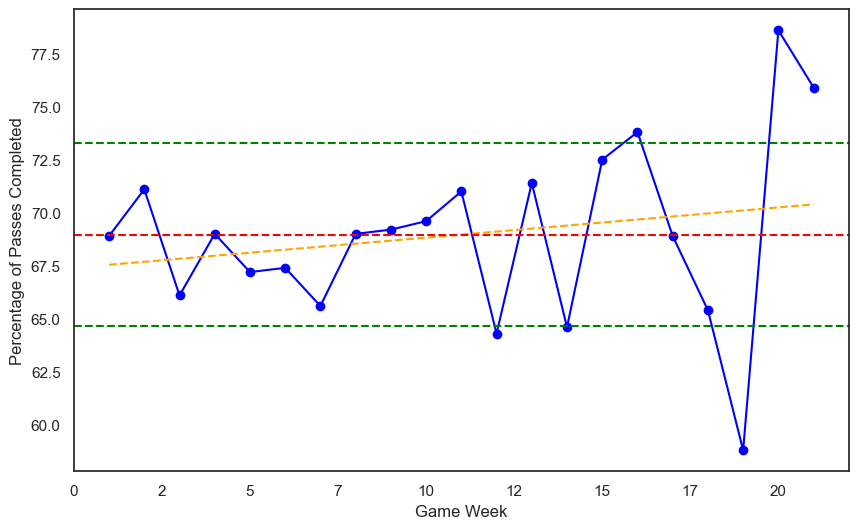

Mean percentage of pass completed: 68.96666666666667
Standard deviation: 4.323463118072518
Gradient of the linear fit line: 0.14
Uncertainty of the gradient: 0.16


In [118]:
mid_stats(kenza_dali, 'Round', 'Cmp%', 'Game Week', 'Percentage of Passes Completed', 'Pass Completed Kenza')

### Goal Creating Actions

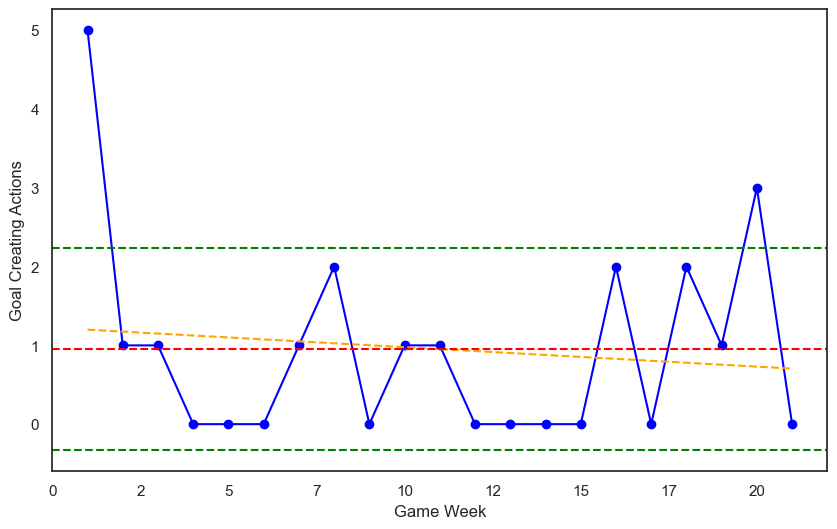

Mean percentage of pass completed: 0.9523809523809523
Standard deviation: 1.2835961388299075
Gradient of the linear fit line: -0.02
Uncertainty of the gradient: 0.05


In [119]:
mid_stats(kenza_dali, 'Round', 'GCA', 'Game Week', 'Goal Creating Actions', 'GCA Kenza')

### Shot Creating Actions

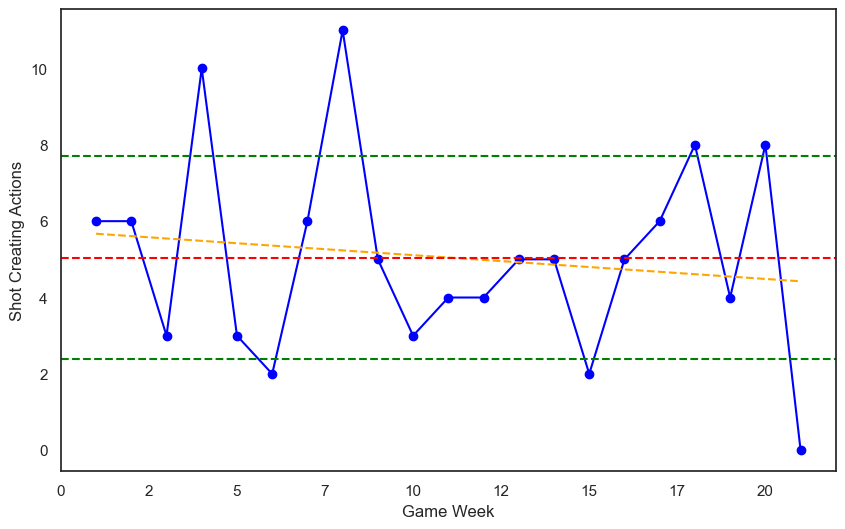

Mean percentage of pass completed: 5.0476190476190474
Standard deviation: 2.6547352123364485
Gradient of the linear fit line: -0.06
Uncertainty of the gradient: 0.10


In [120]:
mid_stats(kenza_dali, 'Round', 'SCA', 'Game Week', 'Shot Creating Actions', 'SCA Kenza')

### katie_zelem

In [121]:
katie_zelem

Date  Day         Round Venue  Result           Squad  \
0   2022-09-17  Sat   Matchweek 2  Home   W 4–0  Manchester Utd   
1   2022-09-25  Sun   Matchweek 3  Away   W 2–0  Manchester Utd   
2   2022-10-16  Sun   Matchweek 4  Home   W 4–0  Manchester Utd   
3   2022-10-23  Sun   Matchweek 5  Away   W 1–0  Manchester Utd   
4   2022-10-30  Sun   Matchweek 6  Away   W 3–0  Manchester Utd   
5   2022-11-06  Sun   Matchweek 7  Home   L 1–3  Manchester Utd   
6   2022-11-19  Sat   Matchweek 8  Away   W 3–2  Manchester Utd   
7   2022-12-03  Sat   Matchweek 9  Home   W 5–0  Manchester Utd   
8   2022-12-11  Sun  Matchweek 10  Away   D 1–1  Manchester Utd   
9   2023-01-15  Sun  Matchweek 11  Home   W 6–0  Manchester Utd   
10  2023-01-22  Sun  Matchweek 12  Away   W 1–0  Manchester Utd   
11  2023-02-05  Sun  Matchweek 13  Home   D 0–0  Manchester Utd   
12  2023-02-12  Sun   Matchweek 1  Away   W 2–1  Manchester Utd   
13  2023-03-05  Sun  Matchweek 14  Home   W 5–1  Manchester Utd   
14  2023-03-12  Sun  Matchweek 15  Away   L 0–1  Manchester Utd   
15  2023-03-25  Sat  Matchweek 16  Home   W 4–0  Manchester Utd   
16  2023-04-01  Sat  Matchweek 17  Away   W 4–0  Manchester Utd   
17  2023-04-19  Wed  Matchweek 18  Home   W 1–0  Manchester Utd   
18  2023-04-28  Fri  Matchweek 19  Away   W 3–2  Manchester Utd   
19         NaN  NaN           NaN   NaN     NaN             NaN   
20  2023-05-21  Sun  Matchweek 21  Home   W 2–1  Manchester Utd   
21  2023-05-27  Sat  Matchweek 22  Away   W 1–0  Manchester Utd   
22         NaN  NaN           NaN   NaN  17-2-2             NaN   

           Opponent  Start  Pos     Min  Gls  Ast   PK  PKatt    Sh   SoT  \
0           Reading     Y*   DM    90.0  1.0  2.0  1.0    1.0   0.0   0.0   
1          West Ham     Y*   DM    90.0  0.0  0.0  0.0    0.0   1.0   1.0   
2          Brighton     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
3    Leicester City     Y*   DM    90.0  0.0  1.0  0.0    0.0   1.0   0.0   
4           Everton     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
5           Chelsea     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
6           Arsenal     Y*   DM    90.0  0.0  2.0  0.0    0.0   1.0   0.0   
7       Aston Villa     Y*   DM    90.0  1.0  0.0  0.0    0.0   4.0   2.0   
8   Manchester City     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
9         Liverpool     Y*   DM    90.0  0.0  0.0  0.0    0.0   1.0   0.0   
10          Reading     Y*   DM    90.0  0.0  0.0  0.0    1.0   2.0   2.0   
11          Everton     Y*   DM    90.0  0.0  0.0  0.0    0.0   1.0   0.0   
12        Tottenham     Y*   DM    90.0  0.0  0.0  0.0    0.0   1.0   0.0   
13   Leicester City     Y*   DM    90.0  0.0  0.0  0.0    0.0   4.0   1.0   
14          Chelsea     Y*   DM    90.0  0.0  0.0  0.0    0.0   2.0   1.0   
15         West Ham     Y*   DM    90.0  1.0  0.0  1.0    1.0   0.0   0.0   
16         Brighton     Y*   DM    90.0  0.0  2.0  0.0    0.0   2.0   1.0   
17          Arsenal     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
18      Aston Villa     Y*   DM    90.0  0.0  1.0  0.0    0.0   2.0   1.0   
19              NaN    NaN  NaN     NaN  NaN  NaN  NaN    NaN   NaN   NaN   
20  Manchester City     Y*   DM    90.0  0.0  0.0  0.0    0.0   0.0   0.0   
21        Liverpool     Y*   DM    90.0  0.0  0.0  0.0    0.0   1.0   1.0   
22              NaN  21/21  NaN  1890.0  3.0  8.0  2.0    3.0  23.0  10.0   

    CrdY  CrdR  Touches   Tkl   Int  Blocks   xG  npxG  xAG   SCA   GCA  \
0    0.0   0.0     89.0   0.0   4.0     2.0  0.8   0.0  0.3   9.0   2.0   
1    0.0   0.0     93.0   3.0   4.0     2.0  0.0   0.0  0.3   3.0   0.0   
2    1.0   0.0     73.0   1.0   1.0     0.0  0.0   0.0  0.0   5.0   2.0   
3    1.0   0.0     84.0   2.0   3.0     2.0  0.1   0.1  0.2   3.0   1.0   
4    0.0   0.0     63.0   3.0   0.0     1.0  0.0   0.0  0.0   2.0   1.0   
5    1.0   0.0     62.0   2.0   0.0     0.0  0.0   0.0  0.0   1.0   0.0   
6    0.0   0.0     74.0   1

In [122]:
#Dropping Irrelevant rows
katie_zelem.drop(index=[19, 22], inplace=True)
katie_zelem.tail()

Date  Day         Round Venue Result           Squad  \
16  2023-04-01  Sat  Matchweek 17  Away  W 4–0  Manchester Utd   
17  2023-04-19  Wed  Matchweek 18  Home  W 1–0  Manchester Utd   
18  2023-04-28  Fri  Matchweek 19  Away  W 3–2  Manchester Utd   
20  2023-05-21  Sun  Matchweek 21  Home  W 2–1  Manchester Utd   
21  2023-05-27  Sat  Matchweek 22  Away  W 1–0  Manchester Utd   

           Opponent Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  \
16         Brighton    Y*  DM  90.0  0.0  2.0  0.0    0.0  2.0  1.0   0.0   
17          Arsenal    Y*  DM  90.0  0.0  0.0  0.0    0.0  0.0  0.0   1.0   
18      Aston Villa    Y*  DM  90.0  0.0  1.0  0.0    0.0  2.0  1.0   1.0   
20  Manchester City    Y*  DM  90.0  0.0  0.0  0.0    0.0  0.0  0.0   1.0   
21        Liverpool    Y*  DM  90.0  0.0  0.0  0.0    0.0  1.0  1.0   0.0   

    CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  \
16   0.0     68.0  4.0  1.0     1.0  0.1   0.1  0.9  9.0  2.0  40.0  58.0   
17   0.0     75.0  4.0  0.0     3.0  0.0   0.0  0.2  3.0  0.0  48.0  63.0   
18   0.0     58.0  1.0  1.0     1.0  0.1   0.1  0.1  2.0  1.0  35.0  50.0   
20   0.0     64.0  2.0  1.0     1.0  0.0   0.0  0.2  5.0  0.0  41.0  57.0   
21   0.0     77.0  3.0  1.0     1.0  0.0   0.0  0.1  3.0  0.0  58.0  66.0   

    Cmp%  PrgP  Carries  PrgC  Att.1  Succ  Match Report  
16  69.0   7.0     28.0   0.0    2.0   1.0  Match Report  
17  76.2   5.0     34.0   0.0    4.0   2.0  Match Report  
18  70.0   5.0     26.0   0.0    1.0   1.0  Match Report  
20  71.9   4.0     42.0   1.0    0.0   0.0  Match Report  
21  87.9   5.0     40.0   0.0    2.0   2.0  Match Report

In [123]:
#Extract Text from the Round Column
katie_zelem['Round'] = katie_zelem['Round'].str.extract('(\d+)')
katie_zelem.head()

Date  Day Round Venue Result           Squad        Opponent Start  \
0  2022-09-17  Sat     2  Home  W 4–0  Manchester Utd         Reading    Y*   
1  2022-09-25  Sun     3  Away  W 2–0  Manchester Utd        West Ham    Y*   
2  2022-10-16  Sun     4  Home  W 4–0  Manchester Utd        Brighton    Y*   
3  2022-10-23  Sun     5  Away  W 1–0  Manchester Utd  Leicester City    Y*   
4  2022-10-30  Sun     6  Away  W 3–0  Manchester Utd         Everton    Y*   

  Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0  DM  90.0  1.0  2.0  1.0    1.0  0.0  0.0   0.0   0.0     89.0  0.0  4.0   
1  DM  90.0  0.0  0.0  0.0    0.0  1.0  1.0   0.0   0.0     93.0  3.0  4.0   
2  DM  90.0  0.0  0.0  0.0    0.0  0.0  0.0   1.0   0.0     73.0  1.0  1.0   
3  DM  90.0  0.0  1.0  0.0    0.0  1.0  0.0   1.0   0.0     84.0  2.0  3.0   
4  DM  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     63.0  3.0  0.0   

   Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  PrgC  \
0     2.0  0.8   0.0  0.3  9.0  2.0  63.0  83.0  75.9   8.0     29.0   1.0   
1     2.0  0.0   0.0  0.3  3.0  0.0  56.0  83.0  67.5   9.0     27.0   0.0   
2     0.0  0.0   0.0  0.0  5.0  2.0  50.0  67.0  74.6   5.0     22.0   0.0   
3     2.0  0.1   0.1  0.2  3.0  1.0  61.0  77.0  79.2   5.0     46.0   1.0   
4     1.0  0.0   0.0  0.0  2.0  1.0  41.0  57.0  71.9   3.0     43.0   0.0   

   Att.1  Succ  Match Report  
0    1.0   1.0  Match Report  
1    0.0   0.0  Match Report  
2    0.0   0.0  Match Report  
3    0.0   0.0  Match Report  
4    0.0   0.0  Match Report

In [124]:
#Convert Columns to Integer
cols = ['Round', 'SCA', 'Ast', 'GCA' ]
katie_zelem[cols] = katie_zelem[cols].astype(int)

In [125]:
#Sort Round Column in ascending format
katie_zelem = katie_zelem.sort_values(by = ['Round'])
katie_zelem

Date  Day  Round Venue Result           Squad         Opponent  \
12  2023-02-12  Sun      1  Away  W 2–1  Manchester Utd        Tottenham   
0   2022-09-17  Sat      2  Home  W 4–0  Manchester Utd          Reading   
1   2022-09-25  Sun      3  Away  W 2–0  Manchester Utd         West Ham   
2   2022-10-16  Sun      4  Home  W 4–0  Manchester Utd         Brighton   
3   2022-10-23  Sun      5  Away  W 1–0  Manchester Utd   Leicester City   
4   2022-10-30  Sun      6  Away  W 3–0  Manchester Utd          Everton   
5   2022-11-06  Sun      7  Home  L 1–3  Manchester Utd          Chelsea   
6   2022-11-19  Sat      8  Away  W 3–2  Manchester Utd          Arsenal   
7   2022-12-03  Sat      9  Home  W 5–0  Manchester Utd      Aston Villa   
8   2022-12-11  Sun     10  Away  D 1–1  Manchester Utd  Manchester City   
9   2023-01-15  Sun     11  Home  W 6–0  Manchester Utd        Liverpool   
10  2023-01-22  Sun     12  Away  W 1–0  Manchester Utd          Reading   
11  2023-02-05  Sun     13  Home  D 0–0  Manchester Utd          Everton   
13  2023-03-05  Sun     14  Home  W 5–1  Manchester Utd   Leicester City   
14  2023-03-12  Sun     15  Away  L 0–1  Manchester Utd          Chelsea   
15  2023-03-25  Sat     16  Home  W 4–0  Manchester Utd         West Ham   
16  2023-04-01  Sat     17  Away  W 4–0  Manchester Utd         Brighton   
17  2023-04-19  Wed     18  Home  W 1–0  Manchester Utd          Arsenal   
18  2023-04-28  Fri     19  Away  W 3–2  Manchester Utd      Aston Villa   
20  2023-05-21  Sun     21  Home  W 2–1  Manchester Utd  Manchester City   
21  2023-05-27  Sat     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  \
12    Y*  DM  90.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     78.0  2.0   
0     Y*  DM  90.0  1.0    2  1.0    1.0  0.0  0.0   0.0   0.0     89.0  0.0   
1     Y*  DM  90.0  0.0    0  0.0    0.0  1.0  1.0   0.0   0.0     93.0  3.0   
2     Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     73.0  1.0   
3     Y*  DM  90.0  0.0    1  0.0    0.0  1.0  0.0   1.0   0.0     84.0  2.0   
4     Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   0.0   0.0     63.0  3.0   
5     Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     62.0  2.0   
6     Y*  DM  90.0  0.0    2  0.0    0.0  1.0  0.0   0.0   0.0     74.0  1.0   
7     Y*  DM  90.0  1.0    0  0.0    0.0  4.0  2.0   0.0   0.0     79.0  0.0   
8     Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   0.0   0.0     71.0  5.0   
9     Y*  DM  90.0  0.0    0  0.0    0.0  1.0  0.0   1.0   0.0     88.0  2.0   
10    Y*  DM  90.0  0.0    0  0.0    1.0  2.0  2.0   0.0   0.0     83.0  5.0   
11    Y*  DM  90.0  0.0    0  0.0    0.0  1.0  0.0   0.0   0.0     90.0  3.0   
13    Y*  DM  90.0  0.0    0  0.0    0.0  4.0  1.0   0.0   0.0     69.0  4.0   
14    Y*  DM  90.0  0.0    0  0.0    0.0  2.0  1.0   0.0   0.0     81.0  3.0   
15    Y*  DM  90.0  1.0    0  1.0    1.0  0.0  0.0   0.0   0.0     86.0  5.0   
16    Y*  DM  90.0  0.0    2  0.0    0.0  2.0  1.0   0.0   0.0     68.0  4.0   
17    Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     75.0  4.0   
18    Y*  DM  90.0  0.0    1  0.0    0.0  2.0  1.0   1.0   0.0     58.0  1.0   
20    Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     64.0  2.0   
21    Y*  DM  90.0  0.0    0  0.0    0.0  1.0  1.0   0.0   0.0     77.0  3.0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  \
12  2.0     2.0  0.1   0.1  0.0    1    0  50.0  69.0  72.5   9.0     18.0   
0   4.0     2.0  0.8   0.0  0.3    9    2  63.0  83.0  75.9   8.0     29.0   
1   4.0     2.0  0.0   0.0  0.3    3    0  56.0  83.0  67.5   9.0     27.0   
2   1.0     0.0  0.0   0.0  0.0    5    2  50.0  67.0  74.6   5.0     22.0   
3   3.0     2.0  0.1   0.1  0.2    3    1  61.0  77.0  79.2   5.0     46.0   
4   0.0     1.0  0.0   0.0  0.0    2    1  41.0  57.0  71.9   3.0     43.0   
5   0.0     0.0  0.0   0.0  0.

In [126]:
katie_zelem.tail()

Date  Day  Round Venue Result           Squad         Opponent  \
16  2023-04-01  Sat     17  Away  W 4–0  Manchester Utd         Brighton   
17  2023-04-19  Wed     18  Home  W 1–0  Manchester Utd          Arsenal   
18  2023-04-28  Fri     19  Away  W 3–2  Manchester Utd      Aston Villa   
20  2023-05-21  Sun     21  Home  W 2–1  Manchester Utd  Manchester City   
21  2023-05-27  Sat     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  \
16    Y*  DM  90.0  0.0    2  0.0    0.0  2.0  1.0   0.0   0.0     68.0  4.0   
17    Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     75.0  4.0   
18    Y*  DM  90.0  0.0    1  0.0    0.0  2.0  1.0   1.0   0.0     58.0  1.0   
20    Y*  DM  90.0  0.0    0  0.0    0.0  0.0  0.0   1.0   0.0     64.0  2.0   
21    Y*  DM  90.0  0.0    0  0.0    0.0  1.0  1.0   0.0   0.0     77.0  3.0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  Carries  \
16  1.0     1.0  0.1   0.1  0.9    9    2  40.0  58.0  69.0   7.0     28.0   
17  0.0     3.0  0.0   0.0  0.2    3    0  48.0  63.0  76.2   5.0     34.0   
18  1.0     1.0  0.1   0.1  0.1    2    1  35.0  50.0  70.0   5.0     26.0   
20  1.0     1.0  0.0   0.0  0.2    5    0  41.0  57.0  71.9   4.0     42.0   
21  1.0     1.0  0.0   0.0  0.1    3    0  58.0  66.0  87.9   5.0     40.0   

    PrgC  Att.1  Succ  Match Report  
16   0.0    2.0   1.0  Match Report  
17   0.0    4.0   2.0  Match Report  
18   0.0    1.0   1.0  Match Report  
20   1.0    0.0   0.0  Match Report  
21   0.0    2.0   2.0  Match Report

### Percentage of Pass Completed katie_zelem

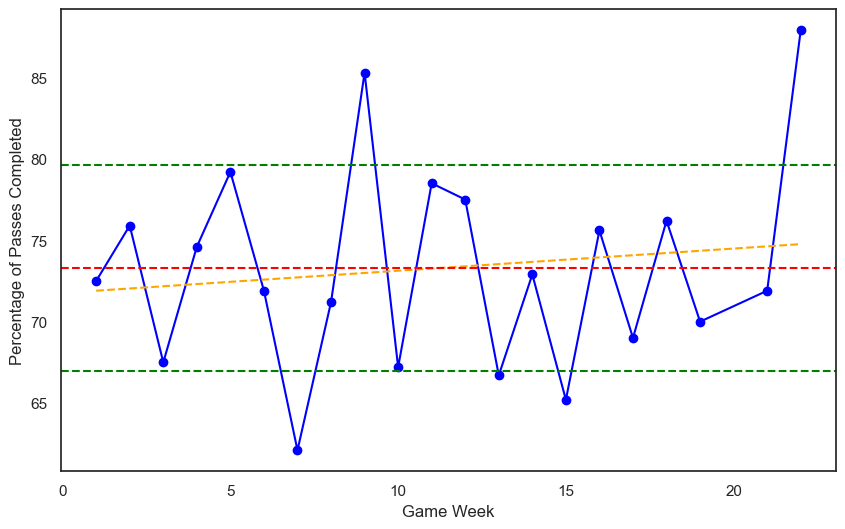

Mean percentage of pass completed: 73.27619047619048
Standard deviation: 6.3354482684262186
Gradient of the linear fit line: 0.14
Uncertainty of the gradient: 0.23


In [127]:
mid_stats(katie_zelem, 'Round', 'Cmp%', 'Game Week', 'Percentage of Passes Completed', 'Pass Completed katie')

### Goal Creating Actions

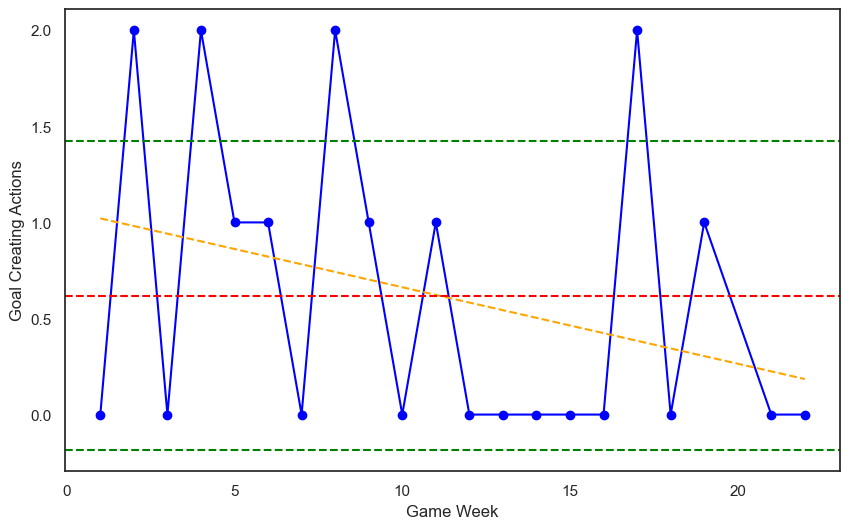

Mean percentage of pass completed: 0.6190476190476191
Standard deviation: 0.8047478161629565
Gradient of the linear fit line: -0.04
Uncertainty of the gradient: 0.03


In [128]:
mid_stats(katie_zelem, 'Round', 'GCA', 'Game Week', 'Goal Creating Actions', 'GCA Katie')

### Shot Creating Actions

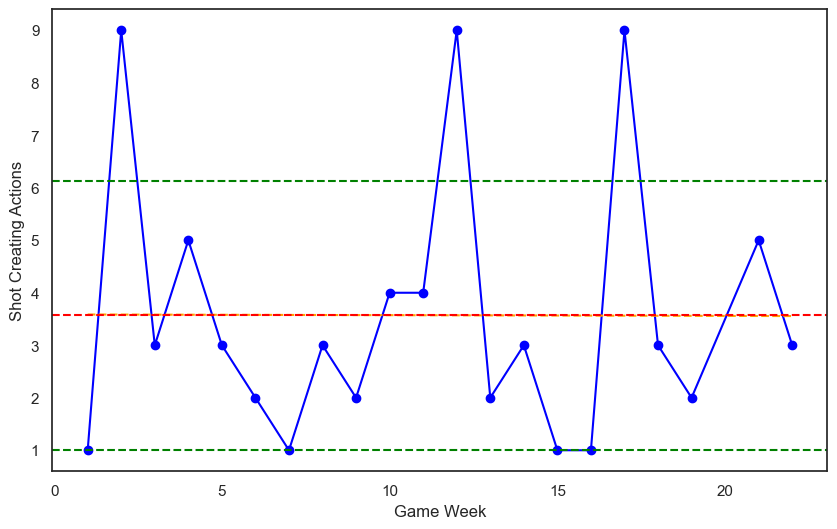

Mean percentage of pass completed: 3.5714285714285716
Standard deviation: 2.5606918707925126
Gradient of the linear fit line: -0.00
Uncertainty of the gradient: 0.09


In [129]:
mid_stats(katie_zelem, 'Round', 'SCA', 'Game Week', 'Shot Creating Actions', 'SCA Katie')

In [130]:
khadija_shaw

Date  Day         Round Venue  Result            Squad  \
0   2022-09-18  Sun   Matchweek 2  Away   L 3–4  Manchester City   
1   2022-09-25  Sun   Matchweek 3  Away   L 0–2  Manchester City   
2   2022-10-16  Sun   Matchweek 4  Home   W 4–0  Manchester City   
3   2022-10-22  Sat   Matchweek 5  Away   W 3–0  Manchester City   
4   2022-10-30  Sun   Matchweek 6  Home   W 2–1  Manchester City   
5   2022-11-06  Sun   Matchweek 7  Away   W 3–0  Manchester City   
6   2022-11-19  Sat   Matchweek 8  Away   W 2–1  Manchester City   
7   2022-12-04  Sun   Matchweek 9  Home   W 3–1  Manchester City   
8   2022-12-11  Sun  Matchweek 10  Home   D 1–1  Manchester City   
9   2023-01-15  Sun  Matchweek 11  Away   W 1–0  Manchester City   
10  2023-01-21  Sat  Matchweek 12  Home   D 1–1  Manchester City   
11  2023-02-04  Sat  Matchweek 13  Away   W 2–0  Manchester City   
12  2023-02-11  Sat   Matchweek 1  Home   W 2–1  Manchester City   
13  2023-03-05  Sun  Matchweek 14  Home   W 3–1  Manchester City   
14  2023-03-12  Sun  Matchweek 15  Away   W 2–1  Manchester City   
15  2023-03-26  Sun  Matchweek 16  Home   W 2–0  Manchester City   
16  2023-04-02  Sun  Matchweek 17  Away   L 1–2  Manchester City   
17  2023-04-23  Sun  Matchweek 18  Home   W 6–2  Manchester City   
18  2023-04-30  Sun  Matchweek 19  Home   W 4–1  Manchester City   
19  2023-05-07  Sun  Matchweek 20  Away   L 1–2  Manchester City   
20  2023-05-21  Sun  Matchweek 21  Away   L 1–2  Manchester City   
21  2023-05-27  Sat  Matchweek 22  Home   W 3–2  Manchester City   
22         NaN  NaN           NaN   NaN  15-2-5              NaN   

          Opponent  Start  Pos   Min  Gls  Ast  PK  PKatt   Sh  SoT  CrdY  \
0      Aston Villa      Y   FW    69    1    1   0      0    4    2     0   
1          Chelsea      Y   FW    83    0    0   0      0    4    0     0   
2   Leicester City      Y   FW    90    2    0   0      0    4    2     0   
3        Tottenham      Y   FW    80    2    0   0      0    7    3     0   
4        Liverpool      Y   FW    80    1    0   0      0    5    2     0   
5          Reading      Y   FW    90    1    0   0      0    4    2     0   
6          Everton      Y   FW    90    1    1   0      0    5    2     0   
7         Brighton      Y   FW    90    0    0   0      0    6    2     0   
8   Manchester Utd      Y   FW    90    0    0   0      0    6    2     0   
9         West Ham      Y   FW    90    1    0   0      0    7    1     0   
10     Aston Villa      Y   FW    90    0    1   0      0    8    2     0   
11  Leicester City      Y   FW    78    1    0   0      0    8    4     0   
12         Arsenal      Y   FW    90    0    1   0      0    3    1     0   
13       Tottenham      Y   FW    88    3    0   1      1   10    4     0   
14        Brighton      Y   FW    90    2    0   0      0    8    4     0   
15         Chelsea      Y   FW    90    0    0   0      0    4    0     0   
16         Arsenal      Y   FW    90    1    0   0      0    4    2     0   
17        West Ham      Y   FW    70    1    1   0      0    4    2     0   
18         Reading      Y   FW    90    1    1   0      0    8    3     0   
19       Liverpool      Y   FW    90    0    0   0      0    3    0     0   
20  Manchester Utd      Y   FW    90    0    1   0      0    5    1     0   
21         Everton      Y   FW    90    2    0   0      0    6    2     0   
22             NaN  22/22  NaN  1898   20    7   1      1  123   43     0   

    CrdR  Touches  Tkl  Int  Blocks    xG  npxG  xAG  SCA  GCA  Cmp  Att  \
0      0       21    0    0       0   0.2   0.2  0.1    2    1   13   15   
1      0       37    1    1       1   0.1   0.1  0.0    1    0    7   17   
2      0       29    1    0       0   1.1   0.5  0.0    2    0   18   23   
3      0       28    1    0       0   0.4   0.4  0.0    1    1   13   17   
4      0       40    1    0       0   1.0   1.0  0.3    2    0   23   30   
5      0       41    1    1       0   0.4   0.4  0.1    6    0   23   29

In [131]:
courtney_nevin

Date  Day         Round Venue Result           Squad  \
0   2023-02-04  Sat  Matchweek 13  Home  L 0–2  Leicester City   
1   2023-02-12  Sun  Matchweek 10  Away  W 1–0  Leicester City   
2   2023-03-05  Sun  Matchweek 14  Away  L 1–5  Leicester City   
3   2023-03-12  Sun  Matchweek 15  Home  D 0–0  Leicester City   
4   2023-03-15  Wed  Matchweek 12  Away  L 0–1  Leicester City   
5   2023-03-26  Sun  Matchweek 16  Away  L 0–5  Leicester City   
6   2023-04-02  Sun  Matchweek 17  Home  W 2–1  Leicester City   
7   2023-04-29  Sat  Matchweek 19  Home  W 4–0  Leicester City   
8   2023-05-05  Fri  Matchweek 20  Away  L 0–1  Leicester City   
9   2023-05-10  Wed  Matchweek 18  Away  L 0–6  Leicester City   
10  2023-05-21  Sun  Matchweek 21  Home  L 1–2  Leicester City   
11  2023-05-27  Sat  Matchweek 22  Away  W 1–0  Leicester City   
12         NaN  NaN           NaN   NaN  4-1-7             NaN   

           Opponent  Start    Pos   Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0   Manchester City      Y     LB    80    0    0   0      0   0    0     0   
1         Liverpool      Y     LB    90    0    1   0      0   0    0     0   
2    Manchester Utd      Y     LB    90    0    0   0      0   0    0     1   
3           Everton      Y     LB    90    0    0   0      0   0    0     0   
4         Tottenham      Y     LB    90    0    0   0      0   0    0     0   
5       Aston Villa      Y  LB,CB    90    0    0   0      0   0    0     0   
6           Reading      Y     LB    90    0    1   0      0   0    0     0   
7         Liverpool      Y     LB    90    0    2   0      0   0    0     0   
8           Arsenal      Y     LB    90    0    0   0      0   0    0     0   
9           Chelsea      Y     CB    90    0    0   0      0   0    0     0   
10         West Ham      Y     LB    90    0    0   0      0   1    0     0   
11         Brighton      Y     LB    90    0    0   0      0   0    0     0   
12              NaN  12/12    NaN  1070    0    4   0      0   1    0     1   

    CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  \
0      0       30    1    0       3  0.0   0.0  0.0    1    0   13   21  61.9   
1      0       63    2    5       1  0.0   0.0  0.1    3    1   38   50  76.0   
2      0       41    1    3       0  0.0   0.0  0.0    0    0   19   33  57.6   
3      0       54    2    4       0  0.0   0.0  0.1    2    0   28   42  66.7   
4      0       60    3    2       1  0.0   0.0  0.0    1    0   36   47  76.6   
5      0       52    2    3       1  0.0   0.0  0.1    4    0   32   41  78.0   
6      0       58    1    0       2  0.0   0.0  0.3    5    1   33   49  67.3   
7      0       78    1    4       3  0.0   0.0  0.4    6    2   48   67  71.6   
8      0       51    0    1       0  0.0   0.0  0.0    0    0   28   43  65.1   
9      0       40    0    3       0  0.0   0.0  0.0    0    0   27   35  77.1   
10     0       72    2    0       1  0.0   0.0  0.1    4    0   46   67  68.7   
11     0       53    0    0       1  0.0   0.0  0.1    3    0   29   53  54.7   
12     0      652   15   25      13  0.0   0.0  1.2   29    4  377  548  68.8   

    PrgP  Carries  PrgC  Att.1  Succ  Match Report  
0      0        5     0      0     0  Match Report  
1      4       26     1      0     0  Match Report  
2      1       15     0      0     0  Match Report  
3      2       23     1      4     0  Match Report  
4      2       35     2      3     1  Match Report  
5      5       31     2      3     2  Match Report  
6      1       23     1      1     0  Match Report  
7      3       37     1      3     2  Match Report  
8      2       23     0      2     0  Match Report  
9      2       24     0      1     1  Match Report  
10     4       37     1      0     0  Match Report  
11     2       15     4      1     1  Match Report  
12    28      294    13     18     7           NaN

## Forwards

In [132]:
#Filtering by position of Forwards for the 2022/2023 season
df_forward = df_player[(df_player['position'] == 'Forward') & (df_player['season'] == '2022/2023')]
df_forward

full_name  age     season position  \
2          Adriana Leon   31  2022/2023  Forward   
3    Agnes Beever-Jones   20  2022/2023  Forward   
4         Aileen Whelan   32  2022/2023  Forward   
5        Aimee Claypole   17  2022/2023  Forward   
11       Alisha Lehmann   24  2022/2023  Forward   
..                  ...  ...        ...      ...   
275      Veatriki Sarri   25  2022/2023  Forward   
276     Victoria Pelova   24  2022/2023  Forward   
279      Viviane Asseyi   29  2022/2023  Forward   
280    Vivianne Miedema   27  2022/2023  Forward   
281        Yana Daniels   31  2022/2023  Forward   

                     Current Club  minutes_played_overall  \
2         Manchester United Women                      76   
3                   Everton Women                     757   
4              Leicester City WFC                    1929   
5                   Chelsea Women                       9   
11             Aston Villa Ladies                    1533   
..                            ...                     ...   
275  Brighton & Hove Albion Women                    1442   
276                 Arsenal Women                     908   
279         West Ham United Women                    1946   
280                 Arsenal Women                     437   
281               Liverpool Women                     743   

     minutes_played_home  minutes_played_away  nationality  \
2                     66                   10       Canada   
3                    359                  398      England   
4                    990                  939      England   
5                      9                    0      England   
11                   786                  747  Switzerland   
..                   ...                  ...          ...   
275                  708                  734       Greece   
276                  368                  540  Netherlands   
279                  963                  983       France   
280                  286                  151  Netherlands   
281                  339                  404      Belgium   

     appearances_overall  appearances_home  appearances_away  goals_overall  \
2                      5                 4                 1              1   
3                     16                 8                 8              2   
4                     22                11                11              1   
5                      1                 1                 0              0   
11                    22                11                11              5   
..                   ...               ...               ...            ...   
275                   22                11                11              3   
276                   12                 5                 7              1   
279                   22                11                11              6   
280                    8                 5                 3              4   
281                   17                 9                 8              0   

     goals_home  goals_away  assists_overall  assists_home  assists_away  \
2             1           0                0             0             0   
3             2           0                0             0             0   
4             1           0                1             1             0   
5             0           0                0             0             0   
11            3           2                2             2             0   
..          ...         ...              ...           ...           ...   
275           0           3                2             1             1   
276           0           1                3             0             3   
279           5           1                3             1             2   
280           3           1                1             1             0   
281           0           0                0             0             0   

     penalty_goals  penalty_misses  clean_sheets_

In [133]:
#Sorting forward players by overall goals
sorted_forw = df_forward.sort_values(by='goals_overall', ascending=False)
top_mid = sorted_forw.head(5)
top_mid

full_name  age     season position  \
230                Rachel Daly   31  2022/2023  Forward   
252              Samantha Kerr   30  2022/2023  Forward   
169                Leah Galton   29  2022/2023  Forward   
144              Katie Stengel   31  2022/2023  Forward   
226  Pernille Mosegaard-Harder   30  2022/2023  Forward   

                Current Club  minutes_played_overall  minutes_played_home  \
230       Aston Villa Ladies                    1962                  990   
252            Chelsea Women                    1547                  703   
169  Manchester United Women                    1641                  808   
144          Liverpool Women                    1793                  961   
226            Chelsea Women                     607                  298   

     minutes_played_away nationality  appearances_overall  appearances_home  \
230                  972     England                   22                11   
252                  844   Australia                   21                10   
169                  833     England                   20                10   
144                  832         USA                   21                11   
226                  309     Denmark                   10                 5   

     appearances_away  goals_overall  goals_home  goals_away  assists_overall  \
230                11             22          11          11                6   
252                11             12           6           6                5   
169                10             10           4           6                4   
144                10              9           3           6                0   
226                 5              8           4           4                3   

     assists_home  assists_away  penalty_goals  penalty_misses  \
230             3             3              3               0   
252             2             3              0               0   
169             3             1              0               0   
144             0             0              2               0   
226             3             0              1               0   

     clean_sheets_overall  clean_sheets_home  clean_sheets_away  \
230                     6                  1                  5   
252                    10                  5                  5   
169                    12                  7                  5   
144                     3                  2                  1   
226                     6                  3                  3   

     conceded_overall  conceded_home  conceded_away  yellow_cards_overall  \
230                35             21             14                     2   
252                11              3              8                     0   
169                10              4              6                     0   
144                31             12             19                     0   
226                 3              1              2                     0   

     red_cards_overall  hattricks_total_overall  \
230                  0                        2   
252                  0                        0   
169                  0                        0   
144                  0                        0   
226                  0                        0   

     two_goals_in_a_game_total_overall  saves_total_overall  PSxG  PSxG/SoT  \
230                                  6                    0   0.0       0.0   
252                                  1                    0   0.0       0.0   
169                                  1                    0   0.0       0.0   
144                                  3                    0   0.0       0.0   
226                                  3                    0   0.0       0.0   

     xSaves_total_overall  SoTA  
230                   0.0     0  
252                   0.0     0  
169                   0.0     0  
144                   0.0     0  
226                   0.0 

### Scraping Match data for Top Forwards

In [141]:
def forw_data(url):
    #Path for ChromeDriver
    driver_path = '/Users/waleibitoye/Downloads/chromedriver-mac-x64/chromedriver'  

    #Create ChromeOptions object to use Chrome Browser
    chrome_options = webdriver.ChromeOptions()
    #To run the command in headless mode i.e. without an interface
    chrome_options.add_argument("--headless")

    chrome_options.add_argument(f'--chromedriver={driver_path}')
    
    #Initialize ChromeDriver Instance
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    #Wait time set to 5secs to allow elements on the webpage to fully load
    driver.implicitly_wait(5)
    
    #get page source of the webpage
    page_source = driver.page_source

    #use pandas to read tables on the webpage
    df_def_stats = pd.read_html(page_source, header=1)[0]
    
    #close browser session
    driver.quit()

    return df_def_stats

urls = [
    'https://fbref.com/en/players/7fa35ec9/matchlogs/2022-2023/c189/Rachel-Daly-Match-Logs',
    'https://fbref.com/en/players/6a435e8d/matchlogs/2022-2023/c189/Sam-Kerr-Match-Logs',
    'https://fbref.com/en/players/c3d37cec/matchlogs/2022-2023/Leah-Galton-Match-Logs'
    
]

dataframes = {}

for url in urls:
    player_name = url.split('/')[-1].replace('-Match-Logs', '') 
    dataframes[player_name] = forw_data(url)
    
rachel_daly = dataframes['Rachel-Daly']
sam_kerr = dataframes['Sam-Kerr']
leah_galton = dataframes['Leah-Galton']

### rachel_daly

In [142]:
rachel_daly

Date  Day         Round Venue  Result        Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Home   W 4–3  Aston Villa  Manchester City   
1   2022-09-25  Sun   Matchweek 3  Away   W 2–0  Aston Villa   Leicester City   
2   2022-10-15  Sat   Matchweek 4  Home   L 1–2  Aston Villa         West Ham   
3   2022-10-22  Sat   Matchweek 5  Home   L 0–1  Aston Villa          Everton   
4   2022-10-30  Sun   Matchweek 6  Away   L 1–3  Aston Villa          Chelsea   
5   2022-11-06  Sun   Matchweek 7  Away   W 1–0  Aston Villa        Liverpool   
6   2022-11-20  Sun   Matchweek 8  Home   W 3–1  Aston Villa          Reading   
7   2022-12-03  Sat   Matchweek 9  Away   L 0–5  Aston Villa   Manchester Utd   
8   2022-12-11  Sun  Matchweek 10  Home   L 1–4  Aston Villa          Arsenal   
9   2023-01-14  Sat  Matchweek 11  Home   W 2–1  Aston Villa        Tottenham   
10  2023-01-21  Sat  Matchweek 12  Away   D 1–1  Aston Villa  Manchester City   
11  2023-02-04  Sat  Matchweek 13  Home   D 1–1  Aston Villa         Brighton   
12  2023-02-12  Sun   Matchweek 1  Away   W 6–2  Aston Villa         Brighton   
13  2023-03-05  Sun  Matchweek 14  Away   W 2–0  Aston Villa          Everton   
14  2023-03-12  Sun  Matchweek 15  Away   W 2–1  Aston Villa         West Ham   
15  2023-03-26  Sun  Matchweek 16  Home   W 5–0  Aston Villa   Leicester City   
16  2023-04-02  Sun  Matchweek 17  Home   L 0–3  Aston Villa          Chelsea   
17  2023-04-23  Sun  Matchweek 18  Away   D 3–3  Aston Villa        Tottenham   
18  2023-04-28  Fri  Matchweek 19  Home   L 2–3  Aston Villa   Manchester Utd   
19  2023-05-07  Sun  Matchweek 20  Away   W 5–0  Aston Villa          Reading   
20  2023-05-21  Sun  Matchweek 21  Home   D 3–3  Aston Villa        Liverpool   
21  2023-05-27  Sat  Matchweek 22  Away   W 2–0  Aston Villa          Arsenal   
22         NaN  NaN           NaN   NaN  11-4-7          NaN              NaN   

    Start    Pos   Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  \
0       Y     FW    89    2    1   0      0   5    2     0     0       42   
1       Y  FW,RM    89    1    0   1      1   1    0     0     0       54   
2       Y     FW    90    0    1   0      0   6    2     0     0       69   
3       Y     FW    89    0    0   0      0   4    1     0     0       39   
4       Y     FW    90    1    0   0      0   3    1     0     0       32   
5       Y     FW    90    1    0   1      1   2    0     1     0       39   
6       Y     FW    89    3    0   1      1   9    3     0     0       43   
7       Y     FW    90    0    0   0      0   2    1     0     0       42   
8       Y  FW,CM    90    0    0   0      0   1    1     0     0       42   
9       Y     FW    90    1    0   0      0   7    4     0     0       35   
10      Y     FW    90    0    0   0      0   1    0     0     0       37   
11      Y     FW    90    0    0   0      0   2    0     0     0       30   
12      Y     FW    71    1    0   0      0   4    2     0     0       34   
13      Y     FW    89    0    1   0      0   3    0     0     0       36   
14      Y     FW    90    1    0   0      0   3    1     1     0       47   
15      Y     FW    90    2    1   0      0   3    2     0     0       31   
16      Y     FW    90    0    0   0      0   2    1     0     0       39   
17      Y     FW    90    2    0   0      0   4    3     0     0       42   
18      Y     FW    90    2    0   0      0   3    2     0     0       23   
19      Y  LW,FW    90    3    2   0      0   6    4     0     0       30   
20      Y     FW    90    1    0   0      0   6    2     0     0       30   
21      Y     FW    90    1    0   0      0   4    2     0     0       21   
22  22/22    NaN  1956   22    6   3      3  81   34     2     0      837   

    Tkl  Int  Blocks    xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  \
0     1    2       1   1.1   1.1  0.0    1    0   28   33  84.8     5   
1     2    3       4   0.8   0.0  0.1    4    0   33   41  80.5     4 

In [143]:
#Dropping Irrelevant rows
rachel_daly.drop(index=[22], inplace=True)
rachel_daly.tail()

Date  Day         Round Venue Result        Squad        Opponent  \
17  2023-04-23  Sun  Matchweek 18  Away  D 3–3  Aston Villa       Tottenham   
18  2023-04-28  Fri  Matchweek 19  Home  L 2–3  Aston Villa  Manchester Utd   
19  2023-05-07  Sun  Matchweek 20  Away  W 5–0  Aston Villa         Reading   
20  2023-05-21  Sun  Matchweek 21  Home  D 3–3  Aston Villa       Liverpool   
21  2023-05-27  Sat  Matchweek 22  Away  W 2–0  Aston Villa         Arsenal   

   Start    Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  \
17     Y     FW   90    2    0   0      0   4    3     0     0       42    1   
18     Y     FW   90    2    0   0      0   3    2     0     0       23    1   
19     Y  LW,FW   90    3    2   0      0   6    4     0     0       30    1   
20     Y     FW   90    1    0   0      0   6    2     0     0       30    0   
21     Y     FW   90    1    0   0      0   4    2     0     0       21    0   

    Int  Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  \
17    0       0  1.0   1.0  0.0    0    0   21   34  61.8     5       23   
18    1       0  0.2   0.2  0.1    2    0    8   15  53.3     1       12   
19    1       1  1.1   1.1  0.9    5    3   14   21  66.7     2        8   
20    0       0  0.6   0.6  0.0    4    1   15   22  68.2     1       23   
21    0       0  0.4   0.4  0.0    1    0   11   15  73.3     1       12   

    PrgC  Att.1  Succ  Match Report  
17     0      0     0  Match Report  
18     2      1     0  Match Report  
19     1      0     0  Match Report  
20     1      1     1  Match Report  
21     1      2     2  Match Report

In [144]:
#Extract Text from the Round Column
rachel_daly['Round'] = rachel_daly['Round'].str.extract('(\d+)')
rachel_daly.head()

Date  Day Round Venue Result        Squad         Opponent Start  \
0  2022-09-18  Sun     2  Home  W 4–3  Aston Villa  Manchester City     Y   
1  2022-09-25  Sun     3  Away  W 2–0  Aston Villa   Leicester City     Y   
2  2022-10-15  Sat     4  Home  L 1–2  Aston Villa         West Ham     Y   
3  2022-10-22  Sat     5  Home  L 0–1  Aston Villa          Everton     Y   
4  2022-10-30  Sun     6  Away  L 1–3  Aston Villa          Chelsea     Y   

     Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
0     FW   89    2    1   0      0   5    2     0     0       42    1    2   
1  FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2     FW   90    0    1   0      0   6    2     0     0       69    0    1   
3     FW   89    0    0   0      0   4    1     0     0       39    1    0   
4     FW   90    1    0   0      0   3    1     0     0       32    0    1   

   Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
0       1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1       4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2       1  0.2   0.2  0.4    3    1   37   55  67.3     7       36     4   
3       3  0.2   0.2  0.0    3    0   22   31  71.0     4       28     0   
4       1  0.3   0.3  0.0    0    0   15   19  78.9     1       17     1   

   Att.1  Succ  Match Report  
0      0     0  Match Report  
1      0     0  Match Report  
2      0     0  Match Report  
3      1     1  Match Report  
4      2     0  Match Report

In [145]:
rachel_daly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          22 non-null     object 
 1   Day           22 non-null     object 
 2   Round         22 non-null     object 
 3   Venue         22 non-null     object 
 4   Result        22 non-null     object 
 5   Squad         22 non-null     object 
 6   Opponent      22 non-null     object 
 7   Start         22 non-null     object 
 8   Pos           22 non-null     object 
 9   Min           22 non-null     int64  
 10  Gls           22 non-null     int64  
 11  Ast           22 non-null     int64  
 12  PK            22 non-null     int64  
 13  PKatt         22 non-null     int64  
 14  Sh            22 non-null     int64  
 15  SoT           22 non-null     int64  
 16  CrdY          22 non-null     int64  
 17  CrdR          22 non-null     int64  
 18  Touches       22 non-null     in

In [146]:
#Convert Round Column to Integer
rachel_daly['Round'] = rachel_daly['Round'].astype(int)

In [147]:
#Sort Round Column in ascending format
rachel_daly = rachel_daly.sort_values(by = ['Round'])
rachel_daly.head()

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       36     4   
3        3  0.2   0.2  0.0    3    0   22   31  71.0     4       28     0   

    Att.1  Succ  Match Report  
12      0     0  Match Report  
0       0     0  Match Report  
1       0     0  Match Report  
2       0     0  Match Report  
3       1     1  Match Report

In [148]:
#Calculating goals - expected goals
def forward_aG_xG(row):
    return row['Gls'] - row['xG']

rachel_daly['aG-xG'] = rachel_daly.apply(forward_aG_xG, axis=1)
rachel_daly.head()

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       36     4   
3        3  0.2   0.2  0.0    3    0   22   31  71.0     4       28     0   

    Att.1  Succ  Match Report  aG-xG  
12      0     0  Match Report    0.0  
0       0     0  Match Report    0.9  
1       0     0  Match Report    0.2  
2       0     0  Match Report   -0.2  
3       1     1  Match Report   -0.2

In [149]:
#Calculating assists - expected assists
def forward_Ast_xGA(row):
    return row['Ast'] - row['xAG']

rachel_daly['Ast-xAG'] = rachel_daly.apply(forward_Ast_xGA, axis=1)
rachel_daly

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   
4   2022-10-30  Sun      6  Away  L 1–3  Aston Villa          Chelsea     Y   
5   2022-11-06  Sun      7  Away  W 1–0  Aston Villa        Liverpool     Y   
6   2022-11-20  Sun      8  Home  W 3–1  Aston Villa          Reading     Y   
7   2022-12-03  Sat      9  Away  L 0–5  Aston Villa   Manchester Utd     Y   
8   2022-12-11  Sun     10  Home  L 1–4  Aston Villa          Arsenal     Y   
9   2023-01-14  Sat     11  Home  W 2–1  Aston Villa        Tottenham     Y   
10  2023-01-21  Sat     12  Away  D 1–1  Aston Villa  Manchester City     Y   
11  2023-02-04  Sat     13  Home  D 1–1  Aston Villa         Brighton     Y   
13  2023-03-05  Sun     14  Away  W 2–0  Aston Villa          Everton     Y   
14  2023-03-12  Sun     15  Away  W 2–1  Aston Villa         West Ham     Y   
15  2023-03-26  Sun     16  Home  W 5–0  Aston Villa   Leicester City     Y   
16  2023-04-02  Sun     17  Home  L 0–3  Aston Villa          Chelsea     Y   
17  2023-04-23  Sun     18  Away  D 3–3  Aston Villa        Tottenham     Y   
18  2023-04-28  Fri     19  Home  L 2–3  Aston Villa   Manchester Utd     Y   
19  2023-05-07  Sun     20  Away  W 5–0  Aston Villa          Reading     Y   
20  2023-05-21  Sun     21  Home  D 3–3  Aston Villa        Liverpool     Y   
21  2023-05-27  Sat     22  Away  W 2–0  Aston Villa          Arsenal     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   
4      FW   90    1    0   0      0   3    1     0     0       32    0    1   
5      FW   90    1    0   1      1   2    0     1     0       39    1    0   
6      FW   89    3    0   1      1   9    3     0     0       43    0    0   
7      FW   90    0    0   0      0   2    1     0     0       42    1    1   
8   FW,CM   90    0    0   0      0   1    1     0     0       42    0    0   
9      FW   90    1    0   0      0   7    4     0     0       35    0    0   
10     FW   90    0    0   0      0   1    0     0     0       37    2    0   
11     FW   90    0    0   0      0   2    0     0     0       30    1    0   
13     FW   89    0    1   0      0   3    0     0     0       36    1    2   
14     FW   90    1    0   0      0   3    1     1     0       47    1    1   
15     FW   90    2    1   0      0   3    2     0     0       31    1    0   
16     FW   90    0    0   0      0   2    1     0     0       39    0    0   
17     FW   90    2    0   0      0   4    3     0     0       42    1    0   
18     FW   90    2    0   0      0   3    2     0     0       23    1    1   
19  LW,FW   90    3    2   0      0   6    4     0     0       30    1    1   
20     FW   90    1    0   0      0   6    2     0     0       30    0    0   
21     FW   90    1    0   0      0   4    2     0     0       21    0    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       3

In [150]:
#Calculating goals + assist
def forward_gls_ast(row):
    return row['Gls'] + row['Ast']

rachel_daly['Gls+Ast'] = rachel_daly.apply(forward_gls_ast, axis=1)
rachel_daly.head()

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       36     4   
3        3  0.2   0.2  0.0    3    0   22   31  71.0     4       28     0   

    Att.1  Succ  Match Report  aG-xG  Ast-xAG  Gls+Ast  
12      0     0  Match Report    0.0      0.0        1  
0       0     0  Match Report    0.9      1.0        3  
1       0     0  Match Report    0.2     -0.1        1  
2       0     0  Match Report   -0.2      0.6        1  
3       1     1  Match Report   -0.2      0.0        0

In [151]:
#Calculating expected goals + expected assists
def forward_xG_xAG(row):
    return row['xG'] + row['xAG']

rachel_daly['xG+xAG'] = rachel_daly.apply(forward_xG_xAG, axis=1)
rachel_daly.head()

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       36     4   
3        3  0.2   0.2  0.0    3    0   22   31  71.0     4       28     0   

    Att.1  Succ  Match Report  aG-xG  Ast-xAG  Gls+Ast  xG+xAG  
12      0     0  Match Report    0.0      0.0        1     1.0  
0       0     0  Match Report    0.9      1.0        3     1.1  
1       0     0  Match Report    0.2     -0.1        1     0.9  
2       0     0  Match Report   -0.2      0.6        1     0.6  
3       1     1  Match Report   -0.2      0.0        0     0.2

In [152]:
#Calculating goals+assist - expected goals+expected assists to get the goal contribution difference
def forward_GC_xGC(row):
    return row['Gls+Ast'] - row['xG+xAG']

rachel_daly['GC-xGC'] = rachel_daly.apply(forward_GC_xGC, axis=1)
rachel_daly

Date  Day  Round Venue Result        Squad         Opponent Start  \
12  2023-02-12  Sun      1  Away  W 6–2  Aston Villa         Brighton     Y   
0   2022-09-18  Sun      2  Home  W 4–3  Aston Villa  Manchester City     Y   
1   2022-09-25  Sun      3  Away  W 2–0  Aston Villa   Leicester City     Y   
2   2022-10-15  Sat      4  Home  L 1–2  Aston Villa         West Ham     Y   
3   2022-10-22  Sat      5  Home  L 0–1  Aston Villa          Everton     Y   
4   2022-10-30  Sun      6  Away  L 1–3  Aston Villa          Chelsea     Y   
5   2022-11-06  Sun      7  Away  W 1–0  Aston Villa        Liverpool     Y   
6   2022-11-20  Sun      8  Home  W 3–1  Aston Villa          Reading     Y   
7   2022-12-03  Sat      9  Away  L 0–5  Aston Villa   Manchester Utd     Y   
8   2022-12-11  Sun     10  Home  L 1–4  Aston Villa          Arsenal     Y   
9   2023-01-14  Sat     11  Home  W 2–1  Aston Villa        Tottenham     Y   
10  2023-01-21  Sat     12  Away  D 1–1  Aston Villa  Manchester City     Y   
11  2023-02-04  Sat     13  Home  D 1–1  Aston Villa         Brighton     Y   
13  2023-03-05  Sun     14  Away  W 2–0  Aston Villa          Everton     Y   
14  2023-03-12  Sun     15  Away  W 2–1  Aston Villa         West Ham     Y   
15  2023-03-26  Sun     16  Home  W 5–0  Aston Villa   Leicester City     Y   
16  2023-04-02  Sun     17  Home  L 0–3  Aston Villa          Chelsea     Y   
17  2023-04-23  Sun     18  Away  D 3–3  Aston Villa        Tottenham     Y   
18  2023-04-28  Fri     19  Home  L 2–3  Aston Villa   Manchester Utd     Y   
19  2023-05-07  Sun     20  Away  W 5–0  Aston Villa          Reading     Y   
20  2023-05-21  Sun     21  Home  D 3–3  Aston Villa        Liverpool     Y   
21  2023-05-27  Sat     22  Away  W 2–0  Aston Villa          Arsenal     Y   

      Pos  Min  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  \
12     FW   71    1    0   0      0   4    2     0     0       34    1    0   
0      FW   89    2    1   0      0   5    2     0     0       42    1    2   
1   FW,RM   89    1    0   1      1   1    0     0     0       54    2    3   
2      FW   90    0    1   0      0   6    2     0     0       69    0    1   
3      FW   89    0    0   0      0   4    1     0     0       39    1    0   
4      FW   90    1    0   0      0   3    1     0     0       32    0    1   
5      FW   90    1    0   1      1   2    0     1     0       39    1    0   
6      FW   89    3    0   1      1   9    3     0     0       43    0    0   
7      FW   90    0    0   0      0   2    1     0     0       42    1    1   
8   FW,CM   90    0    0   0      0   1    1     0     0       42    0    0   
9      FW   90    1    0   0      0   7    4     0     0       35    0    0   
10     FW   90    0    0   0      0   1    0     0     0       37    2    0   
11     FW   90    0    0   0      0   2    0     0     0       30    1    0   
13     FW   89    0    1   0      0   3    0     0     0       36    1    2   
14     FW   90    1    0   0      0   3    1     1     0       47    1    1   
15     FW   90    2    1   0      0   3    2     0     0       31    1    0   
16     FW   90    0    0   0      0   2    1     0     0       39    0    0   
17     FW   90    2    0   0      0   4    3     0     0       42    1    0   
18     FW   90    2    0   0      0   3    2     0     0       23    1    1   
19  LW,FW   90    3    2   0      0   6    4     0     0       30    1    1   
20     FW   90    1    0   0      0   6    2     0     0       30    0    0   
21     FW   90    1    0   0      0   4    2     0     0       21    0    0   

    Blocks   xG  npxG  xAG  SCA  GCA  Cmp  Att  Cmp%  PrgP  Carries  PrgC  \
12       1  1.0   1.0  0.0    1    0   20   24  83.3     1       15     0   
0        1  1.1   1.1  0.0    1    0   28   33  84.8     5       22     1   
1        4  0.8   0.0  0.1    4    0   33   41  80.5     4        8     0   
2        1  0.2   0.2  0.4    3    1   37   55  67.3     7       3

What are the benefits of using xG?
The expected goals metric allows us to gain a better understanding of and quantify performance more accurately than basic stats like shots and possession.

More specifically, with xG we can calculate how good or bad a player or team’s finishing has been over the course of a match or longer period of time. For example, if a team has scored more goals than their xG suggests they should be expected to score, we can conclude that their finishing has been good (or lucky!) in that time period.

We can also use xG to ascertain whether a team or player is getting into good positions to score. If they are going through a rough patch and not scoring many goals, but their expected goals suggests they should have scored more in that time, their luck may change.
https://www.coachesvoice.com/cv/expected-goals-xg-explained/

### Function to Plot Goal Contribution Difference for Forwards

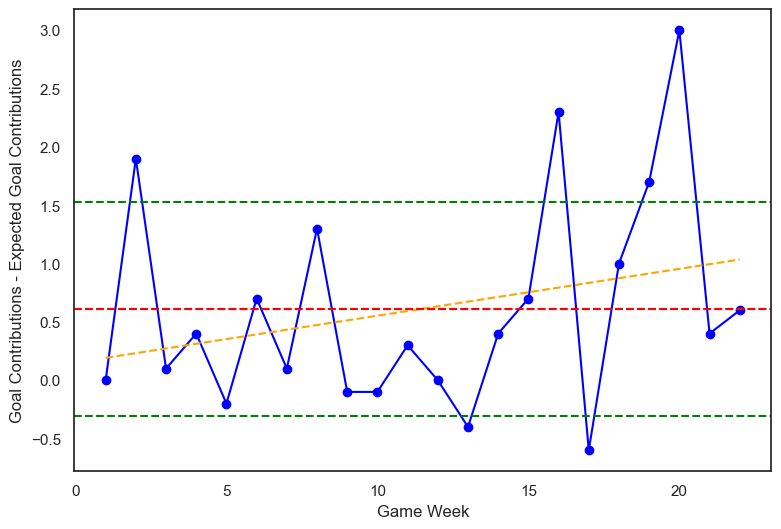

Mean: 0.6136363636363636
Standard deviation: 0.918225750095546
Gradient of the linear fit line: 0.04
Uncertainty of the gradient: 0.03


In [153]:
def forw_plot(df, x_column, y_column, x_label, y_label, savefig_title):
    sns.set(style="white")
    plt.figure(figsize=(9, 6))
    
    x = df[x_column]
    y = df[y_column]

    #Calculate the mean and standard deviation of y value
    mean_value = np.mean(y)
    std_value = np.std(y)
    
    #Calculate the line of best fit using linear regresssion
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    #plot the data points
    plt.plot(x, y, marker='o', linestyle='-', color='blue', label=f'{y_column}')
    plt.plot(x, line, color='orange', linestyle='--', label=f'Linear Fit (Gradient: {slope:.2f} ± {std_err:.2f})')

    mean_value = y.mean()
    plt.axhline(mean_value, color='red', linestyle='--', label='Mean')

    std_value = y.std()

    plt.axhline(mean_value, color='red', linestyle='--', label='Mean')
    plt.axhline(mean_value + std_value, color='green', linestyle='--', label='Mean + STD')
    plt.axhline(mean_value - std_value, color='green', linestyle='--', label='Mean - STD')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

    plt.savefig(f'{savefig_title}.png')
    plt.show()
    print("Mean:", mean_value)
    print("Standard deviation:", std_value)
    print("Gradient of the linear fit line:", f"{slope:.2f}")
    print("Uncertainty of the gradient:", f"{std_err:.2f}")


forw_plot(rachel_daly, 'Round', 'GC-xGC', 'Game Week', 'Goal Contributions - Expected Goal Contributions', 'rachel_daly_gls')


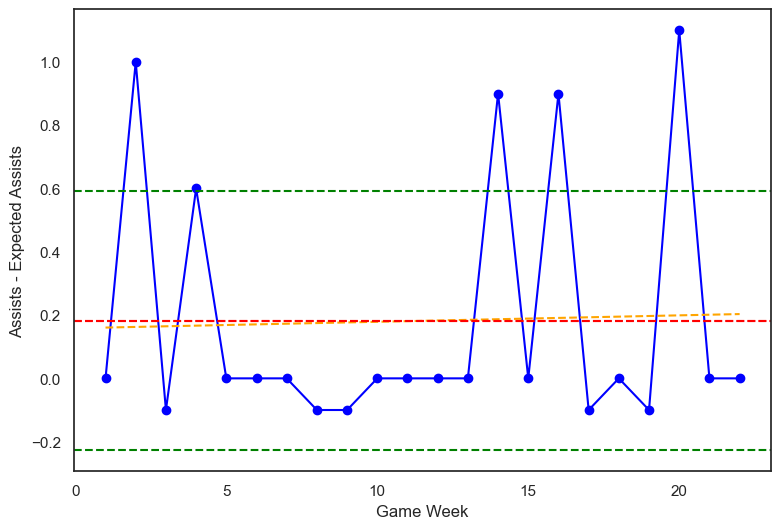

Mean: 0.1818181818181818
Standard deviation: 0.40898988651643603
Gradient of the linear fit line: 0.00
Uncertainty of the gradient: 0.01


In [154]:
forw_plot(rachel_daly, 'Round', 'Ast-xAG', 'Game Week', 'Assists - Expected Assists', 'rachel_daly_ast')

GOALS DIFFERENCE vs ASSISTS DIFFERENCE

Goals Difference = Goals - xG

Assists Diffrence = Assists - xAG

Goals Difference:

A value of 0 indicates that the player is performing as expected.

A positive value means that they are overperforming their expected

A negative value means that they are underperforming their expected

Assists Difference:

A value of 0 indicates that the players team mates are performing when it comes to finishing the chances created by that player

A positive value means that the players team mates are overperforming when it comes to finishing the chances created by that player

A negative value means that the players team mates are underperforming when it comes to finishing the chances created by that player.

What does it mean if a player or team outperforms their xG?
A player or team scoring more goals than their expected goals over a sustained period can suggest that they have particularly good finishing ability. Over shorter periods, the data may suggest the player or team is going through a purple patch when their confidence is high. They may then stop scoring so many difficult chances when their run of form is over. It shouldn’t be assumed, however, that a player’s goal total will revert towards their expected goals total. They may score at an average rate in future, but the ‘extra’ goals they have scored are already in the bank, so their overall goals total should remain above their expected goals.

What does it mean if a player or team scores fewer goals than their xG?
If a player or team underperforms according to their xG, they will be wasting chances that others score. In other words, they have lower-than-average finishing ability. For plenty of players and teams, this will not last. They should start to score at a more consistent rate as time goes on.

https://www.coachesvoice.com/cv/expected-goals-xg-explained/

### sam_kerr

In [155]:
sam_kerr

Date  Day         Round Venue  Result    Squad         Opponent  \
0   2022-09-18  Sun   Matchweek 2  Away   L 1–2  Chelsea        Liverpool   
1   2022-09-25  Sun   Matchweek 3  Home   W 2–0  Chelsea  Manchester City   
2   2022-09-28  Wed   Matchweek 1  Home   W 3–1  Chelsea         West Ham   
3   2022-10-16  Sun   Matchweek 4  Away   W 3–1  Chelsea          Everton   
4   2022-10-23  Sun   Matchweek 5  Away   W 2–0  Chelsea         Brighton   
5   2022-10-30  Sun   Matchweek 6  Home   W 3–1  Chelsea      Aston Villa   
6   2022-11-06  Sun   Matchweek 7  Away   W 3–1  Chelsea   Manchester Utd   
7   2022-11-20  Sun   Matchweek 8  Home   W 3–0  Chelsea        Tottenham   
8   2022-12-03  Sat   Matchweek 9  Away   W 8–0  Chelsea   Leicester City   
9   2022-12-11  Sun  Matchweek 10  Home   W 3–2  Chelsea          Reading   
10  2023-01-15  Sun  Matchweek 11  Away   D 1–1  Chelsea          Arsenal   
11  2023-02-05  Sun  Matchweek 13  Away   W 3–2  Chelsea        Tottenham   
12  2023-03-08  Wed  Matchweek 14  Home   W 3–1  Chelsea         Brighton   
13  2023-03-12  Sun  Matchweek 15  Home   W 1–0  Chelsea   Manchester Utd   
14  2023-03-26  Sun  Matchweek 16  Away   L 0–2  Chelsea  Manchester City   
15  2023-04-02  Sun  Matchweek 17  Away   W 3–0  Chelsea      Aston Villa   
16  2023-05-03  Wed  Matchweek 12  Home   W 2–1  Chelsea        Liverpool   
17  2023-05-07  Sun  Matchweek 20  Home   W 7–0  Chelsea          Everton   
18  2023-05-10  Wed  Matchweek 18  Home   W 6–0  Chelsea   Leicester City   
19  2023-05-17  Wed  Matchweek 19  Away   W 4–0  Chelsea         West Ham   
20  2023-05-21  Sun  Matchweek 21  Home   W 2–0  Chelsea          Arsenal   
21  2023-05-27  Sat  Matchweek 22  Away   W 3–0  Chelsea          Reading   
22         NaN  NaN           NaN   NaN  18-1-2      NaN              NaN   

    Start                                  Pos  \
0       Y                                   FW   
1       Y                                   FW   
2       Y                                   FW   
3       Y                                   FW   
4       N                                   FW   
5       Y                                   FW   
6       Y                                   FW   
7       Y                                   FW   
8       Y                                   FW   
9       N                                   FW   
10      Y                                   FW   
11      Y                                   FW   
12      Y                                   FW   
13      Y                                   FW   
14      Y                                   FW   
15      Y                                   FW   
16      Y                                   FW   
17      Y                                   FW   
18      N  On matchday squad, but did not play   
19      Y                                   FW   
20      Y                                   FW   
21      Y                                   FW   
22  19/21                                  NaN   

                                    Min                                  Gls  \
0                                    90                                    0   
1                                    90                                    0   
2                                    71                                    1   
3                                    76                                    0   
4                                    19                                    0   
5                                    76                                    1   
6                                    90                                    1   
7                                    65                                    1   
8                                    62                                    1   
9                                    21                                    0   
10                                   90                                    1   


In [156]:
#Dropping Irrelevant rows
sam_kerr.drop(index=[18,22], inplace=True)
sam_kerr.tail()

Date  Day         Round Venue Result    Squad   Opponent Start Pos  \
16  2023-05-03  Wed  Matchweek 12  Home  W 2–1  Chelsea  Liverpool     Y  FW   
17  2023-05-07  Sun  Matchweek 20  Home  W 7–0  Chelsea    Everton     Y  FW   
19  2023-05-17  Wed  Matchweek 19  Away  W 4–0  Chelsea   West Ham     Y  FW   
20  2023-05-21  Sun  Matchweek 21  Home  W 2–0  Chelsea    Arsenal     Y  FW   
21  2023-05-27  Sat  Matchweek 22  Away  W 3–0  Chelsea    Reading     Y  FW   

   Min Gls Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks   xG npxG  \
16  90   1   0  0     0  8   2    0    0      37   0   1      0  1.3  1.3   
17  31   1   0  0     0  2   1    0    0       8   0   0      1  0.4  0.4   
19  80   0   0  0     0  2   0    0    0      30   0   1      1  0.2  0.2   
20  90   0   1  0     0  6   2    0    0      47   1   1      1  0.8  0.8   
21  90   2   0  0     0  7   2    0    0      34   0   0      0  1.3  1.3   

    xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
16  0.0   3   0  13  23  56.5    2      22    3     0    0  Match Report  
17  0.0   0   0   3   5  60.0    0       4    2     0    0  Match Report  
19  0.0   4   1  16  25  64.0    3      24    2     0    0  Match Report  
20  0.9   9   1  17  30  56.7    4      25    3     1    0  Match Report  
21  0.1   6   1  11  26  42.3    1      24    2     1    1  Match Report

In [157]:
#Extract Text from the Round Column
sam_kerr['Round'] = sam_kerr['Round'].str.extract('(\d+)')
sam_kerr.head()

Date  Day Round Venue Result    Squad         Opponent Start Pos Min  \
0  2022-09-18  Sun     2  Away  L 1–2  Chelsea        Liverpool     Y  FW  90   
1  2022-09-25  Sun     3  Home  W 2–0  Chelsea  Manchester City     Y  FW  90   
2  2022-09-28  Wed     1  Home  W 3–1  Chelsea         West Ham     Y  FW  71   
3  2022-10-16  Sun     4  Away  W 3–1  Chelsea          Everton     Y  FW  76   
4  2022-10-23  Sun     5  Away  W 2–0  Chelsea         Brighton     N  FW  19   

  Gls Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks   xG npxG  xAG SCA  \
0   0   0  0     0  3   1    0    0      27   0   0      0  0.2  0.2  0.0   0   
1   0   0  0     0  2   0    0    0      31   0   0      0  0.1  0.1  0.1   3   
2   1   0  0     0  6   2    0    0      32   1   0      1  0.8  0.8  0.0   0   
3   0   0  0     0  4   1    0    0      30   0   1      0  0.3  0.3  0.4   6   
4   0   1  0     0  1   0    0    0      11   0   0      0  0.1  0.1  0.2   1   

  GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
0   0  17  24  70.8    3      11    0     0    0  Match Report  
1   0  15  24  62.5    2      13    1     0    0  Match Report  
2   0  14  22  63.6    2      24    2     0    0  Match Report  
3   0  16  21  76.2    3      22    3     1    0  Match Report  
4   1   6   7  85.7    1      10    1     0    0  Match Report

In [158]:
sam_kerr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 21
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          21 non-null     object
 1   Day           21 non-null     object
 2   Round         21 non-null     object
 3   Venue         21 non-null     object
 4   Result        21 non-null     object
 5   Squad         21 non-null     object
 6   Opponent      21 non-null     object
 7   Start         21 non-null     object
 8   Pos           21 non-null     object
 9   Min           21 non-null     object
 10  Gls           21 non-null     object
 11  Ast           21 non-null     object
 12  PK            21 non-null     object
 13  PKatt         21 non-null     object
 14  Sh            21 non-null     object
 15  SoT           21 non-null     object
 16  CrdY          21 non-null     object
 17  CrdR          21 non-null     object
 18  Touches       21 non-null     object
 19  Tkl       

In [159]:
#Convert Columns to Float
col_float = ['xG','xAG']
sam_kerr[col_float] = sam_kerr[col_float].astype(float)

In [160]:
#Convert Columns to Integer
cols = ['Round', 'Gls', 'Ast', 'xG','xAG' ]
sam_kerr[cols] = sam_kerr[cols].astype(int)


In [161]:
#Sort Round Column in ascending format
sam_kerr = sam_kerr.sort_values(by = ['Round'])
sam_kerr.head()

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2  2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0  2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1  2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3  2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4  2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   

  Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2  71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0  90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1  90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3  76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4  19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   

   xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  
2    0   0   0  14  22  63.6    2      24    2     0    0  Match Report  
0    0   0   0  17  24  70.8    3      11    0     0    0  Match Report  
1    0   3   0  15  24  62.5    2      13    1     0    0  Match Report  
3    0   6   0  16  21  76.2    3      22    3     1    0  Match Report  
4    0   1   1   6   7  85.7    1      10    1     0    0  Match Report

In [162]:
# Calculating Actual Goals - Expected Goals
sam_kerr['aG-xG'] = sam_kerr.apply(forward_aG_xG, axis=1)
sam_kerr.head()

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2  2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0  2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1  2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3  2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4  2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   

  Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2  71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0  90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1  90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3  76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4  19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   

   xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  aG-xG  
2    0   0   0  14  22  63.6    2      24    2     0    0  Match Report      1  
0    0   0   0  17  24  70.8    3      11    0     0    0  Match Report      0  
1    0   3   0  15  24  62.5    2      13    1     0    0  Match Report      0  
3    0   6   0  16  21  76.2    3      22    3     1    0  Match Report      0  
4    0   1   1   6   7  85.7    1      10    1     0    0  Match Report      0

In [163]:
# Calculating Actual Asssits - Expected Assists
sam_kerr['Ast-xAG'] = sam_kerr.apply(forward_Ast_xGA, axis=1)
sam_kerr

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2   2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0   2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1   2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3   2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4   2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   
5   2022-10-30  Sun      6  Home  W 3–1  Chelsea      Aston Villa     Y  FW   
6   2022-11-06  Sun      7  Away  W 3–1  Chelsea   Manchester Utd     Y  FW   
7   2022-11-20  Sun      8  Home  W 3–0  Chelsea        Tottenham     Y  FW   
8   2022-12-03  Sat      9  Away  W 8–0  Chelsea   Leicester City     Y  FW   
9   2022-12-11  Sun     10  Home  W 3–2  Chelsea          Reading     N  FW   
10  2023-01-15  Sun     11  Away  D 1–1  Chelsea          Arsenal     Y  FW   
16  2023-05-03  Wed     12  Home  W 2–1  Chelsea        Liverpool     Y  FW   
11  2023-02-05  Sun     13  Away  W 3–2  Chelsea        Tottenham     Y  FW   
12  2023-03-08  Wed     14  Home  W 3–1  Chelsea         Brighton     Y  FW   
13  2023-03-12  Sun     15  Home  W 1–0  Chelsea   Manchester Utd     Y  FW   
14  2023-03-26  Sun     16  Away  L 0–2  Chelsea  Manchester City     Y  FW   
15  2023-04-02  Sun     17  Away  W 3–0  Chelsea      Aston Villa     Y  FW   
19  2023-05-17  Wed     19  Away  W 4–0  Chelsea         West Ham     Y  FW   
17  2023-05-07  Sun     20  Home  W 7–0  Chelsea          Everton     Y  FW   
20  2023-05-21  Sun     21  Home  W 2–0  Chelsea          Arsenal     Y  FW   
21  2023-05-27  Sat     22  Away  W 3–0  Chelsea          Reading     Y  FW   

   Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2   71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0   90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1   90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3   76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4   19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   
5   76    1    0  0     0  6   3    0    0      37   0   0      0   0  0.6   
6   90    1    1  0     0  5   3    0    0      39   0   0      1   0  0.6   
7   65    1    0  0     0  2   2    0    0      23   0   0      1   0  0.2   
8   62    1    0  0     0  5   2    0    0      38   3   1      1   1  1.4   
9   21    0    0  0     0  0   0    0    0      17   0   0      1   0  0.0   
10  90    1    0  0     0  2   1    0    0      32   1   0      0   0  0.4   
16  90    1    0  0     0  8   2    0    0      37   0   1      0   1  1.3   
11  73    0    1  0     0  1   0    0    0      22   0   0      0   0  0.0   
12  75    0    1  0     0  2   1    0    0      17   0   0      0   0  0.3   
13  90    1    0  0     0  6   3    0    0      31   1   0      0   0  0.8   
14  90    0    0  0     0  4   2    0    0      23   0   0      0   0  0.3   
15  80    1    0  0     0  5   3    0    0      31   0   0      1   0  0.6   
19  80    0    0  0     0  2   0    0    0      30   0   1      1   0  0.2   
17  31    1    0  0     0  2   1    0    0       8   0   0      1   0  0.4   
20  90    0    1  0     0  6   2    0    0      47   1   1      1   0  0.8   
21  90    2    0  0     0  7   2    0    0      34   0   0      0   1  1.3   

    xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  \
2     0   0   0  14  22  63.6    2      24    2     0    0  Match Report   
0     0   0   0  17  24  70.8    3      11    0     0    0  Match Report   
1     0   3   0  15  24  62.5    2      13    1     0    0  Match Report   
3     0   6   0  16  21  76.2    3      22    3     1    0  Match Report   
4     0   1   1   6   7  85.7    1      10    1     0    0  Match Report   
5     0   5   0  20  30  66.7    2      12    1     0    0  Match Report   
6     0   3   1  17  2

In [164]:
# Calculating Actual Goals + Actual Assists
def forward_gls_ast(row):
    return row['Gls'] + row['Ast']

sam_kerr['Gls+Ast'] = sam_kerr.apply(forward_gls_ast, axis=1)
sam_kerr.head()

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2  2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0  2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1  2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3  2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4  2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   

  Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2  71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0  90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1  90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3  76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4  19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   

   xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  \
2    0   0   0  14  22  63.6    2      24    2     0    0  Match Report   
0    0   0   0  17  24  70.8    3      11    0     0    0  Match Report   
1    0   3   0  15  24  62.5    2      13    1     0    0  Match Report   
3    0   6   0  16  21  76.2    3      22    3     1    0  Match Report   
4    0   1   1   6   7  85.7    1      10    1     0    0  Match Report   

   aG-xG  Ast-xAG  Gls+Ast  
2      1        0        1  
0      0        0        0  
1      0        0        0  
3      0        0        0  
4      0        1        1

In [165]:
# Calculating Expected Goals + Expected Assists
def forward_xG_xAG(row):
    return row['xG'] + row['xAG']

sam_kerr['xG+xAG'] = sam_kerr.apply(forward_xG_xAG, axis=1)
sam_kerr.head()

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2  2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0  2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1  2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3  2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4  2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   

  Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2  71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0  90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1  90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3  76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4  19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   

   xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  \
2    0   0   0  14  22  63.6    2      24    2     0    0  Match Report   
0    0   0   0  17  24  70.8    3      11    0     0    0  Match Report   
1    0   3   0  15  24  62.5    2      13    1     0    0  Match Report   
3    0   6   0  16  21  76.2    3      22    3     1    0  Match Report   
4    0   1   1   6   7  85.7    1      10    1     0    0  Match Report   

   aG-xG  Ast-xAG  Gls+Ast  xG+xAG  
2      1        0        1       0  
0      0        0        0       0  
1      0        0        0       0  
3      0        0        0       0  
4      0        1        1       0

In [166]:
# Calculating Actual Goals+Assist - Expected Goals+Assist
def forward_GC_xGC(row):
    return row['Gls+Ast'] - row['xG+xAG']

sam_kerr['GC-xGC'] = sam_kerr.apply(forward_GC_xGC, axis=1)
sam_kerr

Date  Day  Round Venue Result    Squad         Opponent Start Pos  \
2   2022-09-28  Wed      1  Home  W 3–1  Chelsea         West Ham     Y  FW   
0   2022-09-18  Sun      2  Away  L 1–2  Chelsea        Liverpool     Y  FW   
1   2022-09-25  Sun      3  Home  W 2–0  Chelsea  Manchester City     Y  FW   
3   2022-10-16  Sun      4  Away  W 3–1  Chelsea          Everton     Y  FW   
4   2022-10-23  Sun      5  Away  W 2–0  Chelsea         Brighton     N  FW   
5   2022-10-30  Sun      6  Home  W 3–1  Chelsea      Aston Villa     Y  FW   
6   2022-11-06  Sun      7  Away  W 3–1  Chelsea   Manchester Utd     Y  FW   
7   2022-11-20  Sun      8  Home  W 3–0  Chelsea        Tottenham     Y  FW   
8   2022-12-03  Sat      9  Away  W 8–0  Chelsea   Leicester City     Y  FW   
9   2022-12-11  Sun     10  Home  W 3–2  Chelsea          Reading     N  FW   
10  2023-01-15  Sun     11  Away  D 1–1  Chelsea          Arsenal     Y  FW   
16  2023-05-03  Wed     12  Home  W 2–1  Chelsea        Liverpool     Y  FW   
11  2023-02-05  Sun     13  Away  W 3–2  Chelsea        Tottenham     Y  FW   
12  2023-03-08  Wed     14  Home  W 3–1  Chelsea         Brighton     Y  FW   
13  2023-03-12  Sun     15  Home  W 1–0  Chelsea   Manchester Utd     Y  FW   
14  2023-03-26  Sun     16  Away  L 0–2  Chelsea  Manchester City     Y  FW   
15  2023-04-02  Sun     17  Away  W 3–0  Chelsea      Aston Villa     Y  FW   
19  2023-05-17  Wed     19  Away  W 4–0  Chelsea         West Ham     Y  FW   
17  2023-05-07  Sun     20  Home  W 7–0  Chelsea          Everton     Y  FW   
20  2023-05-21  Sun     21  Home  W 2–0  Chelsea          Arsenal     Y  FW   
21  2023-05-27  Sat     22  Away  W 3–0  Chelsea          Reading     Y  FW   

   Min  Gls  Ast PK PKatt Sh SoT CrdY CrdR Touches Tkl Int Blocks  xG npxG  \
2   71    1    0  0     0  6   2    0    0      32   1   0      1   0  0.8   
0   90    0    0  0     0  3   1    0    0      27   0   0      0   0  0.2   
1   90    0    0  0     0  2   0    0    0      31   0   0      0   0  0.1   
3   76    0    0  0     0  4   1    0    0      30   0   1      0   0  0.3   
4   19    0    1  0     0  1   0    0    0      11   0   0      0   0  0.1   
5   76    1    0  0     0  6   3    0    0      37   0   0      0   0  0.6   
6   90    1    1  0     0  5   3    0    0      39   0   0      1   0  0.6   
7   65    1    0  0     0  2   2    0    0      23   0   0      1   0  0.2   
8   62    1    0  0     0  5   2    0    0      38   3   1      1   1  1.4   
9   21    0    0  0     0  0   0    0    0      17   0   0      1   0  0.0   
10  90    1    0  0     0  2   1    0    0      32   1   0      0   0  0.4   
16  90    1    0  0     0  8   2    0    0      37   0   1      0   1  1.3   
11  73    0    1  0     0  1   0    0    0      22   0   0      0   0  0.0   
12  75    0    1  0     0  2   1    0    0      17   0   0      0   0  0.3   
13  90    1    0  0     0  6   3    0    0      31   1   0      0   0  0.8   
14  90    0    0  0     0  4   2    0    0      23   0   0      0   0  0.3   
15  80    1    0  0     0  5   3    0    0      31   0   0      1   0  0.6   
19  80    0    0  0     0  2   0    0    0      30   0   1      1   0  0.2   
17  31    1    0  0     0  2   1    0    0       8   0   0      1   0  0.4   
20  90    0    1  0     0  6   2    0    0      47   1   1      1   0  0.8   
21  90    2    0  0     0  7   2    0    0      34   0   0      0   1  1.3   

    xAG SCA GCA Cmp Att  Cmp% PrgP Carries PrgC Att.1 Succ  Match Report  \
2     0   0   0  14  22  63.6    2      24    2     0    0  Match Report   
0     0   0   0  17  24  70.8    3      11    0     0    0  Match Report   
1     0   3   0  15  24  62.5    2      13    1     0    0  Match Report   
3     0   6   0  16  21  76.2    3      22    3     1    0  Match Report   
4     0   1   1   6   7  85.7    1      10    1     0    0  Match Report   
5     0   5   0  20  30  66.7    2      12    1     0    0  Match Report   
6     0   3   1  17  2

### Plots showing forward stats for Sam Kerr

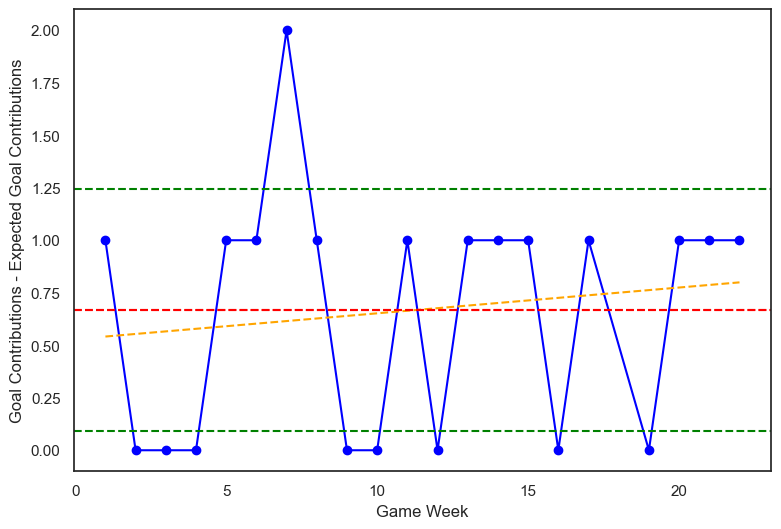

Mean: 0.6666666666666666
Standard deviation: 0.5773502691896256
Gradient of the linear fit line: 0.01
Uncertainty of the gradient: 0.02


In [167]:
forw_plot(sam_kerr, 'Round', 'GC-xGC', 'Game Week', 'Goal Contributions - Expected Goal Contributions', 'sam_kerr_gls')

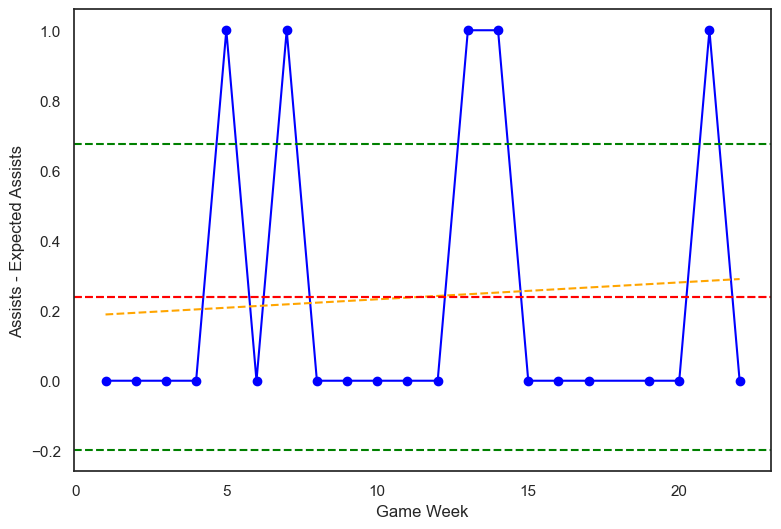

Mean: 0.23809523809523808
Standard deviation: 0.4364357804719847
Gradient of the linear fit line: 0.00
Uncertainty of the gradient: 0.02


In [168]:
forw_plot(sam_kerr, 'Round', 'Ast-xAG', 'Game Week', 'Assists - Expected Assists', 'sam_kerr_ast')

### leah_galton

In [169]:
leah_galton

Date  Day Comp         Round Venue  Result           Squad  \
0   2022-09-17  Sat  WSL   Matchweek 2  Home   W 4–0  Manchester Utd   
1   2022-09-25  Sun  WSL   Matchweek 3  Away   W 2–0  Manchester Utd   
2   2022-10-16  Sun  WSL   Matchweek 4  Home   W 4–0  Manchester Utd   
3   2022-10-23  Sun  WSL   Matchweek 5  Away   W 1–0  Manchester Utd   
4   2022-10-30  Sun  WSL   Matchweek 6  Away   W 3–0  Manchester Utd   
5   2022-11-06  Sun  WSL   Matchweek 7  Home   L 1–3  Manchester Utd   
6   2022-11-19  Sat  WSL   Matchweek 8  Away   W 3–2  Manchester Utd   
7   2022-12-03  Sat  WSL   Matchweek 9  Home   W 5–0  Manchester Utd   
8   2022-12-11  Sun  WSL  Matchweek 10  Away   D 1–1  Manchester Utd   
9          NaN  NaN  NaN           NaN   NaN     NaN             NaN   
10  2023-02-05  Sun  WSL  Matchweek 13  Home   D 0–0  Manchester Utd   
11  2023-02-12  Sun  WSL   Matchweek 1  Away   W 2–1  Manchester Utd   
12  2023-03-05  Sun  WSL  Matchweek 14  Home   W 5–1  Manchester Utd   
13  2023-03-12  Sun  WSL  Matchweek 15  Away   L 0–1  Manchester Utd   
14  2023-03-25  Sat  WSL  Matchweek 16  Home   W 4–0  Manchester Utd   
15  2023-04-01  Sat  WSL  Matchweek 17  Away   W 4–0  Manchester Utd   
16  2023-04-19  Wed  WSL  Matchweek 18  Home   W 1–0  Manchester Utd   
17  2023-04-28  Fri  WSL  Matchweek 19  Away   W 3–2  Manchester Utd   
18  2023-05-07  Sun  WSL  Matchweek 20  Home   W 3–0  Manchester Utd   
19  2023-05-21  Sun  WSL  Matchweek 21  Home   W 2–1  Manchester Utd   
20  2023-05-27  Sat  WSL  Matchweek 22  Away   W 1–0  Manchester Utd   
21         NaN  NaN  NaN           NaN   NaN  16-2-2             NaN   

           Opponent  Start    Pos     Min   Gls  Ast   PK  PKatt    Sh   SoT  \
0           Reading      Y     LW    76.0   0.0  0.0  0.0    0.0   1.0   0.0   
1          West Ham      Y     LW    87.0   0.0  0.0  0.0    0.0   0.0   0.0   
2          Brighton      Y  LB,CM    90.0   1.0  2.0  0.0    0.0   1.0   1.0   
3    Leicester City      Y  RM,LB    90.0   0.0  0.0  0.0    0.0   0.0   0.0   
4           Everton      Y  LM,LB    90.0   1.0  1.0  0.0    0.0   3.0   2.0   
5           Chelsea      Y  LW,LB    90.0   0.0  0.0  0.0    0.0   1.0   0.0   
6           Arsenal      Y     LM    71.0   0.0  0.0  0.0    0.0   1.0   1.0   
7       Aston Villa      Y     LW    84.0   1.0  0.0  0.0    0.0   4.0   1.0   
8   Manchester City      Y     LW    90.0   1.0  0.0  0.0    0.0   2.0   1.0   
9               NaN    NaN    NaN     NaN   NaN  NaN  NaN    NaN   NaN   NaN   
10          Everton      Y     LW    66.0   0.0  0.0  0.0    0.0   3.0   1.0   
11        Tottenham      Y     LW    89.0   1.0  0.0  0.0    0.0   3.0   1.0   
12   Leicester City      Y     LW    79.0   1.0  0.0  0.0    0.0   1.0   1.0   
13          Chelsea      Y     LW    70.0   0.0  0.0  0.0    0.0   1.0   0.0   
14         West Ham      Y     LW    65.0   0.0  0.0  0.0    0.0   1.0   1.0   
15         Brighton      Y     LW    90.0   2.0  0.0  0.0    0.0   4.0   3.0   
16          Arsenal      Y     LW    90.0   0.0  0.0  0.0    0.0   1.0   1.0   
17      Aston Villa      Y     LW    76.0   1.0  0.0  0.0    0.0   2.0   2.0   
18        Tottenham      Y     LW    72.0   1.0  1.0  0.0    0.0   3.0   1.0   
19  Manchester City      Y     LW    89.0   0.0  0.0  0.0    0.0   4.0   0.0   
20        Liverpool      Y     LW    74.0   0.0  0.0  0.0    0.0   1.0   0.0   
21              NaN  20/20    NaN  1628.0  10.0  4.0  0.0    0.0  37.0  17.0   

    CrdY  CrdR  Touches   Tkl   Int  Blocks   xG  npxG  xAG   SCA   GCA  \
0    0.0   0.0     16.0   0.0   0.0     0.0  0.1   0.1  0.0   4.0   0.0   
1    0.0   0.0     32.0   2.0   0.0     4.0  0.0   0.0  0.0   3.0   0.0   
2    0.0   0.0     56.0   1.0   0.0     1.0  0.3   0.3  0.6   6.0   2.0   
3    0.0   0.0     43.0   1.0   1.0     0.0  0.0   0.0  0.1   4.0   1.0   
4    0.0   0.0     44.0   0.0   3.0     2.0  0.1   0.1  0.2   4.0   2.0   
5    0.0   0.0     21.0   0.0   1.0     1.0  0.0   0.0  0.0   

In [170]:
#Dropping Irrelevant rows
leah_galton.drop(index=[9,21], inplace=True)
leah_galton.tail()

Date  Day Comp         Round Venue Result           Squad  \
16  2023-04-19  Wed  WSL  Matchweek 18  Home  W 1–0  Manchester Utd   
17  2023-04-28  Fri  WSL  Matchweek 19  Away  W 3–2  Manchester Utd   
18  2023-05-07  Sun  WSL  Matchweek 20  Home  W 3–0  Manchester Utd   
19  2023-05-21  Sun  WSL  Matchweek 21  Home  W 2–1  Manchester Utd   
20  2023-05-27  Sat  WSL  Matchweek 22  Away  W 1–0  Manchester Utd   

           Opponent Start Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  \
16          Arsenal     Y  LW  90.0  0.0  0.0  0.0    0.0  1.0  1.0   0.0   
17      Aston Villa     Y  LW  76.0  1.0  0.0  0.0    0.0  2.0  2.0   0.0   
18        Tottenham     Y  LW  72.0  1.0  1.0  0.0    0.0  3.0  1.0   0.0   
19  Manchester City     Y  LW  89.0  0.0  0.0  0.0    0.0  4.0  0.0   0.0   
20        Liverpool     Y  LW  74.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   

    CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  \
16   0.0     31.0  1.0  1.0     2.0  0.1   0.1  0.0  0.0  0.0  13.0  22.0   
17   0.0     28.0  1.0  1.0     3.0  0.5   0.5  0.1  1.0  0.0  15.0  18.0   
18   0.0     34.0  0.0  1.0     0.0  0.7   0.7  0.2  6.0  1.0  23.0  30.0   
19   0.0     38.0  0.0  0.0     2.0  1.0   1.0  0.0  3.0  0.0  16.0  24.0   
20   0.0     27.0  0.0  0.0     1.0  0.1   0.1  0.0  1.0  0.0  12.0  24.0   

    Cmp%  PrgP  Carries  PrgC  Att.1  Succ  Match Report  
16  59.1   1.0     19.0   1.0    2.0   1.0  Match Report  
17  83.3   5.0     17.0   2.0    0.0   0.0  Match Report  
18  76.7   4.0     22.0   1.0    1.0   1.0  Match Report  
19  66.7   4.0     19.0   1.0    0.0   0.0  Match Report  
20  50.0   0.0     13.0   0.0    0.0   0.0  Match Report

In [171]:
#Extract Text from the Round Column
leah_galton['Round'] = leah_galton['Round'].str.extract('(\d+)')
leah_galton.head()

Date  Day Comp Round Venue Result           Squad        Opponent  \
0  2022-09-17  Sat  WSL     2  Home  W 4–0  Manchester Utd         Reading   
1  2022-09-25  Sun  WSL     3  Away  W 2–0  Manchester Utd        West Ham   
2  2022-10-16  Sun  WSL     4  Home  W 4–0  Manchester Utd        Brighton   
3  2022-10-23  Sun  WSL     5  Away  W 1–0  Manchester Utd  Leicester City   
4  2022-10-30  Sun  WSL     6  Away  W 3–0  Manchester Utd         Everton   

  Start    Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  \
0     Y     LW  76.0  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0     16.0   
1     Y     LW  87.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     32.0   
2     Y  LB,CM  90.0  1.0  2.0  0.0    0.0  1.0  1.0   0.0   0.0     56.0   
3     Y  RM,LB  90.0  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     43.0   
4     Y  LM,LB  90.0  1.0  1.0  0.0    0.0  3.0  2.0   0.0   0.0     44.0   

   Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  \
0  0.0  0.0     0.0  0.1   0.1  0.0  4.0  0.0  10.0  14.0  71.4   3.0   
1  2.0  0.0     4.0  0.0   0.0  0.0  3.0  0.0  14.0  25.0  56.0   2.0   
2  1.0  0.0     1.0  0.3   0.3  0.6  6.0  2.0  39.0  51.0  76.5   6.0   
3  1.0  1.0     0.0  0.0   0.0  0.1  4.0  1.0  33.0  39.0  84.6   3.0   
4  0.0  3.0     2.0  0.1   0.1  0.2  4.0  2.0  27.0  32.0  84.4   3.0   

   Carries  PrgC  Att.1  Succ  Match Report  
0      5.0   0.0    0.0   0.0  Match Report  
1     14.0   1.0    0.0   0.0  Match Report  
2     30.0   2.0    1.0   0.0  Match Report  
3     33.0   2.0    0.0   0.0  Match Report  
4     31.0   4.0    1.0   1.0  Match Report

In [172]:
leah_galton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 20
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          20 non-null     object 
 1   Day           20 non-null     object 
 2   Comp          20 non-null     object 
 3   Round         20 non-null     object 
 4   Venue         20 non-null     object 
 5   Result        20 non-null     object 
 6   Squad         20 non-null     object 
 7   Opponent      20 non-null     object 
 8   Start         20 non-null     object 
 9   Pos           20 non-null     object 
 10  Min           20 non-null     float64
 11  Gls           20 non-null     float64
 12  Ast           20 non-null     float64
 13  PK            20 non-null     float64
 14  PKatt         20 non-null     float64
 15  Sh            20 non-null     float64
 16  SoT           20 non-null     float64
 17  CrdY          20 non-null     float64
 18  CrdR          20 non-null     fl

In [173]:
#Convert Round Column to Integer
cols = ['Round', 'Gls', 'Ast' ]
leah_galton[cols] = leah_galton[cols].astype(int)

In [174]:
#Sort Round Column in ascending format
leah_galton = leah_galton.sort_values(by = ['Round'])
leah_galton.head()

Date  Day Comp  Round Venue Result           Squad        Opponent  \
11  2023-02-12  Sun  WSL      1  Away  W 2–1  Manchester Utd       Tottenham   
0   2022-09-17  Sat  WSL      2  Home  W 4–0  Manchester Utd         Reading   
1   2022-09-25  Sun  WSL      3  Away  W 2–0  Manchester Utd        West Ham   
2   2022-10-16  Sun  WSL      4  Home  W 4–0  Manchester Utd        Brighton   
3   2022-10-23  Sun  WSL      5  Away  W 1–0  Manchester Utd  Leicester City   

   Start    Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  \
11     Y     LW  89.0    1    0  0.0    0.0  3.0  1.0   0.0   0.0     44.0   
0      Y     LW  76.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     16.0   
1      Y     LW  87.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     32.0   
2      Y  LB,CM  90.0    1    2  0.0    0.0  1.0  1.0   0.0   0.0     56.0   
3      Y  RM,LB  90.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     43.0   

    Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  \
11  0.0  2.0     2.0  0.4   0.4  0.0  2.0  0.0  21.0  33.0  63.6   2.0   
0   0.0  0.0     0.0  0.1   0.1  0.0  4.0  0.0  10.0  14.0  71.4   3.0   
1   2.0  0.0     4.0  0.0   0.0  0.0  3.0  0.0  14.0  25.0  56.0   2.0   
2   1.0  0.0     1.0  0.3   0.3  0.6  6.0  2.0  39.0  51.0  76.5   6.0   
3   1.0  1.0     0.0  0.0   0.0  0.1  4.0  1.0  33.0  39.0  84.6   3.0   

    Carries  PrgC  Att.1  Succ  Match Report  
11     18.0   3.0    2.0   2.0  Match Report  
0       5.0   0.0    0.0   0.0  Match Report  
1      14.0   1.0    0.0   0.0  Match Report  
2      30.0   2.0    1.0   0.0  Match Report  
3      33.0   2.0    0.0   0.0  Match Report

In [175]:
#Calculate Actual Goals - Expected Goals
leah_galton['aG-xG'] = leah_galton.apply(forward_aG_xG, axis=1)
leah_galton

Date  Day Comp  Round Venue Result           Squad         Opponent  \
11  2023-02-12  Sun  WSL      1  Away  W 2–1  Manchester Utd        Tottenham   
0   2022-09-17  Sat  WSL      2  Home  W 4–0  Manchester Utd          Reading   
1   2022-09-25  Sun  WSL      3  Away  W 2–0  Manchester Utd         West Ham   
2   2022-10-16  Sun  WSL      4  Home  W 4–0  Manchester Utd         Brighton   
3   2022-10-23  Sun  WSL      5  Away  W 1–0  Manchester Utd   Leicester City   
4   2022-10-30  Sun  WSL      6  Away  W 3–0  Manchester Utd          Everton   
5   2022-11-06  Sun  WSL      7  Home  L 1–3  Manchester Utd          Chelsea   
6   2022-11-19  Sat  WSL      8  Away  W 3–2  Manchester Utd          Arsenal   
7   2022-12-03  Sat  WSL      9  Home  W 5–0  Manchester Utd      Aston Villa   
8   2022-12-11  Sun  WSL     10  Away  D 1–1  Manchester Utd  Manchester City   
10  2023-02-05  Sun  WSL     13  Home  D 0–0  Manchester Utd          Everton   
12  2023-03-05  Sun  WSL     14  Home  W 5–1  Manchester Utd   Leicester City   
13  2023-03-12  Sun  WSL     15  Away  L 0–1  Manchester Utd          Chelsea   
14  2023-03-25  Sat  WSL     16  Home  W 4–0  Manchester Utd         West Ham   
15  2023-04-01  Sat  WSL     17  Away  W 4–0  Manchester Utd         Brighton   
16  2023-04-19  Wed  WSL     18  Home  W 1–0  Manchester Utd          Arsenal   
17  2023-04-28  Fri  WSL     19  Away  W 3–2  Manchester Utd      Aston Villa   
18  2023-05-07  Sun  WSL     20  Home  W 3–0  Manchester Utd        Tottenham   
19  2023-05-21  Sun  WSL     21  Home  W 2–1  Manchester Utd  Manchester City   
20  2023-05-27  Sat  WSL     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start    Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  \
11     Y     LW  89.0    1    0  0.0    0.0  3.0  1.0   0.0   0.0     44.0   
0      Y     LW  76.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     16.0   
1      Y     LW  87.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     32.0   
2      Y  LB,CM  90.0    1    2  0.0    0.0  1.0  1.0   0.0   0.0     56.0   
3      Y  RM,LB  90.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     43.0   
4      Y  LM,LB  90.0    1    1  0.0    0.0  3.0  2.0   0.0   0.0     44.0   
5      Y  LW,LB  90.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     21.0   
6      Y     LM  71.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     25.0   
7      Y     LW  84.0    1    0  0.0    0.0  4.0  1.0   0.0   0.0     37.0   
8      Y     LW  90.0    1    0  0.0    0.0  2.0  1.0   0.0   0.0     47.0   
10     Y     LW  66.0    0    0  0.0    0.0  3.0  1.0   0.0   0.0     36.0   
12     Y     LW  79.0    1    0  0.0    0.0  1.0  1.0   0.0   0.0     38.0   
13     Y     LW  70.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     27.0   
14     Y     LW  65.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     41.0   
15     Y     LW  90.0    2    0  0.0    0.0  4.0  3.0   0.0   0.0     37.0   
16     Y     LW  90.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     31.0   
17     Y     LW  76.0    1    0  0.0    0.0  2.0  2.0   0.0   0.0     28.0   
18     Y     LW  72.0    1    1  0.0    0.0  3.0  1.0   0.0   0.0     34.0   
19     Y     LW  89.0    0    0  0.0    0.0  4.0  0.0   0.0   0.0     38.0   
20     Y     LW  74.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     27.0   

    Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  \
11  0.0  2.0     2.0  0.4   0.4  0.0  2.0  0.0  21.0  33.0  63.6   2.0   
0   0.0  0.0     0.0  0.1   0.1  0.0  4.0  0.0  10.0  14.0  71.4   3.0   
1   2.0  0.0     4.0  0.0   0.0  0.0  3.0  0.0  14.0  25.0  56.0   2.0   
2   1.0  0.0     1.0  0.3   0.3  0.6  6.0  2.0  39.0  51.0  76.5   6.0   
3   1.0  1.0     0.0  0.0   0.0  0.1  4.0  1.0  33.0  39.0  84.6   3.0   
4   0.0  3.0     2.0  0.1   0.1  0.2  4.0  2.0  27.0  32.0  84.4   3.0   
5   0.0  1.0     1.0  0.0   0.0  0.0  0.0  0.0  11.0  16.0  68.8   0.0   
6   1.0  2.0     1.0  0.0   0.0  0.0  0.0  0.0  10.0  16.0  62.5   0.0   
7  

In [176]:
#Calculate Actual Assists - Expected assists
leah_galton['Ast-xAG'] = leah_galton.apply(forward_Ast_xGA, axis=1)
leah_galton

Date  Day Comp  Round Venue Result           Squad         Opponent  \
11  2023-02-12  Sun  WSL      1  Away  W 2–1  Manchester Utd        Tottenham   
0   2022-09-17  Sat  WSL      2  Home  W 4–0  Manchester Utd          Reading   
1   2022-09-25  Sun  WSL      3  Away  W 2–0  Manchester Utd         West Ham   
2   2022-10-16  Sun  WSL      4  Home  W 4–0  Manchester Utd         Brighton   
3   2022-10-23  Sun  WSL      5  Away  W 1–0  Manchester Utd   Leicester City   
4   2022-10-30  Sun  WSL      6  Away  W 3–0  Manchester Utd          Everton   
5   2022-11-06  Sun  WSL      7  Home  L 1–3  Manchester Utd          Chelsea   
6   2022-11-19  Sat  WSL      8  Away  W 3–2  Manchester Utd          Arsenal   
7   2022-12-03  Sat  WSL      9  Home  W 5–0  Manchester Utd      Aston Villa   
8   2022-12-11  Sun  WSL     10  Away  D 1–1  Manchester Utd  Manchester City   
10  2023-02-05  Sun  WSL     13  Home  D 0–0  Manchester Utd          Everton   
12  2023-03-05  Sun  WSL     14  Home  W 5–1  Manchester Utd   Leicester City   
13  2023-03-12  Sun  WSL     15  Away  L 0–1  Manchester Utd          Chelsea   
14  2023-03-25  Sat  WSL     16  Home  W 4–0  Manchester Utd         West Ham   
15  2023-04-01  Sat  WSL     17  Away  W 4–0  Manchester Utd         Brighton   
16  2023-04-19  Wed  WSL     18  Home  W 1–0  Manchester Utd          Arsenal   
17  2023-04-28  Fri  WSL     19  Away  W 3–2  Manchester Utd      Aston Villa   
18  2023-05-07  Sun  WSL     20  Home  W 3–0  Manchester Utd        Tottenham   
19  2023-05-21  Sun  WSL     21  Home  W 2–1  Manchester Utd  Manchester City   
20  2023-05-27  Sat  WSL     22  Away  W 1–0  Manchester Utd        Liverpool   

   Start    Pos   Min  Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  \
11     Y     LW  89.0    1    0  0.0    0.0  3.0  1.0   0.0   0.0     44.0   
0      Y     LW  76.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     16.0   
1      Y     LW  87.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     32.0   
2      Y  LB,CM  90.0    1    2  0.0    0.0  1.0  1.0   0.0   0.0     56.0   
3      Y  RM,LB  90.0    0    0  0.0    0.0  0.0  0.0   0.0   0.0     43.0   
4      Y  LM,LB  90.0    1    1  0.0    0.0  3.0  2.0   0.0   0.0     44.0   
5      Y  LW,LB  90.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     21.0   
6      Y     LM  71.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     25.0   
7      Y     LW  84.0    1    0  0.0    0.0  4.0  1.0   0.0   0.0     37.0   
8      Y     LW  90.0    1    0  0.0    0.0  2.0  1.0   0.0   0.0     47.0   
10     Y     LW  66.0    0    0  0.0    0.0  3.0  1.0   0.0   0.0     36.0   
12     Y     LW  79.0    1    0  0.0    0.0  1.0  1.0   0.0   0.0     38.0   
13     Y     LW  70.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     27.0   
14     Y     LW  65.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     41.0   
15     Y     LW  90.0    2    0  0.0    0.0  4.0  3.0   0.0   0.0     37.0   
16     Y     LW  90.0    0    0  0.0    0.0  1.0  1.0   0.0   0.0     31.0   
17     Y     LW  76.0    1    0  0.0    0.0  2.0  2.0   0.0   0.0     28.0   
18     Y     LW  72.0    1    1  0.0    0.0  3.0  1.0   0.0   0.0     34.0   
19     Y     LW  89.0    0    0  0.0    0.0  4.0  0.0   0.0   0.0     38.0   
20     Y     LW  74.0    0    0  0.0    0.0  1.0  0.0   0.0   0.0     27.0   

    Tkl  Int  Blocks   xG  npxG  xAG  SCA  GCA   Cmp   Att  Cmp%  PrgP  \
11  0.0  2.0     2.0  0.4   0.4  0.0  2.0  0.0  21.0  33.0  63.6   2.0   
0   0.0  0.0     0.0  0.1   0.1  0.0  4.0  0.0  10.0  14.0  71.4   3.0   
1   2.0  0.0     4.0  0.0   0.0  0.0  3.0  0.0  14.0  25.0  56.0   2.0   
2   1.0  0.0     1.0  0.3   0.3  0.6  6.0  2.0  39.0  51.0  76.5   6.0   
3   1.0  1.0     0.0  0.0   0.0  0.1  4.0  1.0  33.0  39.0  84.6   3.0   
4   0.0  3.0     2.0  0.1   0.1  0.2  4.0  2.0  27.0  32.0  84.4   3.0   
5   0.0  1.0     1.0  0.0   0.0  0.0  0.0  0.0  11.0  16.0  68.8   0.0   
6   1.0  2.0     1.0  0.0   0.0  0.0  0.0  0.0  10.0  16.0  62.5   0.0   
7  

### Plots showing forward stats for Leah Galton

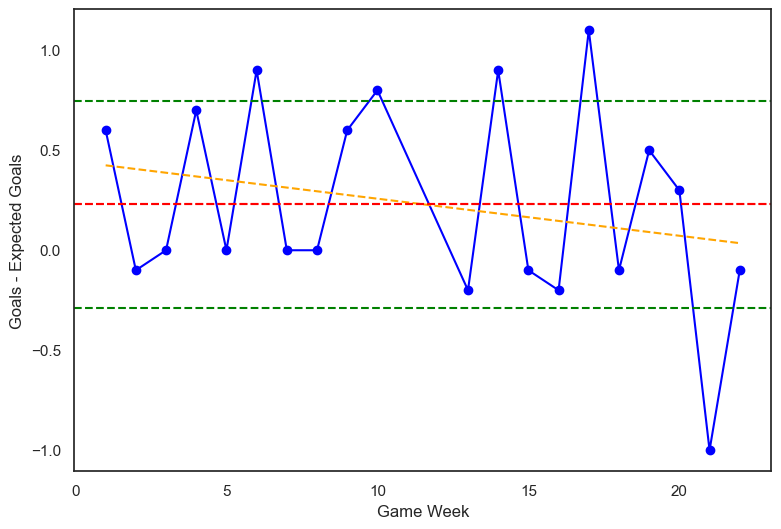

Mean: 0.23000000000000004
Standard deviation: 0.51717858057979
Gradient of the linear fit line: -0.02
Uncertainty of the gradient: 0.02


In [177]:
forw_plot(leah_galton, 'Round', 'aG-xG', 'Game Week', 'Goals - Expected Goals', 'leah_galton_gls')

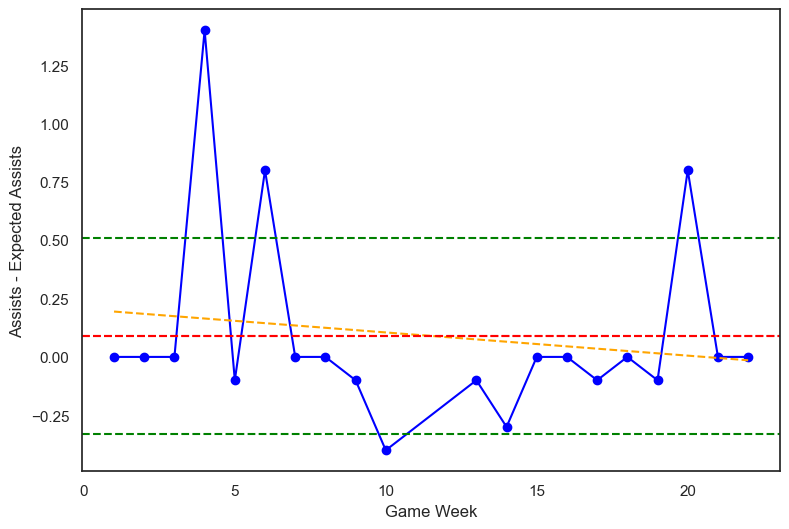

Mean: 0.08999999999999997
Standard deviation: 0.4216508907665326
Gradient of the linear fit line: -0.01
Uncertainty of the gradient: 0.01


In [178]:
forw_plot(leah_galton, 'Round', 'Ast-xAG', 'Game Week', 'Assists - Expected Assists', 'leah_galton_ast')